# Analyse d'une entreprise française pour le developpement à l'international.

* Importation des bibliothèques:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch


In [2]:
def top_valeur(df, column, minimum, maximum): 
    fig = plt.subplots(figsize =(10, 6))
    sns.boxplot( y=df[column] )
    plt.show()
    # Pour détecter les valeurs aberrantes, nous utiliserons l'intervalle interquartile
    Q1_Importations = minimum
    Q3_Importations = maximum
    EIQ_Importations = Q3_Importations -Q1_Importations
    EIQ_Importations

    # La prochaine étape sera de trouver la valeur au dela de laquelle les autres valeurs seront aberrantes
    limite_valeurs_aberrantes_Importations = 1.5 * EIQ_Importations + Q3_Importations
    limite_valeurs_aberrantes_Importations
    
    val_abb_Importations_19 = df.sort_values(by=column, ascending=False).head(19)
    display(val_abb_Importations_19)
    
    val_abb_Importations = np.where(df[column]>=limite_valeurs_aberrantes_Importations)
    val_abb_Importations
    
    from matplotlib import cm
    plt.subplots(figsize = (20,10))
    height = val_abb_Importations_19[column]
    bars = val_abb_Importations_19['Pays']
    x_pos = np.arange(len(bars))
    color = cm.Blues_r(np.linspace(.4,.8, 20))
    plt.bar(x_pos, height, color=color)
    plt.xticks(x_pos, bars, rotation=90)
    plt.subplots_adjust(bottom=0.4, top=0.99)   
    plt.ylabel(column, fontsize = 15) 
    plt.title('Top {} '.format(column), fontsize = 20 )
    plt.show()

In [3]:
df_dispo_volailles = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\DisponibiliteAlimentaire_2017.csv")
df_population = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\Population_2000_2018.csv")
df_stab_politique = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\PoliticalStability.csv")
df_Pib_pays = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\Pib_pays.csv")

## Nettoyage des données:

* Table 1:

In [4]:
df_dispo_volailles

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [5]:
df_dispo_volailles.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [6]:
df_dispo_volailles.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [7]:
df_dispo_volailles.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

* Table 2:

In [8]:
df_population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [9]:
df_population.dtypes

Code Domaine               object
Domaine                    object
Code zone                   int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
Note                       object
dtype: object

In [10]:
df_population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


In [11]:
df_population.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

* Table 3:

In [12]:
df_stab_politique

,Zone,Political_Stability
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
190,Venezuela (République bolivarienne du),-1.25
191,Viet Nam,0.29
192,Yémen,-2.94
193,Zambie,0.15


In [13]:
df_stab_politique.dtypes

Zone                    object
Political_Stability    float64
dtype: object

In [14]:
df_stab_politique.describe()

,Political_Stability
count,195.000000
mean,-0.052667
std,0.993359
min,-2.940000
25%,-0.660000
50%,0.040000
75%,0.775000
max,1.920000


In [15]:
df_stab_politique.isna().sum()

Zone                   0
Political_Stability    0
dtype: int64

* Table 4:

In [16]:
df_Pib_pays

,Pays,Valeur
0,Afghanistan,1.875347e+10
1,Angola,6.897276e+10
2,Albanie,1.301969e+10
3,Andorre,3.000162e+09
4,Le monde arabe,2.580000e+12
...,...,...
258,Kosovo,7.180813e+09
259,Yémen,2.684223e+10
260,Afrique du Sud,3.810000e+11
261,Zambie,2.587360e+10


In [17]:
df_Pib_pays.dtypes

Pays       object
Valeur    float64
dtype: object

In [18]:
df_Pib_pays.describe()

,Valeur
count,2.540000e+02
mean,2.643639e+12
std,8.899842e+12
min,4.521766e+07
25%,9.357061e+09
50%,5.402361e+10
75%,5.270000e+11
max,8.140000e+13


In [19]:
df_Pib_pays.isna().sum()

Pays      0
Valeur    9
dtype: int64

* Selection des variables pour chaque table:

In [20]:
df_dispo_volailles = df_dispo_volailles.loc[:,['Zone','Élément', 'Produit', 'Année', 'Valeur']]
df_dispo_volailles

,Zone,Élément,Produit,Année,Valeur
0,Afghanistan,Production,Blé et produits,2017,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,2017,2302.00
2,Afghanistan,Variation de stock,Blé et produits,2017,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,6701.00
...,...,...,...,...,...
176595,Zimbabwe,Nourriture,Miscellanees,2017,19.00
176596,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,2017,1.33
176597,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,2017,1.00
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,2017,0.04


* Selection des données retenues sur la variable 'Élément':

Table 1:

In [21]:
df_dispo_volailles = df_dispo_volailles.loc[(df_dispo_volailles['Élément']=='Production') | (df_dispo_volailles['Élément']=='Importations - Quantité')| (df_dispo_volailles['Élément']=='Exportations - Quantité')| (df_dispo_volailles['Élément']=='Disponibilité intérieure')| (df_dispo_volailles['Élément']=='Nourriture')| (df_dispo_volailles['Élément']=='Traitement')| (df_dispo_volailles['Élément']=='Disponibilité alimentaire en quantité (kg/personne/an)')]
df_dispo_volailles = df_dispo_volailles.loc[df_dispo_volailles['Produit']=='Viande de Volailles']
df_dispo_volailles = df_dispo_volailles.rename(columns={'Zone':'Pays'})
df_dispo_volailles

,Pays,Élément,Produit,Année,Valeur
651,Afghanistan,Production,Viande de Volailles,2017,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,29.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,57.00
657,Afghanistan,Nourriture,Viande de Volailles,2017,55.00
658,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,1.53
...,...,...,...,...,...
176389,Zimbabwe,Importations - Quantité,Viande de Volailles,2017,6.00
176391,Zimbabwe,Disponibilité intérieure,Viande de Volailles,2017,76.00
176393,Zimbabwe,Traitement,Viande de Volailles,2017,6.00
176396,Zimbabwe,Nourriture,Viande de Volailles,2017,67.00


In [22]:
df_dispo_volailles['Valeur'] = df_dispo_volailles['Valeur']*1000
df_dispo_volailles

,Pays,Élément,Produit,Année,Valeur
651,Afghanistan,Production,Viande de Volailles,2017,28000.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,29000.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,57000.0
657,Afghanistan,Nourriture,Viande de Volailles,2017,55000.0
658,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,1530.0
...,...,...,...,...,...
176389,Zimbabwe,Importations - Quantité,Viande de Volailles,2017,6000.0
176391,Zimbabwe,Disponibilité intérieure,Viande de Volailles,2017,76000.0
176393,Zimbabwe,Traitement,Viande de Volailles,2017,6000.0
176396,Zimbabwe,Nourriture,Viande de Volailles,2017,67000.0


*Nous avons multiplié par 1000 car la variable 'Valeur' était en millier de tonne.*

Table 2:

In [23]:
df_population = df_population.loc[:,['Zone','Année', 'Valeur']]
df_population

,Zone,Année,Valeur
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684
...,...,...,...
4406,Zimbabwe,2014,13586.707
4407,Zimbabwe,2015,13814.629
4408,Zimbabwe,2016,14030.331
4409,Zimbabwe,2017,14236.595


In [24]:
df_population['Nb habitants'] = df_population['Valeur']*1000
df_population

,Zone,Année,Valeur,Nb habitants
0,Afghanistan,2000,20779.953,20779953.0
1,Afghanistan,2001,21606.988,21606988.0
2,Afghanistan,2002,22600.770,22600770.0
3,Afghanistan,2003,23680.871,23680871.0
4,Afghanistan,2004,24726.684,24726684.0
...,...,...,...,...
4406,Zimbabwe,2014,13586.707,13586707.0
4407,Zimbabwe,2015,13814.629,13814629.0
4408,Zimbabwe,2016,14030.331,14030331.0
4409,Zimbabwe,2017,14236.595,14236595.0


*De meme ici le nombre d'habitant etait en millier.*

In [25]:
df_population = df_population.loc[df_population['Année'] == 2017]
df_population

,Zone,Année,Valeur,Nb habitants
17,Afghanistan,2017,36296.113,36296113.0
36,Afrique du Sud,2017,57009.756,57009756.0
55,Albanie,2017,2884.169,2884169.0
74,Algérie,2017,41389.189,41389189.0
93,Allemagne,2017,82658.409,82658409.0
...,...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402.484,29402484.0
4352,Viet Nam,2017,94600.648,94600648.0
4371,Yémen,2017,27834.819,27834819.0
4390,Zambie,2017,16853.599,16853599.0


In [26]:
df_population = df_population.drop(columns= 'Valeur')
df_population = df_population.drop(columns= 'Année')
df_population = df_population.rename(columns={'Zone':'Pays'})
df_population = df_population.rename(columns={'Nb habitants':'Nb_habitants'})
df_population

,Pays,Nb_habitants
17,Afghanistan,36296113.0
36,Afrique du Sud,57009756.0
55,Albanie,2884169.0
74,Algérie,41389189.0
93,Allemagne,82658409.0
...,...,...
4333,Venezuela (République bolivarienne du),29402484.0
4352,Viet Nam,94600648.0
4371,Yémen,27834819.0
4390,Zambie,16853599.0


table 3:

In [27]:
df_stab_politique = df_stab_politique.rename(columns={'Political_Stability':'Stabilité_politique'})
df_stab_politique = df_stab_politique.rename(columns={'Zone':'Pays'})
df_stab_politique

,Pays,Stabilité_politique
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28
2,Albanie,0.38
3,Algérie,-0.92
4,Allemagne,0.59
...,...,...
190,Venezuela (République bolivarienne du),-1.25
191,Viet Nam,0.29
192,Yémen,-2.94
193,Zambie,0.15


Table 4:

In [28]:
df_Pib_pays = df_Pib_pays.rename(columns={'Valeur':'Pib'})
df_Pib_pays

,Pays,Pib
0,Afghanistan,1.875347e+10
1,Angola,6.897276e+10
2,Albanie,1.301969e+10
3,Andorre,3.000162e+09
4,Le monde arabe,2.580000e+12
...,...,...
258,Kosovo,7.180813e+09
259,Yémen,2.684223e+10
260,Afrique du Sud,3.810000e+11
261,Zambie,2.587360e+10


* Effectuons une jointure entre les tables df_dispo_volailles et df_population:

In [29]:
df_dispo_volailles_pop = pd.merge(df_dispo_volailles, df_population, how= 'left', on= 'Pays' )
df_dispo_volailles_pop

,Pays,Élément,Produit,Année,Valeur,Nb_habitants
0,Afghanistan,Production,Viande de Volailles,2017,28000.0,36296113.0
1,Afghanistan,Importations - Quantité,Viande de Volailles,2017,29000.0,36296113.0
2,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,57000.0,36296113.0
3,Afghanistan,Nourriture,Viande de Volailles,2017,55000.0,36296113.0
4,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,1530.0,36296113.0
...,...,...,...,...,...,...
1026,Zimbabwe,Importations - Quantité,Viande de Volailles,2017,6000.0,14236595.0
1027,Zimbabwe,Disponibilité intérieure,Viande de Volailles,2017,76000.0,14236595.0
1028,Zimbabwe,Traitement,Viande de Volailles,2017,6000.0,14236595.0
1029,Zimbabwe,Nourriture,Viande de Volailles,2017,67000.0,14236595.0


* Nettoyage de la table:

In [30]:
df_dispo_volailles_pop['Nb habitants'] = df_dispo_volailles_pop['Nb_habitants'].astype(int)
df_dispo_volailles_pop['Valeur'] = df_dispo_volailles_pop['Valeur'].astype(int)

In [31]:
df_dispo_volailles_pop.duplicated(['Pays','Élément','Valeur']).sum()

0

In [32]:
df_dispo_volailles_pop

,Pays,Élément,Produit,Année,Valeur,Nb_habitants,Nb habitants
0,Afghanistan,Production,Viande de Volailles,2017,28000,36296113.0,36296113
1,Afghanistan,Importations - Quantité,Viande de Volailles,2017,29000,36296113.0,36296113
2,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,57000,36296113.0,36296113
3,Afghanistan,Nourriture,Viande de Volailles,2017,55000,36296113.0,36296113
4,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,1530,36296113.0,36296113
...,...,...,...,...,...,...,...
1026,Zimbabwe,Importations - Quantité,Viande de Volailles,2017,6000,14236595.0,14236595
1027,Zimbabwe,Disponibilité intérieure,Viande de Volailles,2017,76000,14236595.0,14236595
1028,Zimbabwe,Traitement,Viande de Volailles,2017,6000,14236595.0,14236595
1029,Zimbabwe,Nourriture,Viande de Volailles,2017,67000,14236595.0,14236595


* Selection des variables:

In [33]:
df_dispo_volailles_pop = df_dispo_volailles_pop.loc[:,['Pays','Élément','Valeur', 'Nb_habitants']]
df_dispo_volailles_pop

,Pays,Élément,Valeur,Nb_habitants
0,Afghanistan,Production,28000,36296113.0
1,Afghanistan,Importations - Quantité,29000,36296113.0
2,Afghanistan,Disponibilité intérieure,57000,36296113.0
3,Afghanistan,Nourriture,55000,36296113.0
4,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,1530,36296113.0
...,...,...,...,...
1026,Zimbabwe,Importations - Quantité,6000,14236595.0
1027,Zimbabwe,Disponibilité intérieure,76000,14236595.0
1028,Zimbabwe,Traitement,6000,14236595.0
1029,Zimbabwe,Nourriture,67000,14236595.0


* Création des tables pour chaque élément selectionné:

In [34]:
df_1 = df_dispo_volailles_pop.loc[df_dispo_volailles_pop['Élément']=='Production']
df_1 = df_1.rename(columns={'Valeur':'Production'})
df_1 = df_1.drop(columns='Élément')
df_1

,Pays,Production,Nb_habitants
0,Afghanistan,28000,36296113.0
5,Afrique du Sud,1667000,57009756.0
11,Albanie,13000,2884169.0
17,Algérie,275000,41389189.0
23,Allemagne,1514000,82658409.0
...,...,...,...
1001,Venezuela (République bolivarienne du),600000,29402484.0
1007,Viet Nam,918000,94600648.0
1013,Yémen,168000,27834819.0
1019,Zambie,49000,16853599.0


In [35]:
df_2 = df_dispo_volailles_pop.loc[df_dispo_volailles_pop['Élément']=='Importations - Quantité']
df_2 = df_2.rename(columns={'Valeur':'Importations'})
df_2 = df_2.drop(columns='Élément')
df_2

,Pays,Importations,Nb_habitants
1,Afghanistan,29000,36296113.0
6,Afrique du Sud,514000,57009756.0
12,Albanie,38000,2884169.0
18,Algérie,2000,41389189.0
24,Allemagne,842000,82658409.0
...,...,...,...
1002,Venezuela (République bolivarienne du),25000,29402484.0
1008,Viet Nam,291000,94600648.0
1014,Yémen,78000,27834819.0
1020,Zambie,12000,16853599.0


In [36]:
df_3 = df_dispo_volailles_pop.loc[df_dispo_volailles_pop['Élément']=='Exportations - Quantité']
df_3 = df_3.rename(columns={'Valeur':'Exportations'})
df_3 = df_3.drop(columns='Élément')
df_3

,Pays,Exportations,Nb_habitants
7,Afrique du Sud,63000,57009756.0
13,Albanie,0,2884169.0
19,Algérie,0,41389189.0
25,Allemagne,646000,82658409.0
32,Angola,0,29816766.0
...,...,...,...
991,Uruguay,3000,3436641.0
1003,Venezuela (République bolivarienne du),0,29402484.0
1009,Viet Nam,1000,94600648.0
1015,Yémen,0,27834819.0


In [37]:
df_4 = df_dispo_volailles_pop.loc[df_dispo_volailles_pop['Élément']=='Disponibilité intérieure']
df_4 = df_4.rename(columns={'Valeur':'Disponibilité_intérieure'})
df_4 = df_4.drop(columns='Élément')
df_4

,Pays,Disponibilité_intérieure,Nb_habitants
2,Afghanistan,57000,36296113.0
8,Afrique du Sud,2118000,57009756.0
14,Albanie,47000,2884169.0
20,Algérie,277000,41389189.0
26,Allemagne,1739000,82658409.0
...,...,...,...
1004,Venezuela (République bolivarienne du),626000,29402484.0
1010,Viet Nam,1206000,94600648.0
1016,Yémen,246000,27834819.0
1022,Zambie,60000,16853599.0


In [38]:
df_5 = df_dispo_volailles_pop.loc[df_dispo_volailles_pop['Élément']=='Disponibilité alimentaire en quantité (kg/personne/an)']
df_5 = df_5.rename(columns={'Valeur':'Disponibilité_alimentaire'})
df_5 = df_5.drop(columns='Élément')
df_5

,Pays,Disponibilité_alimentaire,Nb_habitants
4,Afghanistan,1530,36296113.0
10,Afrique du Sud,35690,57009756.0
16,Albanie,16360,2884169.0
22,Algérie,6380,41389189.0
29,Allemagne,19470,82658409.0
...,...,...,...
1006,Venezuela (République bolivarienne du),20280,29402484.0
1012,Viet Nam,12330,94600648.0
1018,Yémen,8530,27834819.0
1024,Zambie,3420,16853599.0


In [39]:
df_6 = df_dispo_volailles_pop.loc[df_dispo_volailles_pop['Élément']=='Traitement']
df_6 = df_6.rename(columns={'Valeur':'Traitement'})
df_6 = df_6.drop(columns='Élément')
df_6

,Pays,Traitement,Nb_habitants
27,Allemagne,167000,8.265841e+07
34,Angola,2000,2.981677e+07
71,Autriche,12000,8.819901e+06
100,Bélarus,1000,9.450231e+06
107,Belgique,33000,1.141975e+07
132,Bosnie-Herzégovine,0,3.351525e+06
151,Bulgarie,1000,7.102444e+06
203,"Chine, continentale",1000,1.421022e+09
216,Chypre,0,1.179678e+06
247,Croatie,0,4.182857e+06


In [40]:
df_7 = df_dispo_volailles_pop.loc[df_dispo_volailles_pop['Élément']=='Nourriture']
df_7 = df_7.rename(columns={'Valeur':'Nourriture'})
df_7 = df_7.drop(columns='Élément')
df_7['Nourriture'] = df_7['Nourriture']/1000
df_7

,Pays,Nourriture,Nb_habitants
3,Afghanistan,55.0,36296113.0
9,Afrique du Sud,2035.0,57009756.0
15,Albanie,47.0,2884169.0
21,Algérie,264.0,41389189.0
28,Allemagne,1609.0,82658409.0
...,...,...,...
1005,Venezuela (République bolivarienne du),596.0,29402484.0
1011,Viet Nam,1166.0,94600648.0
1017,Yémen,237.0,27834819.0
1023,Zambie,58.0,16853599.0


*Nous avons divisé le résultat par 1000 pour avoir des valeurs en tonnes et ainsi obtenir une homogénéisation des données.*

* Effectuons une jointure entre toutes les tables pour regrouper les données:

In [41]:
df1 = pd.merge(df_1, df_2, how='left', on='Pays')
df1 = df1.drop(columns='Nb_habitants_x')

df2 = pd.merge(df1, df_3, how='left', on='Pays')
df2 = df2.drop(columns='Nb_habitants')

df3 = pd.merge(df2, df_4, how='left', on='Pays')
df3 = df3.drop(columns='Nb_habitants_y')

df4 = pd.merge(df3, df_5, how='left', on='Pays')
df4 = df4.drop(columns='Nb_habitants_y')

df5 = pd.merge(df4, df_6, how='left', on='Pays')
df5 = df5.drop(columns='Nb_habitants')

df6 = pd.merge(df5, df_7, how='left', on='Pays')
df6 = df6.drop(columns='Nb_habitants_x')

df_dispo_poulet = df6
df_dispo_poulet

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants
0,Afghanistan,28000,29000,NaN,57000,1530,NaN,55.0,36296113.0
1,Afrique du Sud,1667000,514000,63000.0,2118000,35690,NaN,2035.0,57009756.0
2,Albanie,13000,38000,0.0,47000,16360,NaN,47.0,2884169.0
3,Algérie,275000,2000,0.0,277000,6380,NaN,264.0,41389189.0
4,Allemagne,1514000,842000,646000.0,1739000,19470,167000.0,1609.0,82658409.0
...,...,...,...,...,...,...,...,...,...
163,Venezuela (République bolivarienne du),600000,25000,0.0,626000,20280,NaN,596.0,29402484.0
164,Viet Nam,918000,291000,1000.0,1206000,12330,NaN,1166.0,94600648.0
165,Yémen,168000,78000,0.0,246000,8530,NaN,237.0,27834819.0
166,Zambie,49000,12000,1000.0,60000,3420,NaN,58.0,16853599.0


* Effectuons une jointure entre la table df_dispo_poulet et df_Pib_pays:

In [42]:
df_dispo_poulet = pd.merge(df_dispo_poulet, df_Pib_pays,how='left', on='Pays')
df_dispo_poulet

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib
0,Afghanistan,28000,29000,NaN,57000,1530,NaN,55.0,36296113.0,1.875347e+10
1,Afrique du Sud,1667000,514000,63000.0,2118000,35690,NaN,2035.0,57009756.0,3.810000e+11
2,Albanie,13000,38000,0.0,47000,16360,NaN,47.0,2884169.0,1.301969e+10
3,Algérie,275000,2000,0.0,277000,6380,NaN,264.0,41389189.0,1.700000e+11
4,Allemagne,1514000,842000,646000.0,1739000,19470,167000.0,1609.0,82658409.0,3.690000e+12
...,...,...,...,...,...,...,...,...,...,...
163,Venezuela (République bolivarienne du),600000,25000,0.0,626000,20280,NaN,596.0,29402484.0,NaN
164,Viet Nam,918000,291000,1000.0,1206000,12330,NaN,1166.0,94600648.0,2.810000e+11
165,Yémen,168000,78000,0.0,246000,8530,NaN,237.0,27834819.0,2.684223e+10
166,Zambie,49000,12000,1000.0,60000,3420,NaN,58.0,16853599.0,2.587360e+10


* Effectuons une jointure entre la table df_dispo_poulet et df_stab_politique:

In [43]:
df_dispo_poulet = pd.merge(df_dispo_poulet, df_stab_politique,how='left', on='Pays')
df_dispo_poulet

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
0,Afghanistan,28000,29000,NaN,57000,1530,NaN,55.0,36296113.0,1.875347e+10,-2.80
1,Afrique du Sud,1667000,514000,63000.0,2118000,35690,NaN,2035.0,57009756.0,3.810000e+11,-0.28
2,Albanie,13000,38000,0.0,47000,16360,NaN,47.0,2884169.0,1.301969e+10,0.38
3,Algérie,275000,2000,0.0,277000,6380,NaN,264.0,41389189.0,1.700000e+11,-0.92
4,Allemagne,1514000,842000,646000.0,1739000,19470,167000.0,1609.0,82658409.0,3.690000e+12,0.59
...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela (République bolivarienne du),600000,25000,0.0,626000,20280,NaN,596.0,29402484.0,NaN,-1.25
164,Viet Nam,918000,291000,1000.0,1206000,12330,NaN,1166.0,94600648.0,2.810000e+11,0.29
165,Yémen,168000,78000,0.0,246000,8530,NaN,237.0,27834819.0,2.684223e+10,-2.94
166,Zambie,49000,12000,1000.0,60000,3420,NaN,58.0,16853599.0,2.587360e+10,0.15


* Observons s'il y a des valeurs nulles:

In [44]:
df_dispo_poulet.isna().sum()

Pays                           0
Production                     0
Importations                   0
Exportations                  33
Disponibilité_intérieure       0
Disponibilité_alimentaire      0
Traitement                   122
Nourriture                     0
Nb_habitants                   0
Pib                            3
Stabilité_politique            3
dtype: int64

* Traitement des valeurs nulles:

Traitement de la variable "Exportations":

In [45]:
df_dispo_poulet['Exportations']= (df_dispo_poulet['Disponibilité_intérieure']- df_dispo_poulet['Production']- df_dispo_poulet['Importations']).fillna(df_dispo_poulet[['Disponibilité_intérieure','Production', 'Importations']].sum(1))
df_dispo_poulet

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
0,Afghanistan,28000,29000,0,57000,1530,NaN,55.0,36296113.0,1.875347e+10,-2.80
1,Afrique du Sud,1667000,514000,-63000,2118000,35690,NaN,2035.0,57009756.0,3.810000e+11,-0.28
2,Albanie,13000,38000,-4000,47000,16360,NaN,47.0,2884169.0,1.301969e+10,0.38
3,Algérie,275000,2000,0,277000,6380,NaN,264.0,41389189.0,1.700000e+11,-0.92
4,Allemagne,1514000,842000,-617000,1739000,19470,167000.0,1609.0,82658409.0,3.690000e+12,0.59
...,...,...,...,...,...,...,...,...,...,...,...
163,Venezuela (République bolivarienne du),600000,25000,1000,626000,20280,NaN,596.0,29402484.0,NaN,-1.25
164,Viet Nam,918000,291000,-3000,1206000,12330,NaN,1166.0,94600648.0,2.810000e+11,0.29
165,Yémen,168000,78000,0,246000,8530,NaN,237.0,27834819.0,2.684223e+10,-2.94
166,Zambie,49000,12000,-1000,60000,3420,NaN,58.0,16853599.0,2.587360e+10,0.15


*Nous avons calculé la différence de données pour trouver le nombre d'éxportation.*

In [46]:
colonne = ['Exportations']
df_dispo_poulet['Exportations'] = df_dispo_poulet[colonne].clip(lower=0)

*Nous avons supprimé toutes les valeurs négatives car il n'est pas possible d'avoir un résultat négatif sur cette variable.*

Traitement de la variable "Traitement":

In [47]:
df_dispo_poulet['Traitement'].fillna(0, inplace= True)

*Nous avons supprimé les valeurs nulles car il n'y a pas de possibilité de recupérer les données ou meme de les remplacer.
De plus nous avons fait le choix de garder cette variable avec moins de données que les autres car les données pour certains pays sont conséquents et méritent d'etre étudié.*

Traitement de la variable "Pib":

In [48]:
df_dispo_poulet[pd.isnull(df_dispo_poulet['Pib'])]

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
34,"Chine, Taiwan Province de",652000,161000,0,785000,33170,0.0,785.0,23674546.0,NaN,0.86
130,République populaire démocratique de Corée,43000,0,0,43000,1620,0.0,41.0,25429825.0,NaN,-0.50
163,Venezuela (République bolivarienne du),600000,25000,1000,626000,20280,0.0,596.0,29402484.0,NaN,-1.25


In [49]:
df_dispo_poulet.loc[df_dispo_poulet['Pays'] =="Chine, Taiwan Province de" ,'Pib'] = 5241560000000
df_dispo_poulet.loc[df_dispo_poulet['Pays'] =="République populaire démocratique de Corée" ,'Pib'] = 1530750000000
df_dispo_poulet.loc[df_dispo_poulet['Pays'] =="Venezuela (République bolivarienne du)" ,'Pib'] = 255090000000

*Nous avons complété les valeurs manquantes à l'aide des données de l'Organisation des Nations unies de 2017.*

Traitement de la variable "Stabilité_politique":

In [50]:
df_dispo_poulet[pd.isnull(df_dispo_poulet['Stabilité_politique'])]

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
85,Kiribati,1000,1000,0,2000,17980,0.0,2.0,114158.0,1.881921e+08,NaN
113,Nouvelle-Calédonie,1000,9000,1000,11000,38710,0.0,11.0,277150.0,9.173668e+09,NaN
124,Polynésie française,1000,15000,0,15000,47400,0.0,13.0,276102.0,5.833351e+09,NaN


*En ce qui concerne la Nouvelle-Calédonie et la Polynésie francaise, nous appliquerons le meme indice que pour la France étant donné que ces pays sont francais.Pour le Kirabati, nous appliquerons l'indice de l'Australie car la monnaie du pays est le dollar australien. De plus il est deja arrivé que l'Australie intervient pour aider le pays dans sa politique.*

In [51]:
df_dispo_poulet.loc[(df_dispo_poulet['Pays'] =="France") | (df_dispo_poulet['Pays'] =="Australie")]

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
10,Australie,1269000,16000,0,1171000,47650,0.0,1171.0,24584620.0,1.330000e+12,0.89
56,France,1750000,506000,0,1573000,22900,89000.0,1485.0,64842509.0,2.600000e+12,0.28


In [52]:
df_dispo_poulet.loc[df_dispo_poulet['Pays'] =="Kiribati" ,'Stabilité_politique'] = 0.89
df_dispo_poulet.loc[df_dispo_poulet['Pays'] =="Nouvelle-Calédonie" ,'Stabilité_politique'] = 0.28
df_dispo_poulet.loc[df_dispo_poulet['Pays'] =="Polynésie française" ,'Stabilité_politique'] = 0.28

* Observons de nouveau les valeurs nulles et les doublons:

In [53]:
df_dispo_poulet.isna().sum()

Pays                         0
Production                   0
Importations                 0
Exportations                 0
Disponibilité_intérieure     0
Disponibilité_alimentaire    0
Traitement                   0
Nourriture                   0
Nb_habitants                 0
Pib                          0
Stabilité_politique          0
dtype: int64

In [54]:
df_dispo_poulet.duplicated(['Pays']).sum()

0

## Analyse univariée des données:

* Vue sur chaque variable:

In [55]:
df_dispo_poulet.describe()

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
count,1.680000e+02,1.680000e+02,168.000000,1.680000e+02,168.000000,168.000000,168.000000,1.680000e+02,1.680000e+02,168.000000
mean,7.251905e+05,9.050595e+04,2041.666667,6.956905e+05,20521.714286,7196.428571,664.809524,4.362160e+07,5.152093e+11,-0.057321
std,2.501457e+06,1.875665e+05,12275.458291,2.198968e+06,15901.395078,30885.389629,2148.102435,1.547882e+08,1.902223e+12,0.913206
min,0.000000e+00,0.000000e+00,0.000000,2.000000e+03,130.000000,0.000000,2.000000,5.204500e+04,1.881921e+08,-2.940000
25%,1.375000e+04,3.000000e+03,0.000000,3.200000e+04,6910.000000,0.000000,30.000000,2.911678e+06,1.261564e+10,-0.622500
50%,7.000000e+04,1.600000e+04,0.000000,1.050000e+05,18300.000000,0.000000,101.000000,9.815582e+06,4.951502e+10,0.035000
75%,4.097500e+05,8.250000e+04,0.000000,3.727500e+05,30317.500000,0.000000,373.500000,3.013874e+07,2.842500e+11,0.660000
max,2.191400e+07,1.069000e+06,116000.000000,1.826600e+07,72310.000000,306000.000000,18100.000000,1.421022e+09,1.950000e+13,1.590000


* Observons s'il existe des valeurs aberrantes:

Théoriquement, l'importation devrait dépendre de plusieurs variables. Nous allons donc observer plus tard s'il existe un lien entre eux, mais dans un premier temps nous allons voir s'il y a des valeurs abérrantes sur ces variables.

* Importation:

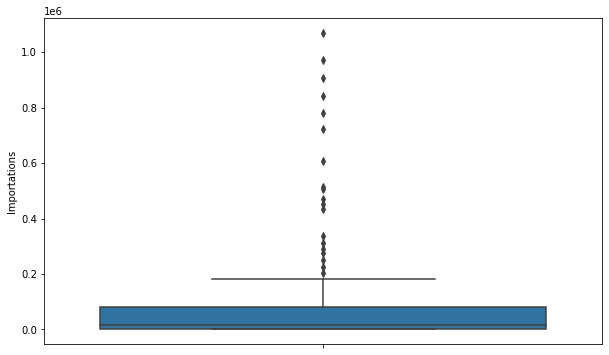

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
80,Japon,2215000,1069000,0,2415000,18500,0.0,2359.0,1.275027e+08,4.930000e+12,1.11
102,Mexique,3249000,972000,0,4219000,32520,0.0,4058.0,1.247773e+08,1.160000e+12,-0.72
31,Chine - RAS de Hong-Kong,24000,907000,0,280000,53510,0.0,391.0,7.306322e+06,3.410000e+11,0.83
4,Allemagne,1514000,842000,0,1739000,19470,167000.0,1609.0,8.265841e+07,3.690000e+12,0.59
133,Royaume-Uni de Grande-Bretagne et d'Irlande du...,1814000,779000,0,2234000,31940,102000.0,2131.0,6.672746e+07,2.700000e+12,0.33
7,Arabie saoudite,616000,722000,97000,1435000,43360,0.0,1435.0,3.310118e+07,6.890000e+11,-0.58
120,Pays-Bas,1100000,608000,0,372000,20330,104000.0,346.0,1.702135e+07,8.340000e+11,0.92
1,Afrique du Sud,1667000,514000,0,2118000,35690,0.0,2035.0,5.700976e+07,3.810000e+11,-0.28
56,France,1750000,506000,0,1573000,22900,89000.0,1485.0,6.484251e+07,2.600000e+12,0.28
74,Iraq,96000,470000,0,566000,14950,0.0,561.0,3.755278e+07,1.870000e+11,-2.31


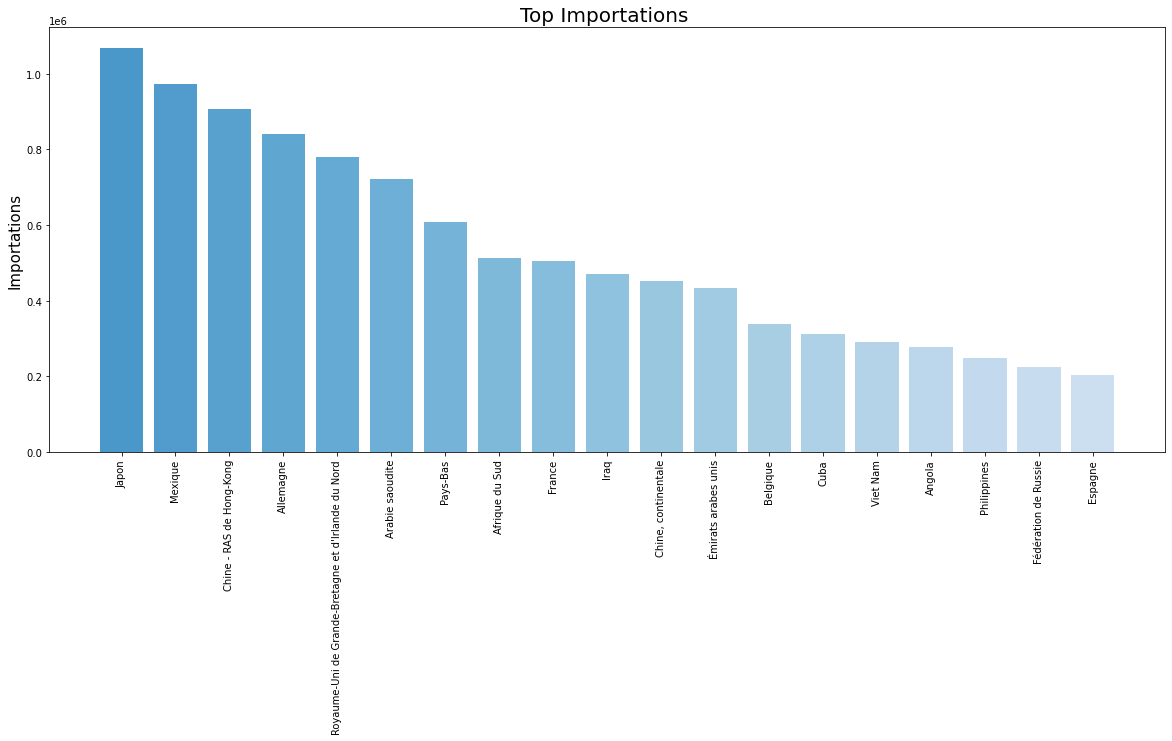

In [56]:
top_valeur(df_dispo_poulet,"Importations", df_dispo_poulet["Importations"].quantile(.25), df_dispo_poulet["Importations"].quantile(.75))

* Production:

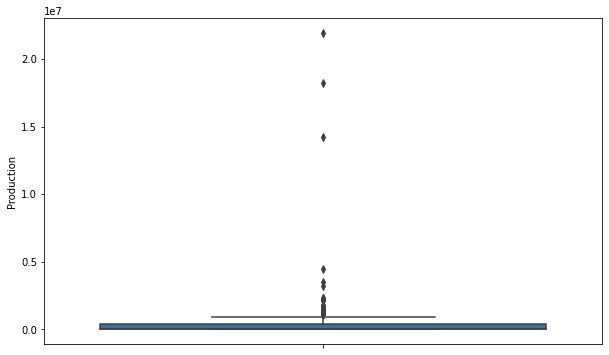

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
51,États-Unis d'Amérique,21914000,123000,0,18266000,55680,77000.0,18100.0,3.250848e+08,1.950000e+13,0.34
33,"Chine, continentale",18236000,452000,0,18161000,12330,1000.0,17518.0,1.421022e+09,1.230000e+13,-0.23
23,Brésil,14201000,3000,0,9982000,48030,0.0,9982.0,2.078338e+08,2.060000e+12,-0.42
53,Fédération de Russie,4444000,226000,0,4556000,30980,54000.0,4509.0,1.455301e+08,1.570000e+12,-0.64
71,Inde,3545000,0,116000,3661000,2220,0.0,2965.0,1.338677e+09,2.650000e+12,-0.76
102,Mexique,3249000,972000,0,4219000,32520,0.0,4058.0,1.247773e+08,1.160000e+12,-0.72
123,Pologne,2351000,55000,0,1156000,30300,38000.0,1150.0,3.795318e+07,5.270000e+11,0.52
72,Indonésie,2301000,1000,21000,2323000,7190,306000.0,1904.0,2.646510e+08,1.020000e+12,-0.50
80,Japon,2215000,1069000,0,2415000,18500,0.0,2359.0,1.275027e+08,4.930000e+12,1.11
159,Turquie,2192000,3000,0,1674000,20640,0.0,1674.0,8.111645e+07,8.590000e+11,-1.79


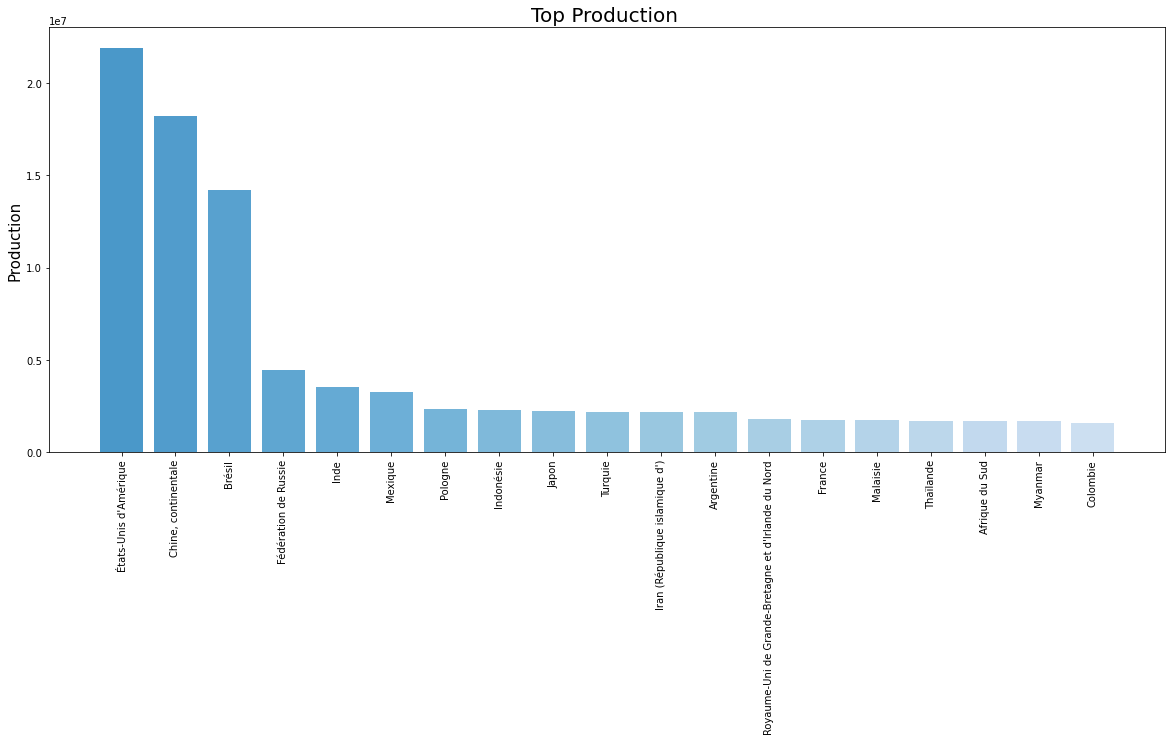

In [57]:
top_valeur(df_dispo_poulet,"Production", df_dispo_poulet["Production"].quantile(.25), df_dispo_poulet["Production"].quantile(.75))

* Disponibilité_intérieure:

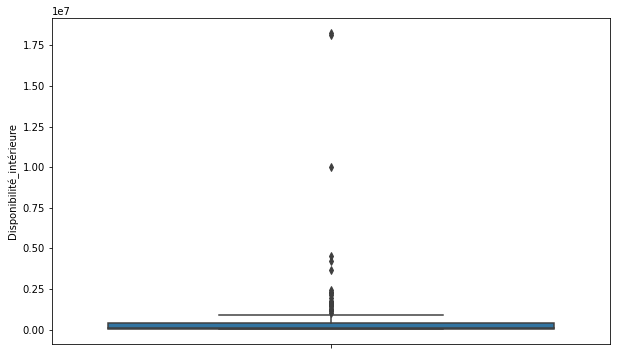

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
51,États-Unis d'Amérique,21914000,123000,0,18266000,55680,77000.0,18100.0,3.250848e+08,1.950000e+13,0.34
33,"Chine, continentale",18236000,452000,0,18161000,12330,1000.0,17518.0,1.421022e+09,1.230000e+13,-0.23
23,Brésil,14201000,3000,0,9982000,48030,0.0,9982.0,2.078338e+08,2.060000e+12,-0.42
53,Fédération de Russie,4444000,226000,0,4556000,30980,54000.0,4509.0,1.455301e+08,1.570000e+12,-0.64
102,Mexique,3249000,972000,0,4219000,32520,0.0,4058.0,1.247773e+08,1.160000e+12,-0.72
71,Inde,3545000,0,116000,3661000,2220,0.0,2965.0,1.338677e+09,2.650000e+12,-0.76
80,Japon,2215000,1069000,0,2415000,18500,0.0,2359.0,1.275027e+08,4.930000e+12,1.11
72,Indonésie,2301000,1000,21000,2323000,7190,306000.0,1904.0,2.646510e+08,1.020000e+12,-0.50
133,Royaume-Uni de Grande-Bretagne et d'Irlande du...,1814000,779000,0,2234000,31940,102000.0,2131.0,6.672746e+07,2.700000e+12,0.33
73,Iran (République islamique d'),2174000,6000,40000,2220000,27520,0.0,2220.0,8.067388e+07,4.870000e+11,-0.93


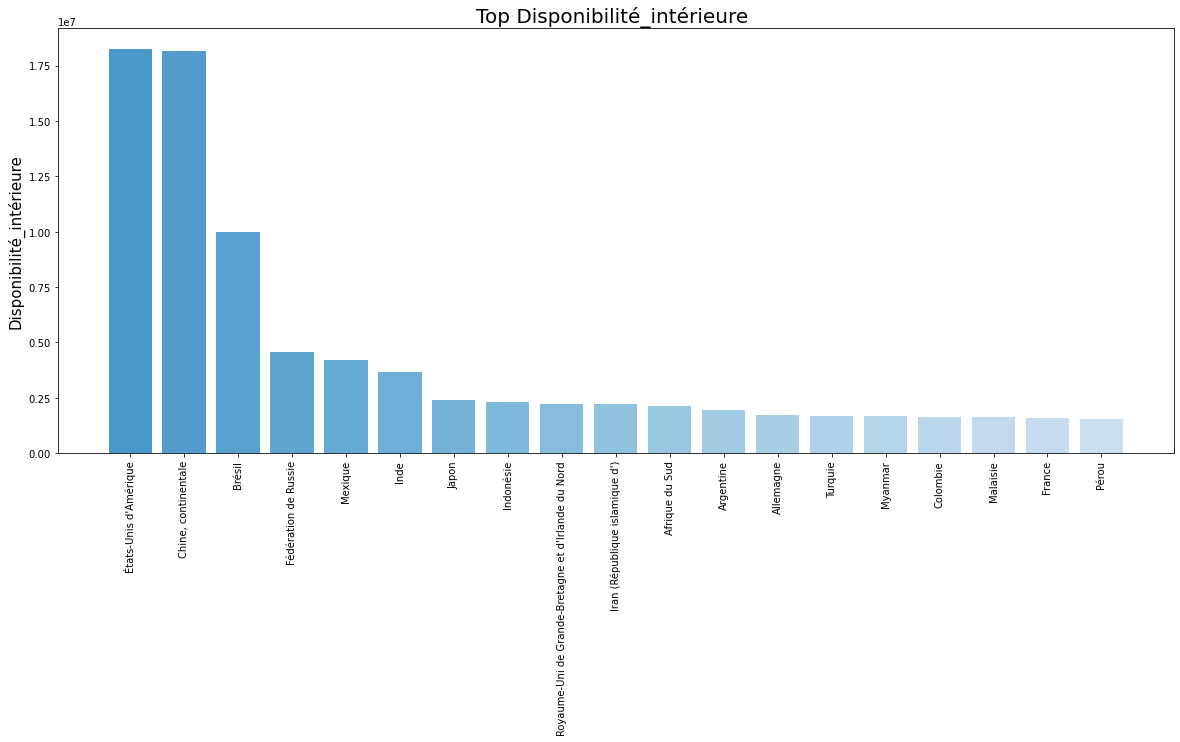

In [58]:
top_valeur(df_dispo_poulet,"Disponibilité_intérieure", df_dispo_poulet["Disponibilité_intérieure"].quantile(.25), df_dispo_poulet["Disponibilité_intérieure"].quantile(.75))

* Disponibilité_alimentaire:

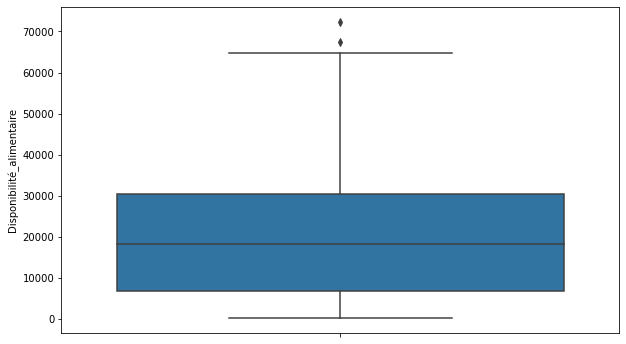

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
137,Saint-Vincent-et-les Grenadines,0,9000,0,8000,72310,0.0,8.0,109827.0,8.476202e+08,0.89
77,Israël,629000,0,7000,636000,67390,1000.0,556.0,8243848.0,3.550000e+11,-0.89
138,Samoa,0,17000,0,15000,64769,0.0,13.0,195352.0,8.320256e+08,1.18
135,Sainte-Lucie,1000,10000,0,11000,56690,0.0,10.0,180954.0,1.996771e+09,0.99
136,Saint-Kitts-et-Nevis,0,4000,0,4000,55770,0.0,3.0,52045.0,1.060638e+09,0.65
51,États-Unis d'Amérique,21914000,123000,0,18266000,55680,77000.0,18100.0,325084756.0,1.950000e+13,0.34
156,Trinité-et-Tobago,61000,23000,0,76000,54540,0.0,75.0,1384059.0,2.318011e+10,0.28
6,Antigua-et-Barbuda,0,7000,0,7000,54100,0.0,5.0,95426.0,1.467978e+09,0.75
31,Chine - RAS de Hong-Kong,24000,907000,0,280000,53510,0.0,391.0,7306322.0,3.410000e+11,0.83
79,Jamaïque,128000,31000,0,152000,51100,0.0,149.0,2920848.0,1.480899e+10,0.31


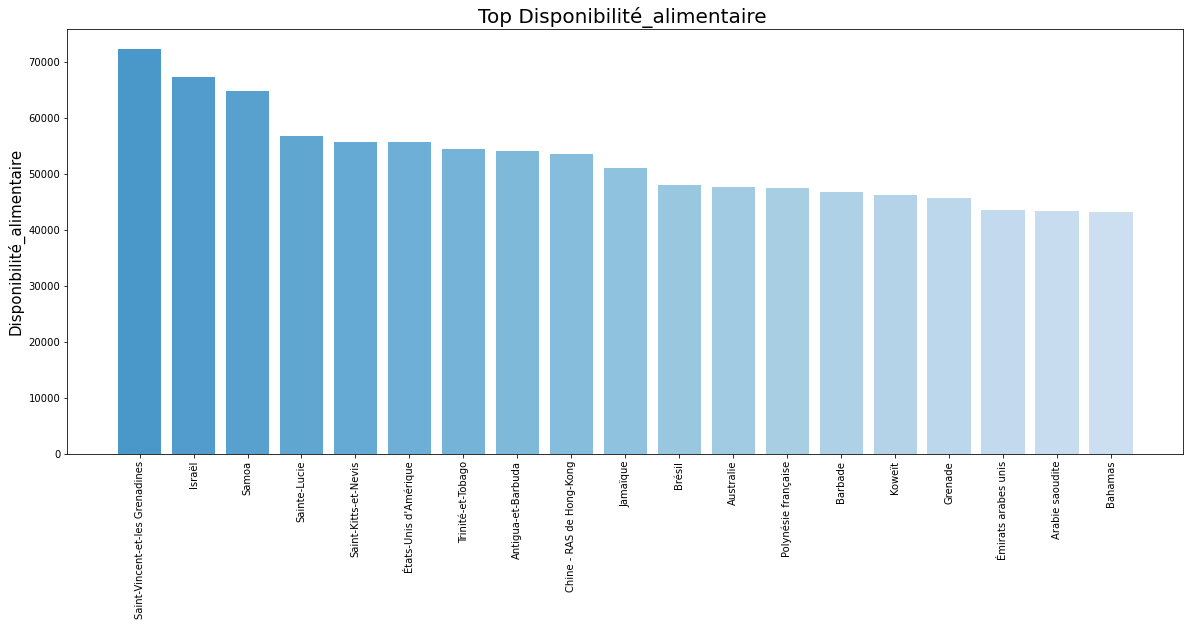

In [59]:
top_valeur(df_dispo_poulet,"Disponibilité_alimentaire", df_dispo_poulet["Disponibilité_alimentaire"].quantile(.25), df_dispo_poulet["Disponibilité_alimentaire"].quantile(.75))

* Traitement:

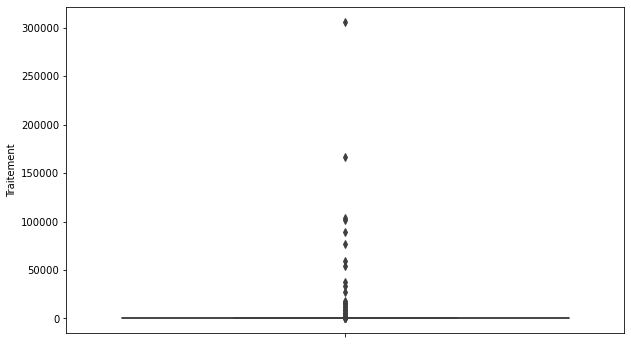

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
72,Indonésie,2301000,1000,21000,2323000,7190,306000.0,1904.0,264650963.0,1.020000e+12,-0.50
4,Allemagne,1514000,842000,0,1739000,19470,167000.0,1609.0,82658409.0,3.690000e+12,0.59
120,Pays-Bas,1100000,608000,0,372000,20330,104000.0,346.0,17021347.0,8.340000e+11,0.92
133,Royaume-Uni de Grande-Bretagne et d'Irlande du...,1814000,779000,0,2234000,31940,102000.0,2131.0,66727461.0,2.700000e+12,0.33
56,France,1750000,506000,0,1573000,22900,89000.0,1485.0,64842509.0,2.600000e+12,0.28
51,États-Unis d'Amérique,21914000,123000,0,18266000,55680,77000.0,18100.0,325084756.0,1.950000e+13,0.34
147,Suède,157000,84000,0,187000,16600,59000.0,164.0,9904896.0,5.410000e+11,0.98
53,Fédération de Russie,4444000,226000,0,4556000,30980,54000.0,4509.0,145530082.0,1.570000e+12,-0.64
123,Pologne,2351000,55000,0,1156000,30300,38000.0,1150.0,37953180.0,5.270000e+11,0.52
17,Belgique,463000,338000,0,152000,12650,33000.0,144.0,11419748.0,5.030000e+11,0.43


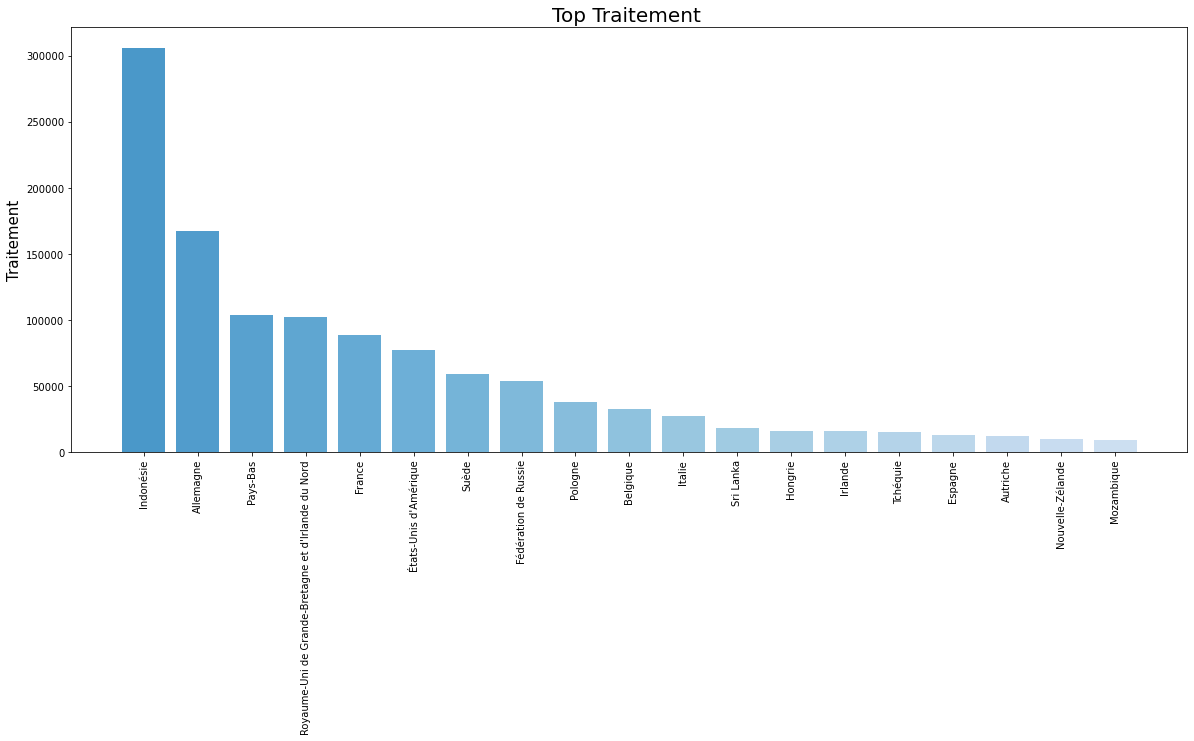

In [60]:
top_valeur(df_dispo_poulet,"Traitement", df_dispo_poulet["Traitement"].quantile(.25), df_dispo_poulet["Traitement"].quantile(.75))

* Nourriture:

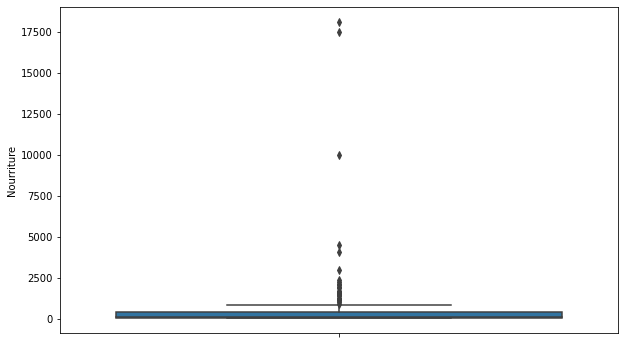

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
51,États-Unis d'Amérique,21914000,123000,0,18266000,55680,77000.0,18100.0,3.250848e+08,1.950000e+13,0.34
33,"Chine, continentale",18236000,452000,0,18161000,12330,1000.0,17518.0,1.421022e+09,1.230000e+13,-0.23
23,Brésil,14201000,3000,0,9982000,48030,0.0,9982.0,2.078338e+08,2.060000e+12,-0.42
53,Fédération de Russie,4444000,226000,0,4556000,30980,54000.0,4509.0,1.455301e+08,1.570000e+12,-0.64
102,Mexique,3249000,972000,0,4219000,32520,0.0,4058.0,1.247773e+08,1.160000e+12,-0.72
71,Inde,3545000,0,116000,3661000,2220,0.0,2965.0,1.338677e+09,2.650000e+12,-0.76
80,Japon,2215000,1069000,0,2415000,18500,0.0,2359.0,1.275027e+08,4.930000e+12,1.11
73,Iran (République islamique d'),2174000,6000,40000,2220000,27520,0.0,2220.0,8.067388e+07,4.870000e+11,-0.93
133,Royaume-Uni de Grande-Bretagne et d'Irlande du...,1814000,779000,0,2234000,31940,102000.0,2131.0,6.672746e+07,2.700000e+12,0.33
1,Afrique du Sud,1667000,514000,0,2118000,35690,0.0,2035.0,5.700976e+07,3.810000e+11,-0.28


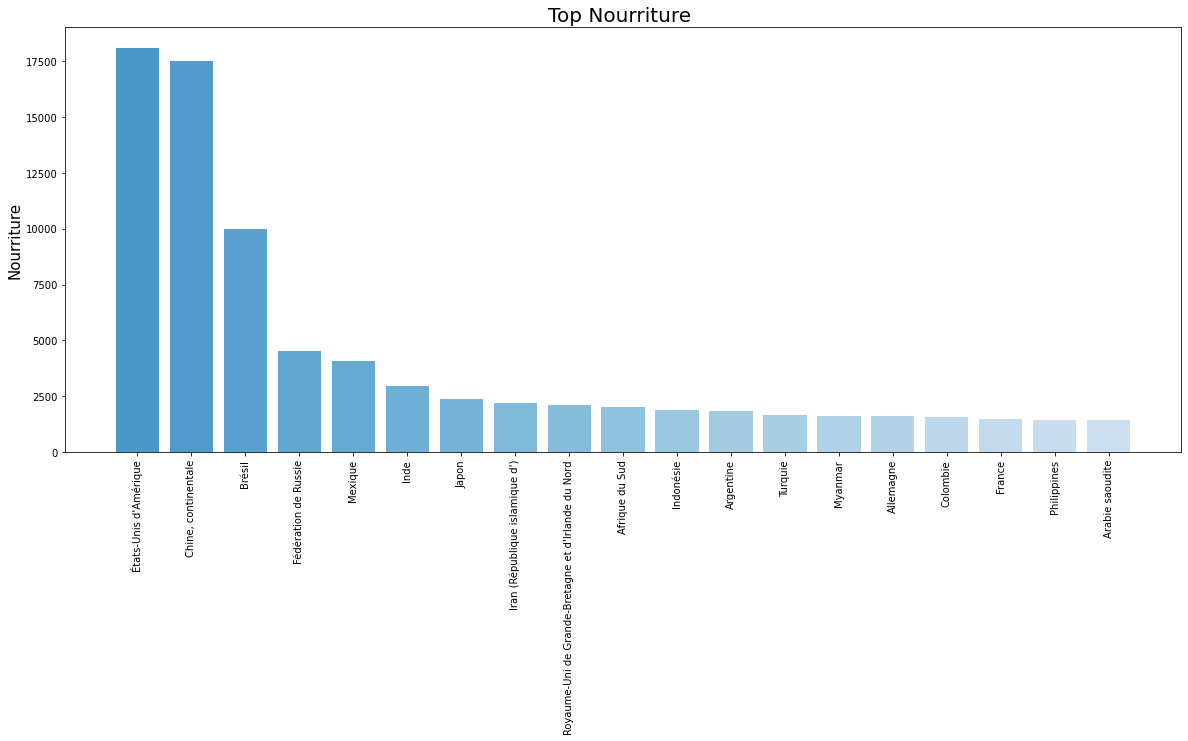

In [61]:
top_valeur(df_dispo_poulet,"Nourriture", df_dispo_poulet["Nourriture"].quantile(.25), df_dispo_poulet["Nourriture"].quantile(.75))

* Nb_habitants:

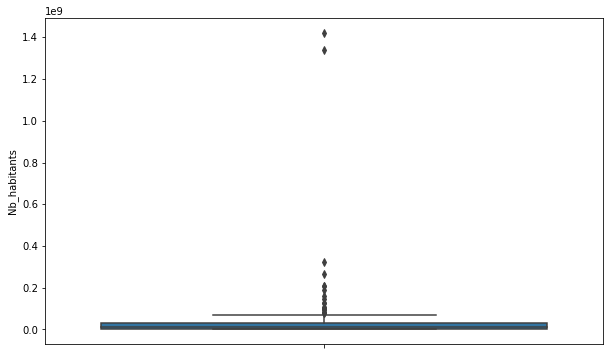

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
33,"Chine, continentale",18236000,452000,0,18161000,12330,1000.0,17518.0,1.421022e+09,1.230000e+13,-0.23
71,Inde,3545000,0,116000,3661000,2220,0.0,2965.0,1.338677e+09,2.650000e+12,-0.76
51,États-Unis d'Amérique,21914000,123000,0,18266000,55680,77000.0,18100.0,3.250848e+08,1.950000e+13,0.34
72,Indonésie,2301000,1000,21000,2323000,7190,306000.0,1904.0,2.646510e+08,1.020000e+12,-0.50
117,Pakistan,1281000,2000,0,1282000,5860,0.0,1218.0,2.079062e+08,3.390000e+11,-2.41
23,Brésil,14201000,3000,0,9982000,48030,0.0,9982.0,2.078338e+08,2.060000e+12,-0.42
111,Nigéria,201000,0,1000,202000,1010,0.0,192.0,1.908732e+08,3.760000e+11,-2.00
14,Bangladesh,249000,0,1000,250000,1500,0.0,240.0,1.596854e+08,2.940000e+11,-1.26
53,Fédération de Russie,4444000,226000,0,4556000,30980,54000.0,4509.0,1.455301e+08,1.570000e+12,-0.64
80,Japon,2215000,1069000,0,2415000,18500,0.0,2359.0,1.275027e+08,4.930000e+12,1.11


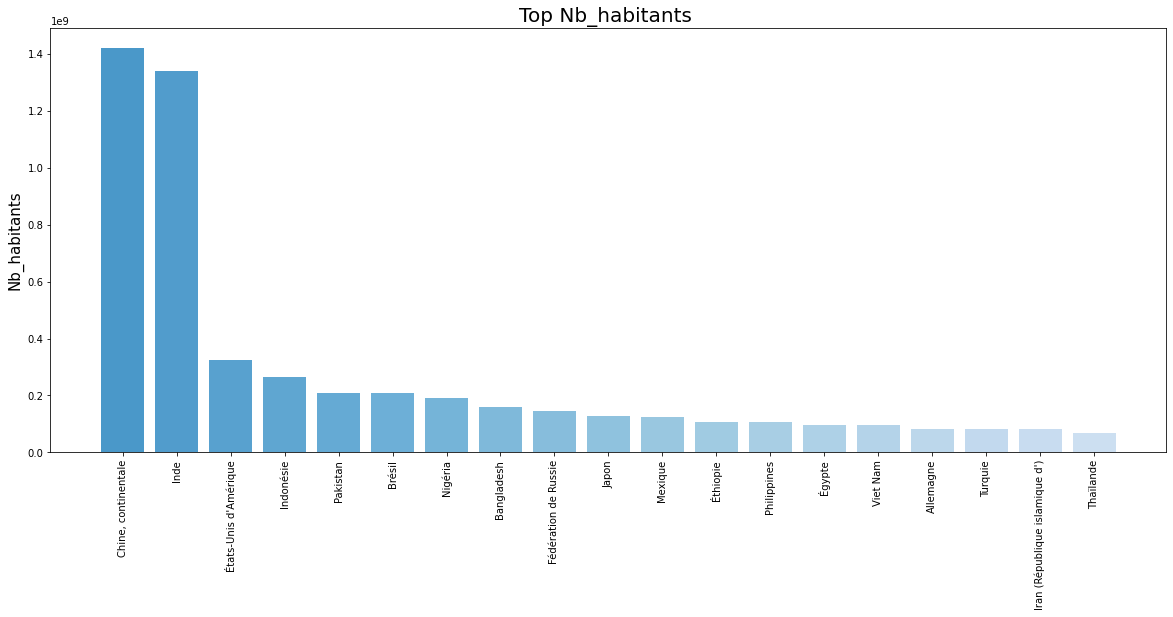

In [62]:
top_valeur(df_dispo_poulet,"Nb_habitants", df_dispo_poulet["Nb_habitants"].quantile(.25), df_dispo_poulet["Nb_habitants"].quantile(.75))

* Pib:

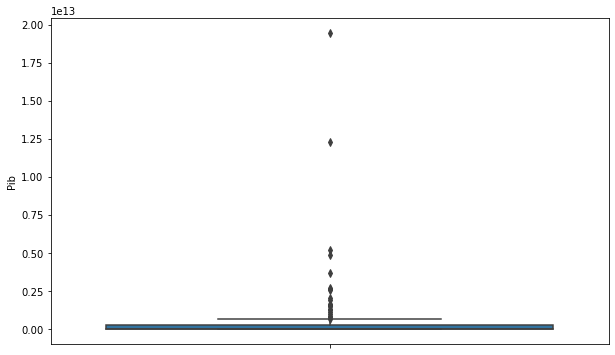

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
51,États-Unis d'Amérique,21914000,123000,0,18266000,55680,77000.0,18100.0,3.250848e+08,1.950000e+13,0.34
33,"Chine, continentale",18236000,452000,0,18161000,12330,1000.0,17518.0,1.421022e+09,1.230000e+13,-0.23
34,"Chine, Taiwan Province de",652000,161000,0,785000,33170,0.0,785.0,2.367455e+07,5.241560e+12,0.86
80,Japon,2215000,1069000,0,2415000,18500,0.0,2359.0,1.275027e+08,4.930000e+12,1.11
4,Allemagne,1514000,842000,0,1739000,19470,167000.0,1609.0,8.265841e+07,3.690000e+12,0.59
133,Royaume-Uni de Grande-Bretagne et d'Irlande du...,1814000,779000,0,2234000,31940,102000.0,2131.0,6.672746e+07,2.700000e+12,0.33
71,Inde,3545000,0,116000,3661000,2220,0.0,2965.0,1.338677e+09,2.650000e+12,-0.76
56,France,1750000,506000,0,1573000,22900,89000.0,1485.0,6.484251e+07,2.600000e+12,0.28
23,Brésil,14201000,3000,0,9982000,48030,0.0,9982.0,2.078338e+08,2.060000e+12,-0.42
78,Italie,1315000,97000,0,1173000,18880,27000.0,1146.0,6.067370e+07,1.960000e+12,0.31


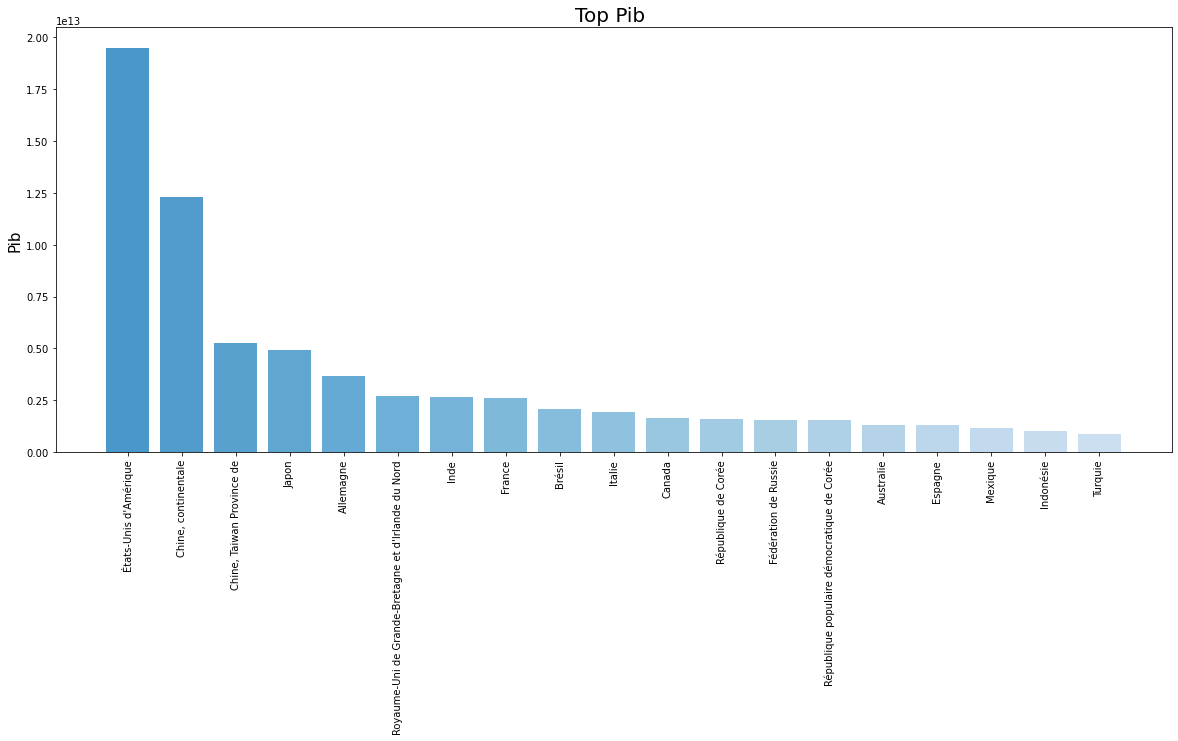

In [63]:
top_valeur(df_dispo_poulet,"Pib", df_dispo_poulet["Pib"].quantile(.25), df_dispo_poulet["Pib"].quantile(.75))

* Stabilité_politique:

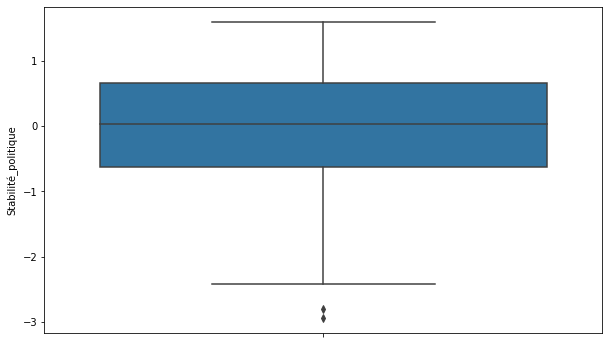

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
114,Nouvelle-Zélande,223000,1000,0,168000,34790,10000.0,164.0,4702034.0,2.070000e+11,1.59
32,Chine - RAS de Macao,3000,23000,0,19000,34470,0.0,21.0,622585.0,5.044094e+10,1.43
76,Islande,10000,2000,0,10000,29950,0.0,10.0,334393.0,2.472829e+10,1.35
92,Luxembourg,0,11000,0,11000,18330,0.0,11.0,591910.0,6.571218e+10,1.33
148,Suisse,91000,51000,0,133000,15720,0.0,133.0,8455804.0,7.040000e+11,1.26
98,Malte,4000,9000,1000,14000,27170,0.0,12.0,437933.0,1.350506e+10,1.25
43,Dominique,0,4000,0,4000,35190,0.0,3.0,71458.0,5.215519e+08,1.20
138,Samoa,0,17000,0,15000,64769,0.0,13.0,195352.0,8.320256e+08,1.18
112,Norvège,101000,2000,0,102000,19050,1000.0,101.0,5296326.0,3.980000e+11,1.17
125,Portugal,361000,82000,0,325000,30580,1000.0,315.0,10288527.0,2.210000e+11,1.12


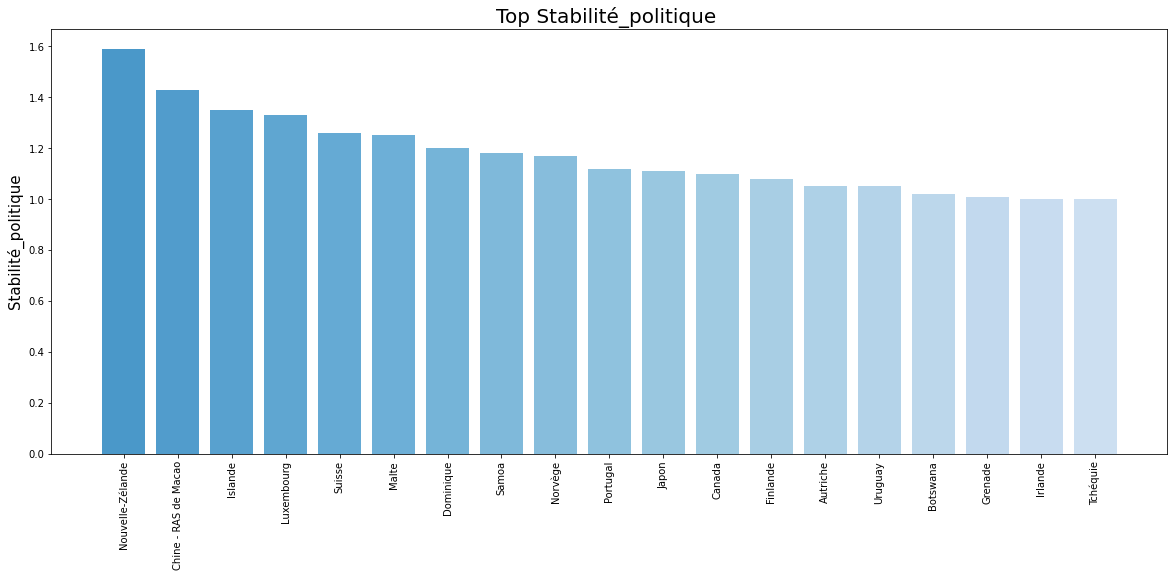

In [64]:
top_valeur(df_dispo_poulet,"Stabilité_politique", df_dispo_poulet["Stabilité_politique"].quantile(.25), df_dispo_poulet["Stabilité_politique"].quantile(.75))

* Liste des pays ayant une stabilité politique au dessous des données habituelles:

In [65]:
val_abb_Stabilité_politique_2 = df_dispo_poulet.sort_values(by='Stabilité_politique', ascending=True).head(5)
val_abb_Stabilité_politique_2

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
165,Yémen,168000,78000,0,246000,8530,0.0,237.0,27834819.0,2.684223e+10,-2.94
0,Afghanistan,28000,29000,0,57000,1530,0.0,55.0,36296113.0,1.875347e+10,-2.80
117,Pakistan,1281000,2000,0,1282000,5860,0.0,1218.0,207906209.0,3.390000e+11,-2.41
89,Liban,64000,13000,0,73000,10740,0.0,73.0,6819373.0,5.302768e+10,-2.36
74,Iraq,96000,470000,0,566000,14950,0.0,561.0,37552781.0,1.870000e+11,-2.31


* Résumé des outliers par variables:

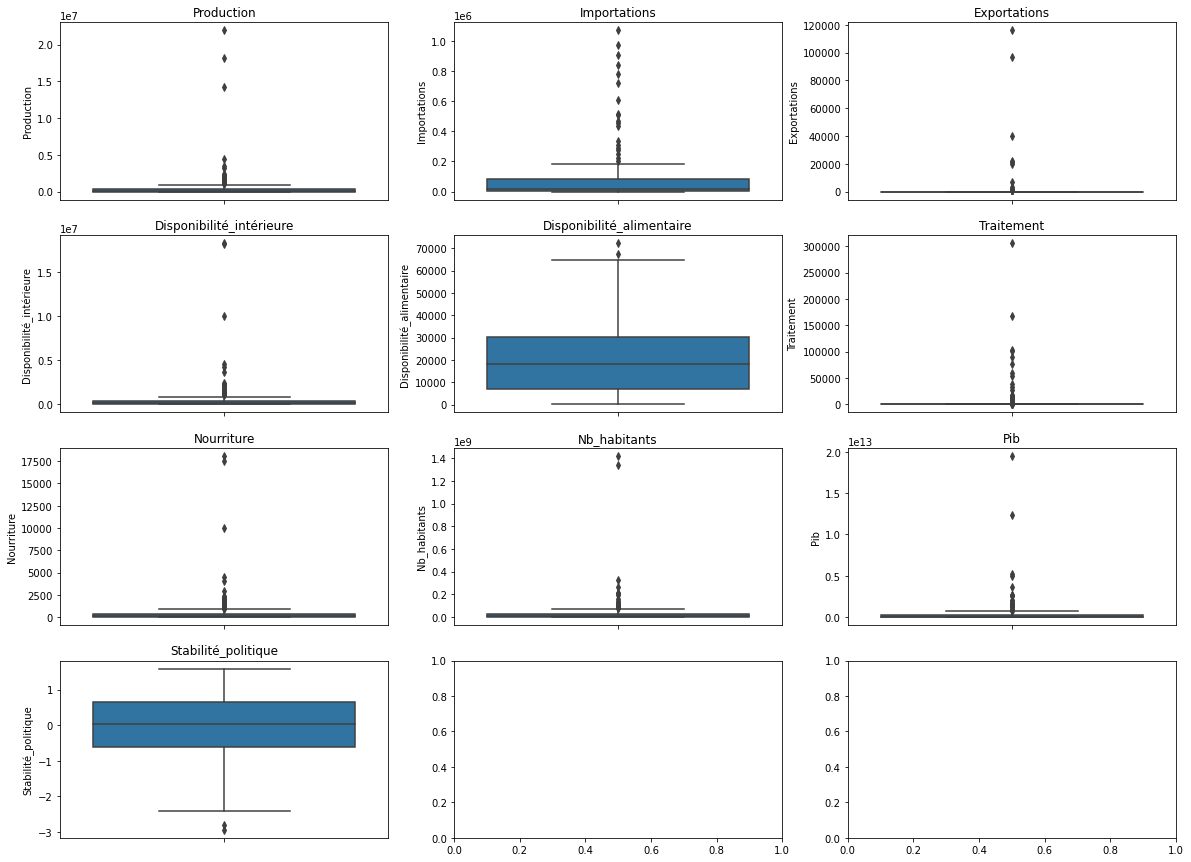

In [66]:
f, axes = plt.subplots(4,3,figsize = (20,15))
s = sns.boxplot(y=df_dispo_poulet.Production,ax=axes[0, 0])
axes[0, 0].set_title('Production')
s = sns.boxplot(y=df_dispo_poulet.Importations,ax=axes[0, 1])
axes[0, 1].set_title('Importations')
s=sns.boxplot(y=df_dispo_poulet.Exportations,ax=axes[0, 2])
axes[0, 2].set_title('Exportations')

s=sns.boxplot(y=df_dispo_poulet.Disponibilité_intérieure,ax=axes[1, 0])
axes[1, 0].set_title('Disponibilité_intérieure')
s=sns.boxplot(y=df_dispo_poulet.Disponibilité_alimentaire,ax=axes[1, 1])
axes[1, 1].set_title('Disponibilité_alimentaire')
s=sns.boxplot(y=df_dispo_poulet.Traitement,ax=axes[1, 2])
axes[1, 2].set_title('Traitement')

s=sns.boxplot(y=df_dispo_poulet.Nourriture,ax=axes[2, 0])
axes[2, 0].set_title('Nourriture')
s=sns.boxplot(y=df_dispo_poulet.Nb_habitants,ax=axes[2, 1])
axes[2, 1].set_title('Nb_habitants')
s=sns.boxplot(y=df_dispo_poulet.Pib,ax=axes[2, 2])
axes[2, 2].set_title('Pib')

s=sns.boxplot(y=df_dispo_poulet.Stabilité_politique,ax=axes[3, 0])
axes[3, 0].set_title('Stabilité_politique')
plt.show()

## Analyse bivariée des données:

* Observons la distribution entre les variables:

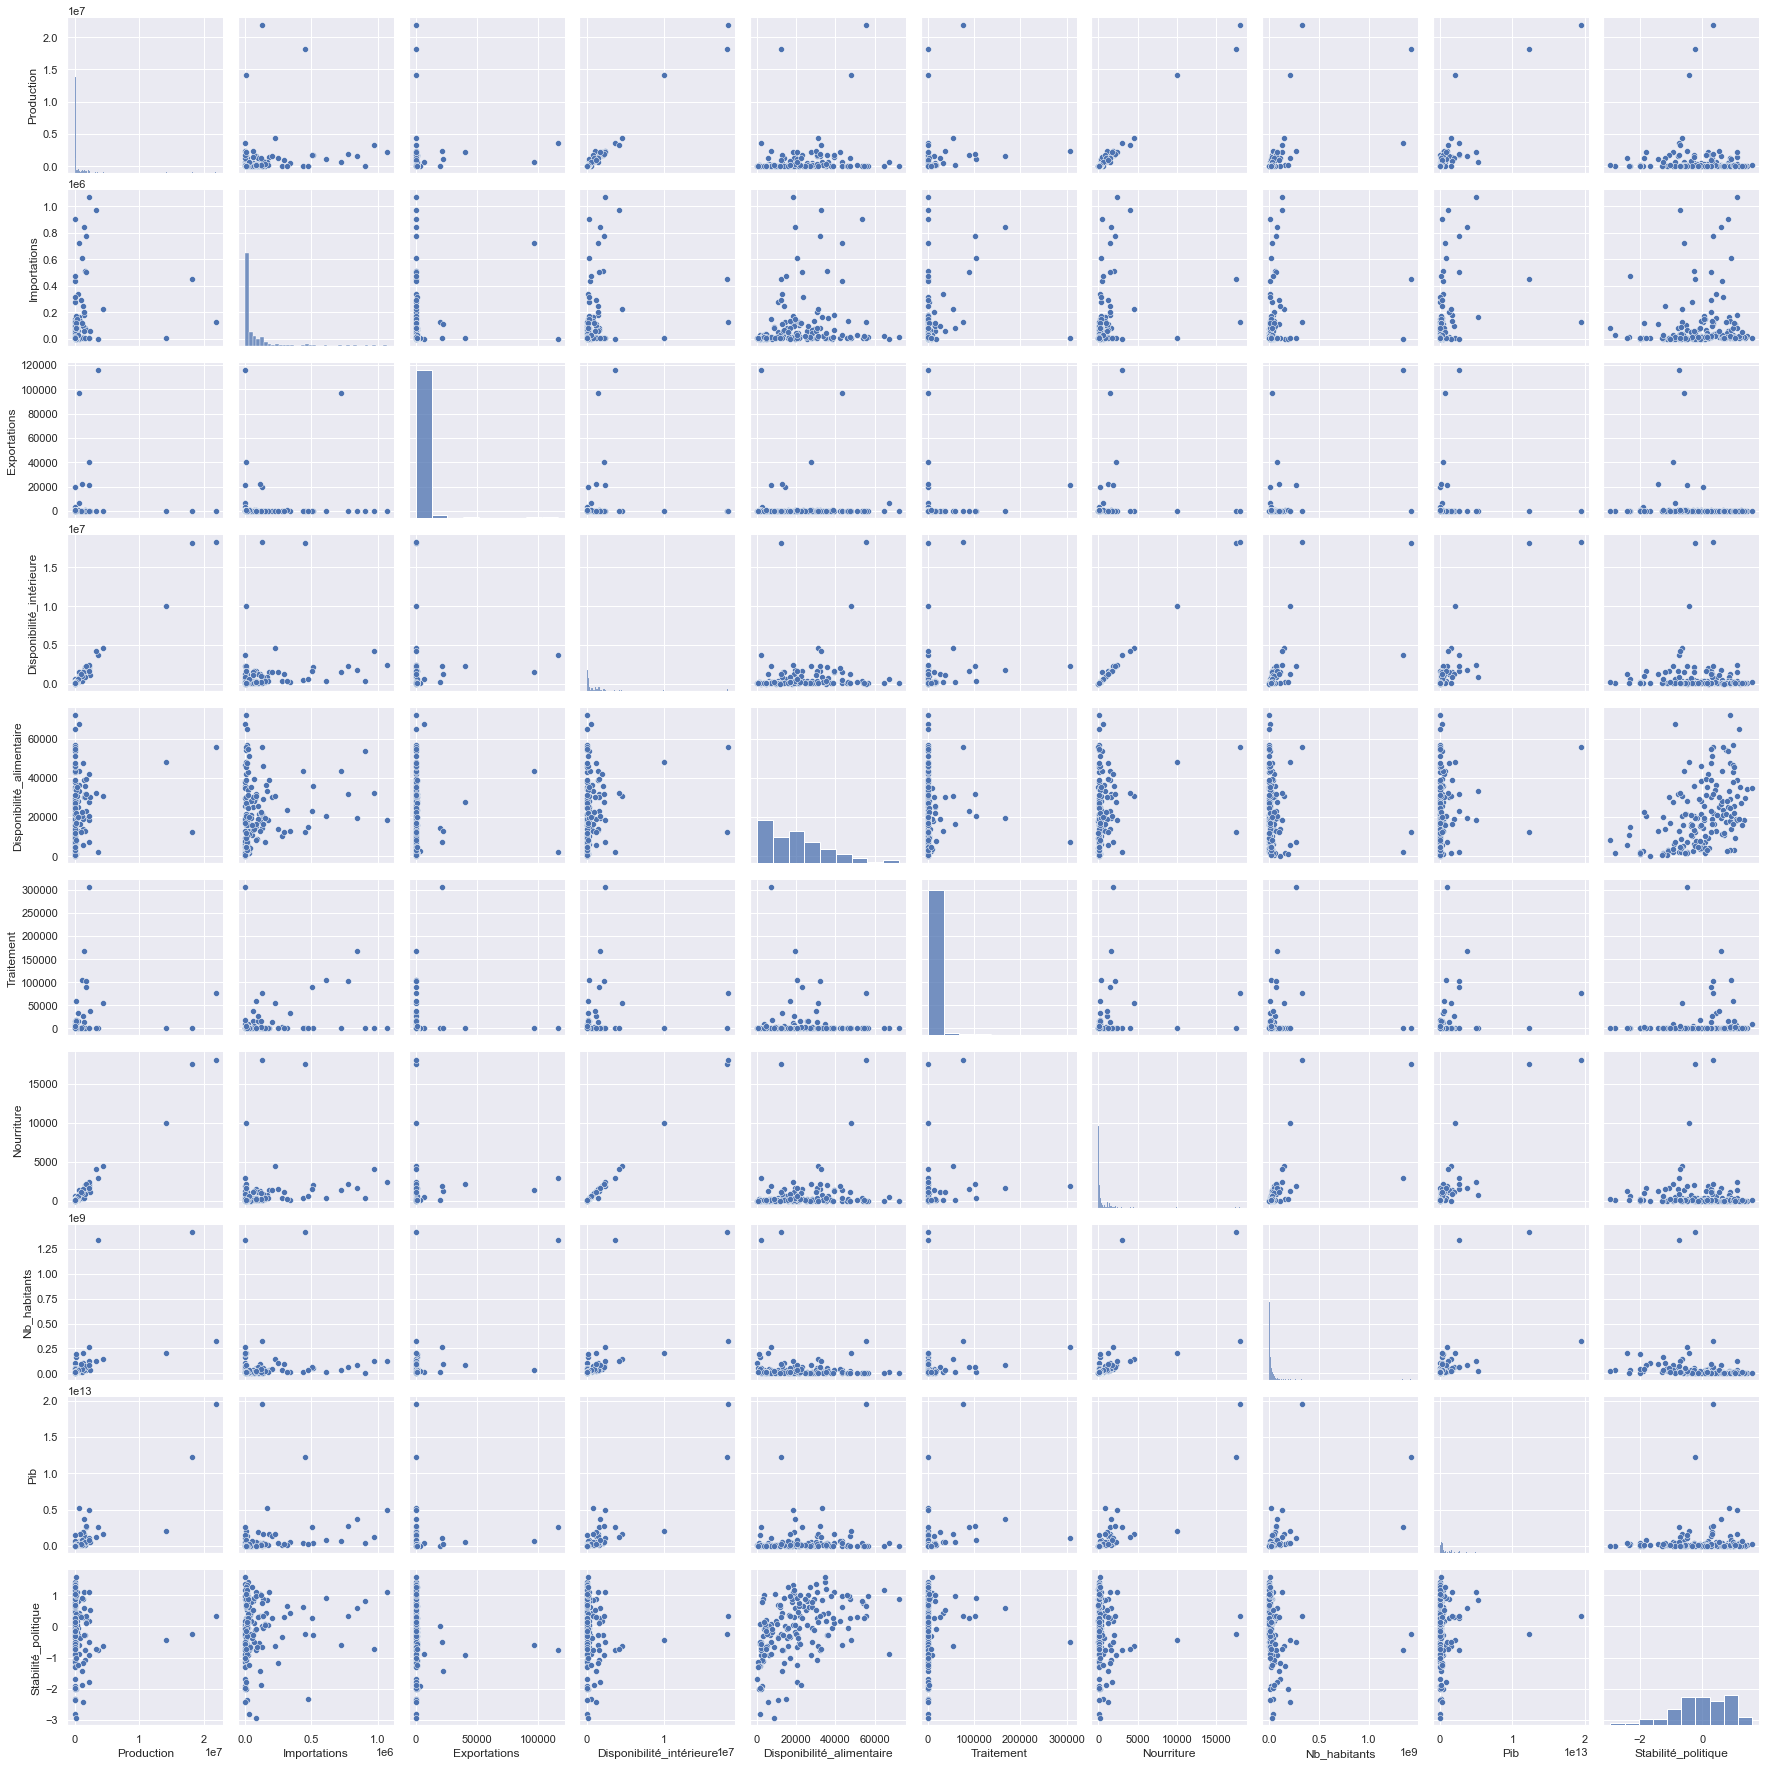

In [67]:
sns.set(rc={'figure.figsize':(30,30)})
sns.pairplot(df_dispo_poulet)

* Matrice de corrélation:

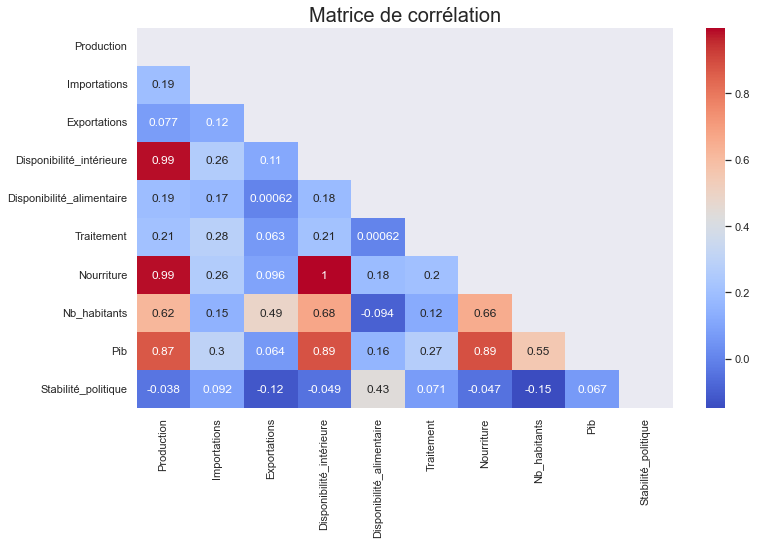

In [68]:
mask = np.triu(np.ones_like(df_dispo_poulet.corr())) 
plt.figure(figsize=(12, 7))
dataplot = sns.heatmap(df_dispo_poulet.corr(), cmap="coolwarm", annot=True, mask=mask) 
plt.title('Matrice de corrélation', fontsize=20)
plt.show() 

On peut voir qu'il existe des correlations entre certaines variables. Pour développer notre exportation, l'observation de cinq variables sera à privilégier: l'importation, la production, la quantité de nourriture attribuée à la population, le PIB et le traitement.

La production: pour observer quels sont les pays ayant les plus gros besoins et voir quelles variables peuvent l'influencer;

L'importation: pour observer quels sont les pays ayant le plus besoin de pays exportateurs et voir quelles variables peuvent l'influencer. 

Le traitement: pour observer quels sont les pays ayant le plus besoin de poulet comme matière première pour la transformer.

La nourriture: pour observer quels sont les plus gros consommateurs.

Le PIB: pour classer les pays ayant le plus de moyen d'acheter.

* Correction des données:

Voyons ce que donnerais l'analyse sans les plus gros outliers.

In [69]:
df_test = df_dispo_poulet.copy()

In [70]:
df_test = df_test.drop(df_test.index[[0, 1, 4, 5, 7, 10, 14, 17, 23, 29, 31, 33, 34, 41, 44, 46, 48, 51, 52, 53, 56, 71, 72, 73, 74, 77, 78, 80, 102, 111, 117, 120, 122, 127, 130, 133, 137, 164, 165]])

*Nous avons supprimé les plus gros outliers pour avoir des résultats plus proche de la réalité et ainsi voir s'il y a vraiment correlation entre certaines variables.*

* Matrice de corrélation sans les outliers:

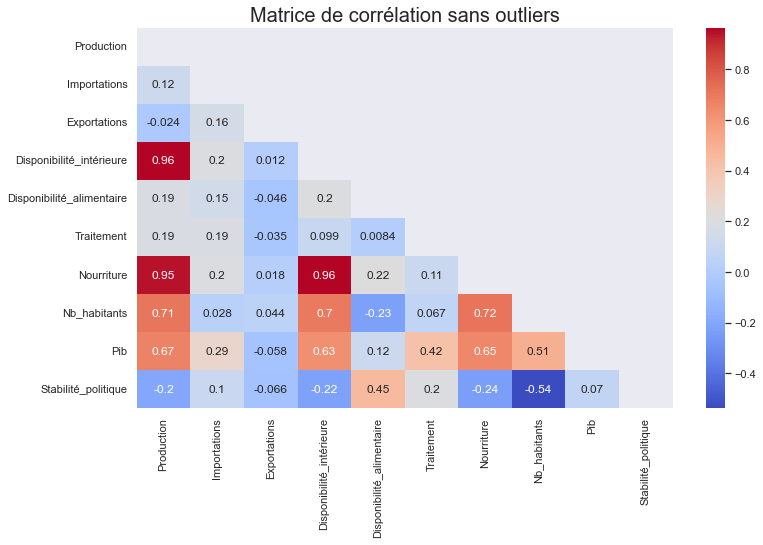

In [71]:
mask = np.triu(np.ones_like(df_test.corr())) 
plt.figure(figsize=(12, 7))
dataplot = sns.heatmap(df_test.corr(), cmap="coolwarm", annot=True, mask=mask) 
plt.title('Matrice de corrélation sans outliers', fontsize=20)
plt.show() 

*On remarque qu'il y a plus de corrélations entre les variables après suppression des outliers.*

* Nous allons voir à l'aide de tests statistiques si la correlation entre l'importation, la production et les autres variables est verifiée.

### Lien entre l'importation et la quantité de nourriture pour les habitants:

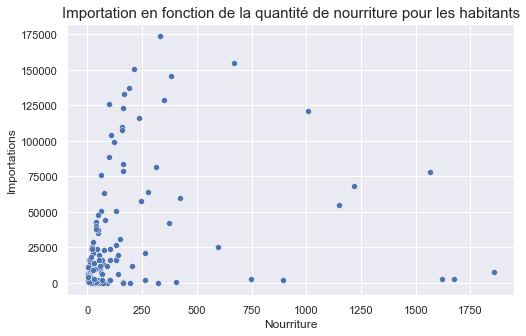

In [72]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=df_test,x='Nourriture',y='Importations')
plt.title("Importation en fonction de la quantité de nourriture pour les habitants",fontsize = 15)
plt.show()

In [73]:
stats.shapiro(df_test['Importations'])

ShapiroResult(statistic=0.7452852725982666, pvalue=1.1265736065378673e-13)

Ici p_value<0.05 donc la distribution ne suit pas une loi normale. Nous appliquerons donc un test non-paramétrique.

In [74]:
stats.spearmanr(df_test['Nourriture'],df_test['Importations'])

SpearmanrResult(correlation=0.3773051756448798, pvalue=1.044791237486656e-05)

p_value<0.05 donc H0 acceptée. Il y a donc corrélation entre la quantité de nourriture pour la population et l'importation de poulet.

### Lien entre l'importation et le nombre d'habitant:

Text(0.5, 1.0, "Importation en fonction du nombre d'habitants")

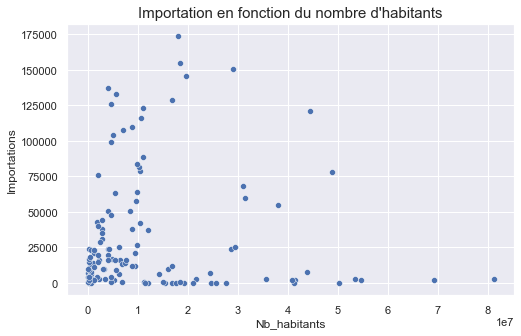

In [75]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=df_test,x='Nb_habitants',y='Importations')
plt.title("Importation en fonction du nombre d'habitants",fontsize = 15)

In [76]:
stats.spearmanr(df_test['Nb_habitants'],df_test['Importations'])

SpearmanrResult(correlation=0.019123691995275697, pvalue=0.8296823922979362)

p_value>0.05 donc H0 acceptée. Il n'y a donc pas de corrélation entre le nombre d'habitants et l'importation de poulet.

### Lien entre l'importation et le pib du pays:

Text(0.5, 1.0, 'Importation en fonction du pib')

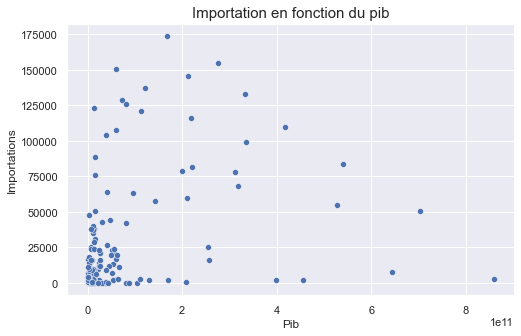

In [77]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=df_test,x='Pib',y='Importations')
plt.title("Importation en fonction du pib",fontsize = 15)

In [78]:
stats.spearmanr(df_test['Pib'],df_test['Importations'])

SpearmanrResult(correlation=0.3277023995450324, pvalue=0.00015004940861977547)

p_value<0.05 donc H0 acceptée. Il y a donc corrélation entre le Pib et l'importation de poulet.

### Lien entre l'importation et le traitement:

Text(0.5, 1.0, 'Importation en du traitement')

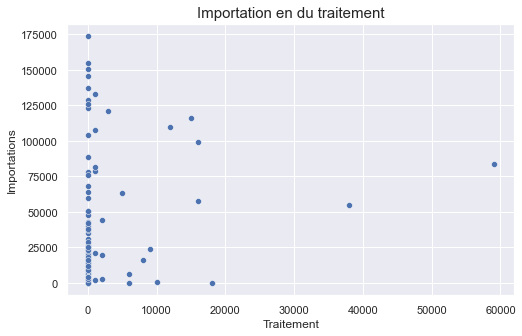

In [79]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=df_test,x='Traitement',y='Importations')
plt.title("Importation en du traitement",fontsize = 15)

In [80]:
stats.spearmanr(df_test['Traitement'],df_test['Importations'])

SpearmanrResult(correlation=0.2222134353176514, pvalue=0.011373090423785492)

p_value<0.05 donc H0 acceptée. Il y a donc corrélation entre le Traitement et l'importation de poulet.

### Lien entre la production et la quantité de nourriture pour les habitants:

Text(0.5, 1.0, 'Production en fonction de la quantité de nourriture pour les habitants')

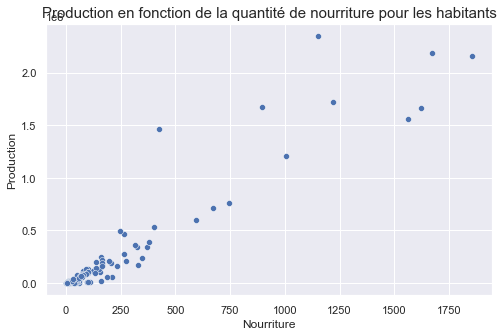

In [81]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=df_test,x='Nourriture',y='Production')
plt.title("Production en fonction de la quantité de nourriture pour les habitants",fontsize = 15)

In [82]:
stats.shapiro(df_test['Production'])

ShapiroResult(statistic=0.4878988265991211, pvalue=2.7042299737978393e-19)

Ici p_value<0.05 donc la distribution ne suit pas une loi normale. Nous appliquerons donc un test non-paramétrique.

In [83]:
stats.spearmanr(df_test['Nourriture'],df_test['Production'])

SpearmanrResult(correlation=0.92681946947278, pvalue=7.213732472628575e-56)

p_value<0.05 donc H0 acceptée. Il y a donc corrélation entre la quantité de nourriture pour la population et l'importation de poulet.

### Lien entre la production et le nombre d'habitant:

Text(0.5, 1.0, "Production en fonction du nombre d'habitants")

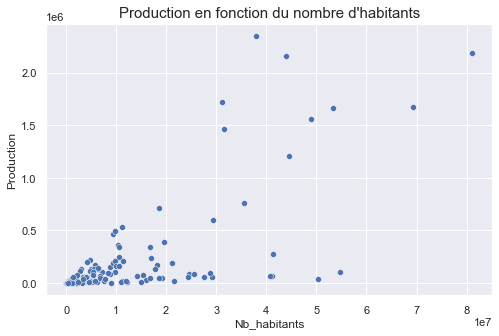

In [84]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=df_test,x='Nb_habitants',y='Production')
plt.title("Production en fonction du nombre d'habitants",fontsize = 15)

In [85]:
stats.spearmanr(df_test['Nb_habitants'],df_test['Production'])

SpearmanrResult(correlation=0.7340084265905353, pvalue=4.360209604933993e-23)

p_value<0.05 donc H0 acceptée. Il y a donc corrélation entre le nombre d'habitants et la production de poulet.

### Lien entre la production et le pib du pays:

Text(0.5, 1.0, 'Production en fonction du Pib')

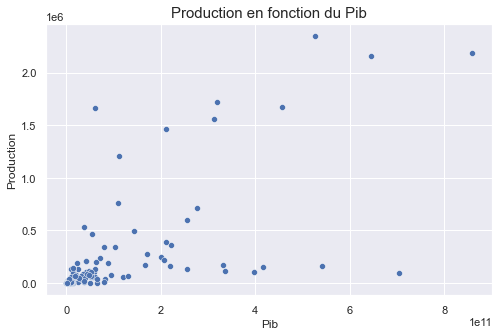

In [86]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=df_test,x='Pib',y='Production')
plt.title("Production en fonction du Pib",fontsize = 15)

In [87]:
stats.spearmanr(df_test['Pib'],df_test['Production'])

SpearmanrResult(correlation=0.8078574747021212, pvalue=6.0268773449423e-31)

p_value<0.05 donc H0 acceptée. Il y a donc corrélation entre le pib et la production de poulet.

### Lien entre la production et le traitement:

Text(0.5, 1.0, 'Production en fonction traitement')

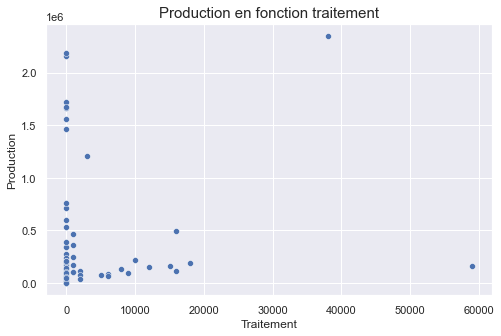

In [88]:
fig = plt.subplots(figsize =(8, 5))
sns.scatterplot(data=df_test,x='Traitement',y='Production')
plt.title("Production en fonction traitement",fontsize = 15)

In [89]:
stats.spearmanr(df_test['Traitement'],df_test['Production'])

SpearmanrResult(correlation=0.38641580188853136, pvalue=6.09442510339379e-06)

p_value<0.05 donc H0 acceptée. Il y a donc corrélation entre le pib et la production de poulet.

On peut conclure qu'il existe un lien plus ou moins fort entre la production, l'importation et les variables que l'on souhaite privilégier pour l'analyse.

On peut donc dire que le Pib, le nombre d'habitants, le traitement et la nourriture influencent la production et l'importation de poulets.

Nous allons donc privilégier ces variables dans l'observation et dans le choix des pays à selectionner.

Pour la suite nous gardons les outliers pour avoir tous les pays car certains outliers peuvent etre des potentiels futurs clients.

## Analyse à l'aide de deux méthodes de clustering:

### Classification ascendante hiérarchique:

* Préparation des données:

In [90]:
df_cah = df_dispo_poulet.copy()

In [91]:
df_cah.set_index('Pays',inplace = True)
X_pays= df_cah.index
Pays = str(X_pays)
df_cah.head()

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
Pays,,,,,,,,,,
Afghanistan,28000,29000,0,57000,1530,0.0,55.0,36296113.0,1.875347e+10,-2.80
Afrique du Sud,1667000,514000,0,2118000,35690,0.0,2035.0,57009756.0,3.810000e+11,-0.28
Albanie,13000,38000,0,47000,16360,0.0,47.0,2884169.0,1.301969e+10,0.38
Algérie,275000,2000,0,277000,6380,0.0,264.0,41389189.0,1.700000e+11,-0.92
Allemagne,1514000,842000,0,1739000,19470,167000.0,1609.0,82658409.0,3.690000e+12,0.59


*La colonne pays a été changée en index pour la suite de l'analyse qui ne prend en compte que les données chiffrées.*

* Normalisation des données:

In [92]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df_cah)
X_scaled = std_scale.transform(df_cah)
df_norm = pd.DataFrame(X_scaled, columns=df_cah.columns, index=df_cah.index)

In [93]:
df_norm

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
Pays,,,,,,,,,,
Afghanistan,-0.279547,-0.328896,-0.166818,-0.291318,-1.197913,-0.233701,-0.284732,-0.047467,-0.261767,-3.012330
Afrique du Sud,0.377630,2.264583,-0.166818,0.648741,0.956748,-0.233701,0.639768,0.086752,-0.070765,-0.244572
Albanie,-0.285561,-0.280769,-0.166818,-0.295880,-0.262502,-0.233701,-0.288467,-0.263969,-0.264791,0.480317
Algérie,-0.180509,-0.473275,-0.166818,-0.190972,-0.891997,-0.233701,-0.187146,-0.014465,-0.182019,-0.947494
Allemagne,0.316283,4.018524,-0.166818,0.475872,-0.066337,5.189551,0.440860,0.252949,1.673979,0.710964
...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),-0.050197,-0.350285,-0.085111,-0.031787,-0.015246,-0.233701,-0.032128,-0.092136,-0.137154,-1.309939
Viet Nam,0.077309,1.072118,-0.166818,0.232761,-0.516697,-0.233701,0.234015,0.330332,-0.123492,0.381469
Yémen,-0.223412,-0.066874,-0.166818,-0.205112,-0.756384,-0.233701,-0.199752,-0.102294,-0.257502,-3.166094


* Classification ascendante hiérarchique

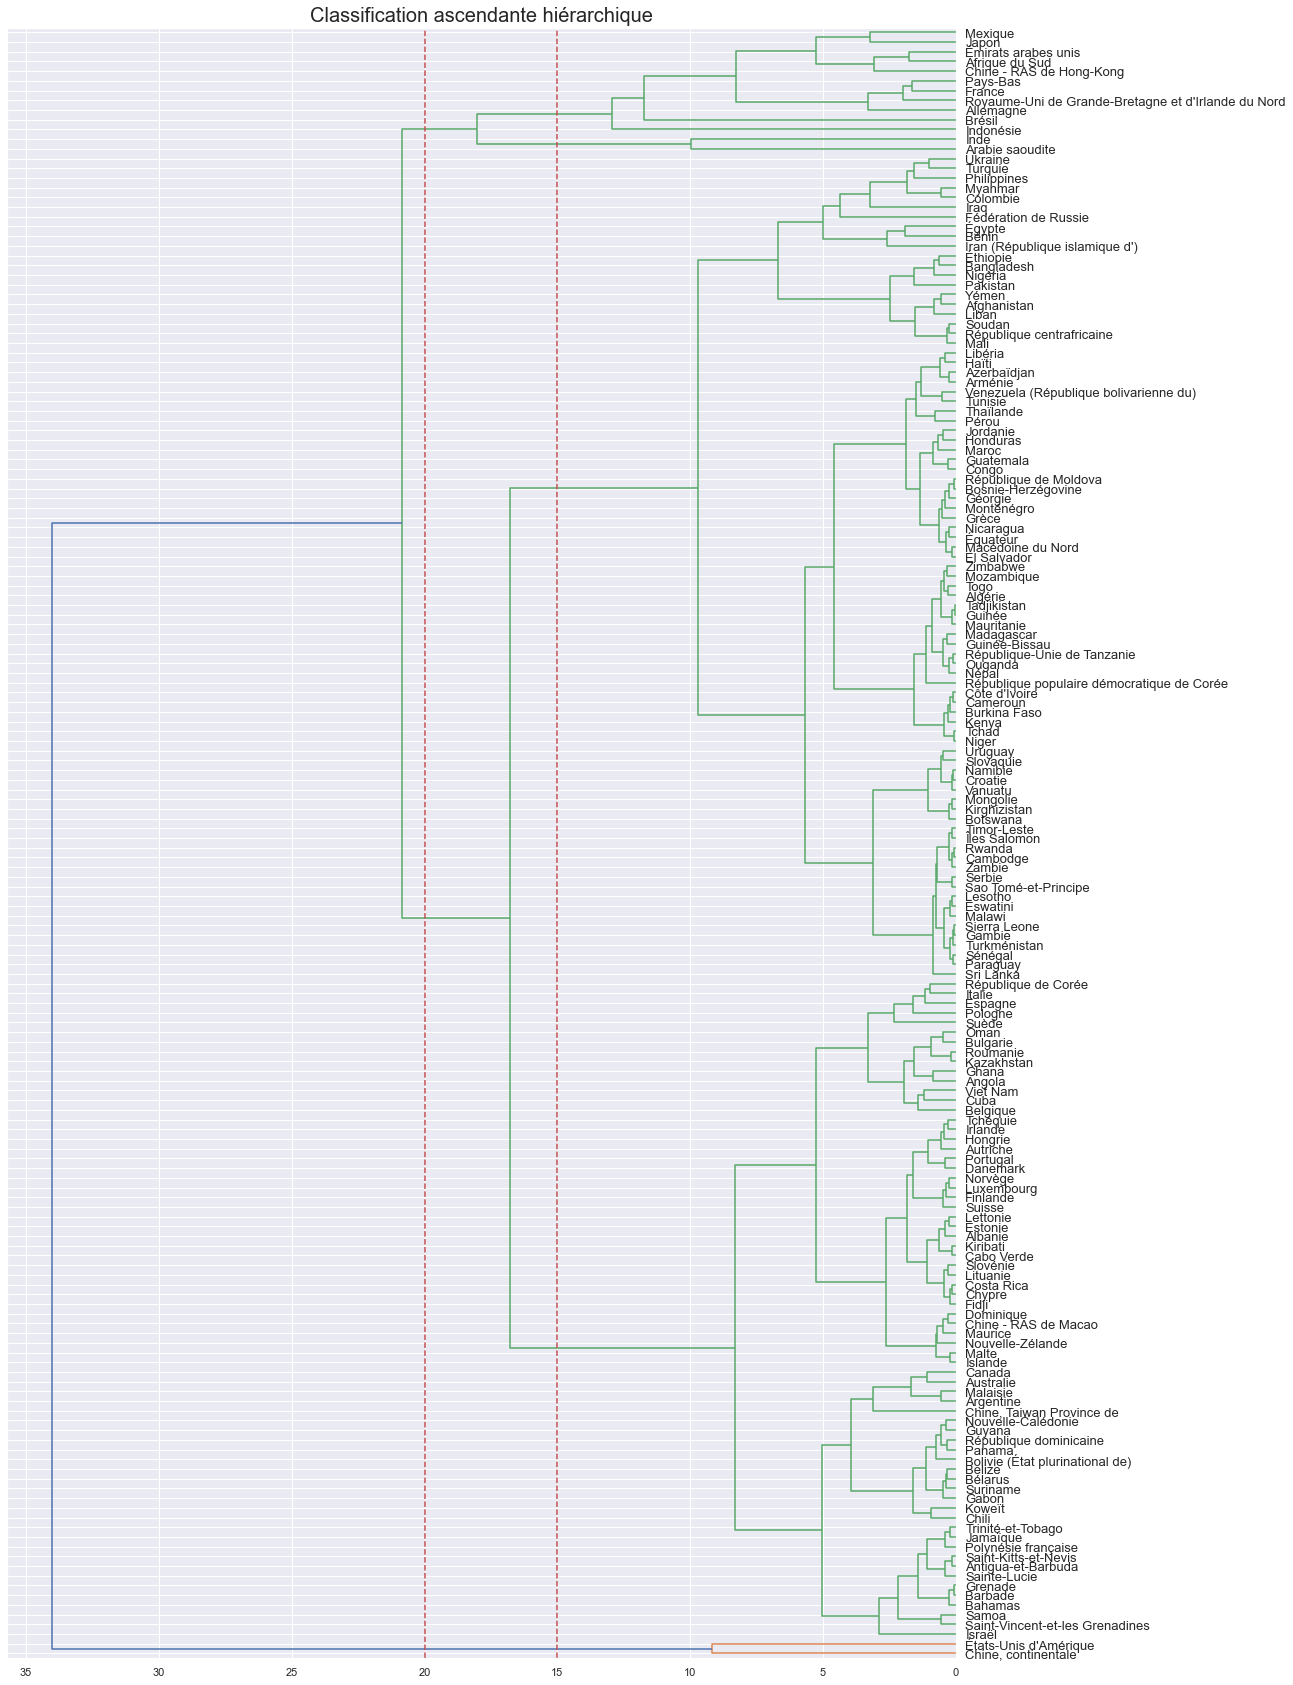

In [94]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

#générer la matrice des liens 
Z = linkage(df_norm, method='ward', metric='euclidean') 

# génération et affichage du dendrogramme
                   
plt.figure(figsize=(17,30))
plt.title("Classification ascendante hiérarchique",fontsize = 20) 
dendrogram(Z, labels=df_norm.index, leaf_rotation=0, leaf_font_size =13,orientation = 'left')
plt.axvline(x=15, color='r', linestyle='--')
plt.axvline(x=20, color='r', linestyle='--')
plt.show()

Nous pouvons effectuer un partitionnement en 3 ou 5 clusters. Voyons si nous observons une différence entre ces deux types de partitionnement.

* Pays par groupes pour un partitionnement en 3 clusters:

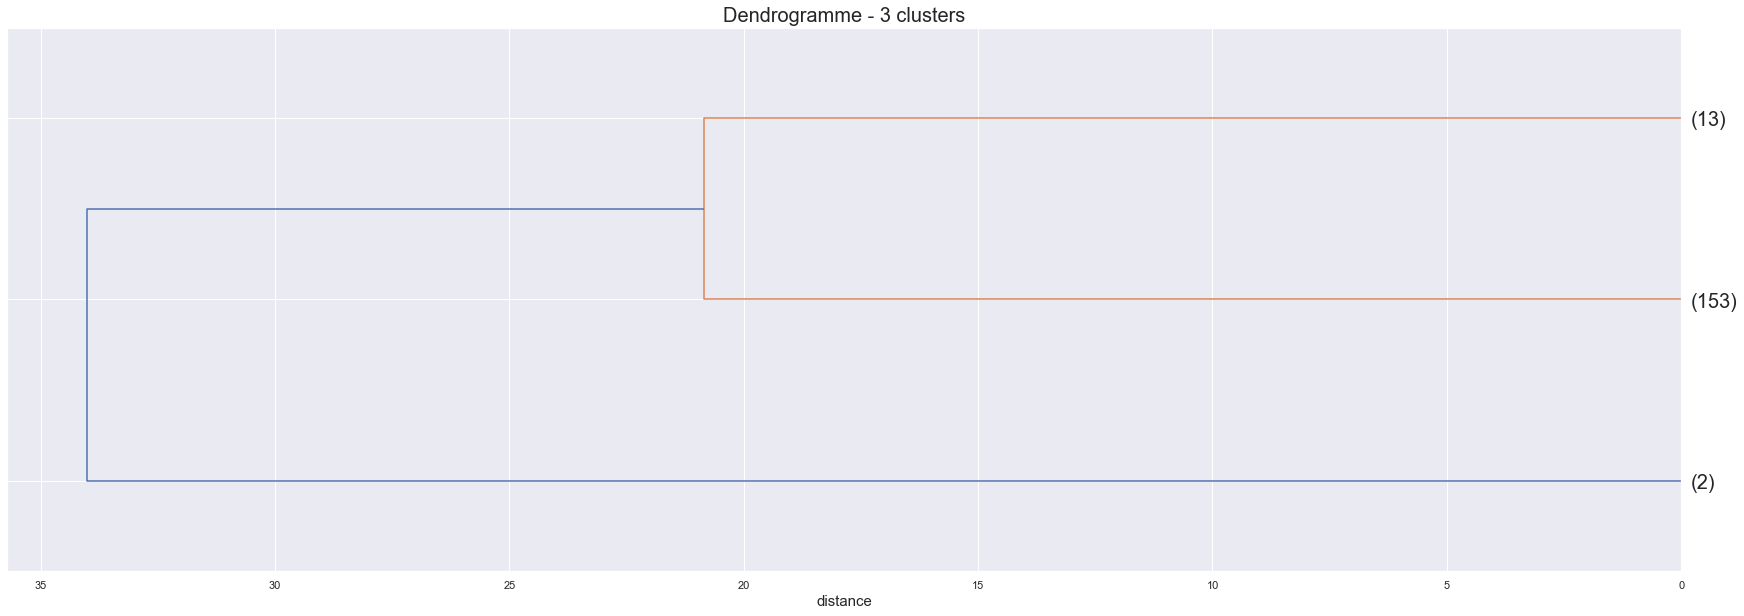

In [95]:
fig = plt.figure(figsize=(30,10))
plt.title('Dendrogramme - 3 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, p=3, truncate_mode='lastp', leaf_font_size=20, orientation='left')
plt.show()

* Pays par groupes pour un partitionnement en 5 clusters:

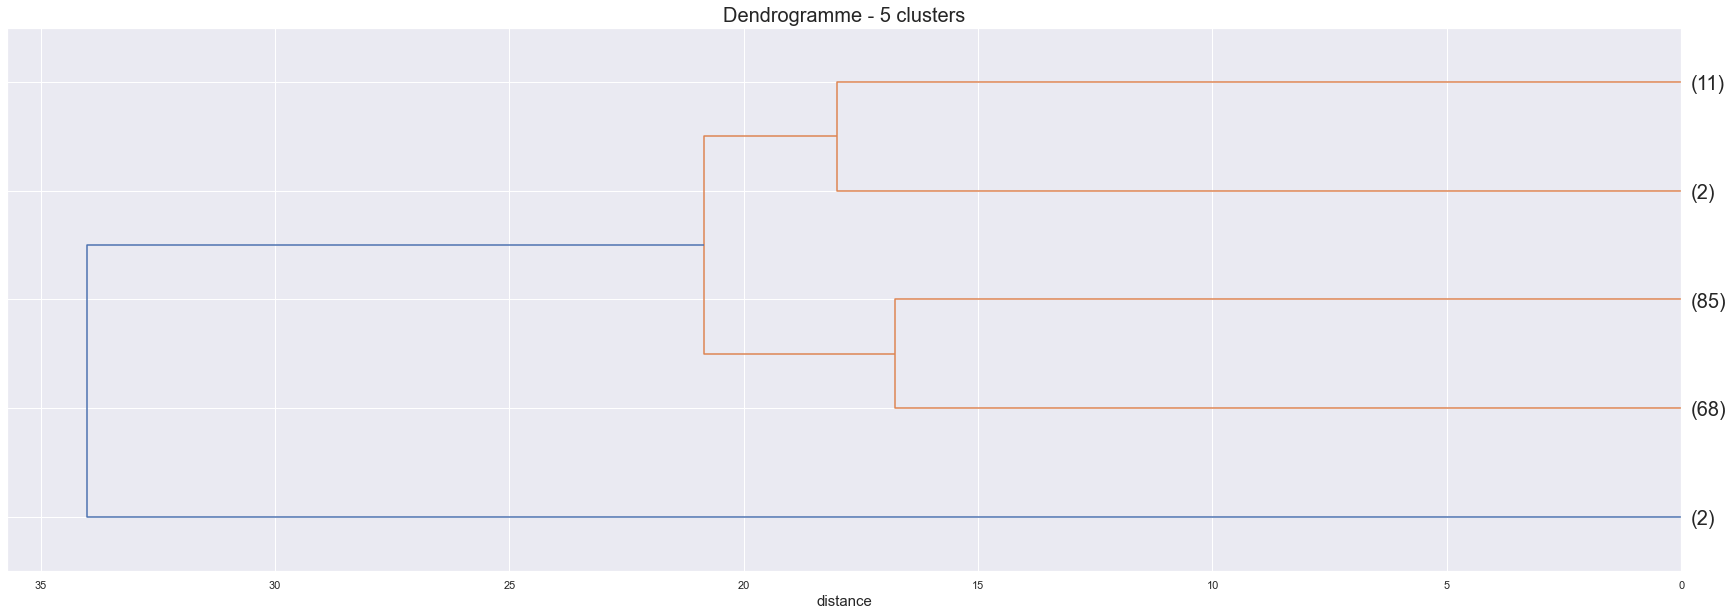

In [96]:
fig = plt.figure(figsize=(30,10))
plt.title('Dendrogramme - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, p=5, truncate_mode='lastp', leaf_font_size=20, orientation='left')
plt.show()

* Création de la colonne groupe pour 3 clusters:

In [97]:
#Identification des 3 groupes obtenus
cah_3groupes = fcluster(Z, 3, criterion='maxclust')
#Index trié des groupes
idg = np.argsort(cah_3groupes)
#Affichage des pays selon leurs groupes
df_cah_3groupes = pd.DataFrame(df_norm.index[idg], cah_3groupes[idg]).reset_index()
df_cah_3groupes = df_cah_3groupes.rename(columns={'index':'Groupe'})
df_cah_3 = pd.merge(df_norm, df_cah_3groupes, on='Pays')
df_cah_3.head()

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique,Groupe
0,Afghanistan,-0.279547,-0.328896,-0.166818,-0.291318,-1.197913,-0.233701,-0.284732,-0.047467,-0.261767,-3.012330,2
1,Afrique du Sud,0.377630,2.264583,-0.166818,0.648741,0.956748,-0.233701,0.639768,0.086752,-0.070765,-0.244572,3
2,Albanie,-0.285561,-0.280769,-0.166818,-0.295880,-0.262502,-0.233701,-0.288467,-0.263969,-0.264791,0.480317,2
3,Algérie,-0.180509,-0.473275,-0.166818,-0.190972,-0.891997,-0.233701,-0.187146,-0.014465,-0.182019,-0.947494,2
4,Allemagne,0.316283,4.018524,-0.166818,0.475872,-0.066337,5.189551,0.440860,0.252949,1.673979,0.710964,3


* Création de la colonne groupe pour 5 clusters:

In [98]:
#Identification des 5 groupes obtenus
cah_5groupes = fcluster(Z, 5, criterion='maxclust')
#Index trié des groupes
idg = np.argsort(cah_5groupes)
#Affichage des pays selon leurs groupes
df_cah_5groupes = pd.DataFrame(df_cah.index[idg], cah_5groupes[idg]).reset_index()
df_cah_5groupes = df_cah_5groupes.rename(columns={'index':'Groupe'})
df_cah_5 = pd.merge(df_norm, df_cah_5groupes, on='Pays')
df_cah_5.head()

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique,Groupe
0,Afghanistan,-0.279547,-0.328896,-0.166818,-0.291318,-1.197913,-0.233701,-0.284732,-0.047467,-0.261767,-3.012330,3
1,Afrique du Sud,0.377630,2.264583,-0.166818,0.648741,0.956748,-0.233701,0.639768,0.086752,-0.070765,-0.244572,5
2,Albanie,-0.285561,-0.280769,-0.166818,-0.295880,-0.262502,-0.233701,-0.288467,-0.263969,-0.264791,0.480317,2
3,Algérie,-0.180509,-0.473275,-0.166818,-0.190972,-0.891997,-0.233701,-0.187146,-0.014465,-0.182019,-0.947494,3
4,Allemagne,0.316283,4.018524,-0.166818,0.475872,-0.066337,5.189551,0.440860,0.252949,1.673979,0.710964,5


* Selection des 3 groupes correspondant au 3 clusters:

In [99]:
df_cah3_groupe1 = df_cah_3[df_cah_3['Groupe'] == 1]
df_cah3_groupe2 = df_cah_3[df_cah_3['Groupe'] == 2]
df_cah3_groupe3 = df_cah_3[df_cah_3['Groupe'] == 3]

In [100]:
print(df_cah3_groupe1['Pays'].unique())

['Chine, continentale' "États-Unis d'Amérique"]


In [101]:
print(df_cah3_groupe2['Pays'].unique())

['Afghanistan' 'Albanie' 'Algérie' 'Angola' 'Antigua-et-Barbuda'
 'Argentine' 'Arménie' 'Australie' 'Autriche' 'Azerbaïdjan' 'Bahamas'
 'Bangladesh' 'Barbade' 'Bélarus' 'Belgique' 'Belize' 'Bénin'
 'Bolivie (État plurinational de)' 'Bosnie-Herzégovine' 'Botswana'
 'Bulgarie' 'Burkina Faso' 'Cabo Verde' 'Cambodge' 'Cameroun' 'Canada'
 'Chili' 'Chine - RAS de Macao' 'Chine, Taiwan Province de' 'Chypre'
 'Colombie' 'Congo' 'Costa Rica' "Côte d'Ivoire" 'Croatie' 'Cuba'
 'Danemark' 'Dominique' 'Égypte' 'El Salvador' 'Équateur' 'Espagne'
 'Estonie' 'Eswatini' 'Éthiopie' 'Fédération de Russie' 'Fidji' 'Finlande'
 'Gabon' 'Gambie' 'Géorgie' 'Ghana' 'Grèce' 'Grenade' 'Guatemala' 'Guinée'
 'Guinée-Bissau' 'Guyana' 'Haïti' 'Honduras' 'Hongrie' 'Îles Salomon'
 "Iran (République islamique d')" 'Iraq' 'Irlande' 'Islande' 'Israël'
 'Italie' 'Jamaïque' 'Jordanie' 'Kazakhstan' 'Kenya' 'Kirghizistan'
 'Kiribati' 'Koweït' 'Lesotho' 'Lettonie' 'Liban' 'Libéria' 'Lituanie'
 'Luxembourg' 'Macédoine du Nord'

In [102]:
print(df_cah3_groupe3['Pays'].unique())

['Afrique du Sud' 'Allemagne' 'Arabie saoudite' 'Brésil'
 'Chine - RAS de Hong-Kong' 'Émirats arabes unis' 'France' 'Inde'
 'Indonésie' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


* Analyse des groupes pour 3 clusters:

In [103]:
df_cah_3.groupby('Groupe').mean()

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
Groupe,,,,,,,,,,
1,7.758541,1.053402,-0.166818,7.990192,0.850466,1.032807,8.004946,5.374514,8.111975,0.123364
2,-0.165931,-0.229742,-0.108609,-0.175157,-0.057434,-0.156653,-0.173211,-0.147949,-0.163740,-0.017155
3,0.759253,2.541825,1.303906,0.832206,0.545107,1.684796,0.807032,0.914401,0.679098,0.182927


Nous allons ajouter une valeur à ce tableau pour nous aider dans notre choix.

* Calcul du taux de dépendance à l'importation pour les troix groupes:

In [104]:
Tdi_gr1 = 287500.000000 / (2.007500e+07 + 287500.0 - 0) *100
Tdi_gr2 = 47542.483660 / (3.113595e+05 + 47542.483660 - 712.418301) *100
Tdi_gr3 = 565846.153846 / (2.618769e+06 + 565846.153846 - 18000.0 ) *100
print(f"Tdi_gr1 = {round(Tdi_gr1,2)}%")
print(f"Tdi_gr2 = {round(Tdi_gr2,2)}%")
print(f"Tdi_gr3 = {round(Tdi_gr3,2)}%")

Tdi_gr1 = 1.41%
Tdi_gr2 = 13.27%
Tdi_gr3 = 17.87%


Selon le site de la FAO, ce calcul permet d'obtenir un résultat qui indique un taux de dépendance à l'importation. Cela nous permettra d'écarter les pays les plus indépendants et donc ayant le moins besoin d'importer du poulet.

* Analyse et choix du cluster pour la selection des pays les plus interessants pour exporter:

    Groupe 1: La production est la plus élevé des trois groupes et en terme de quantité d'importation nous sommes ici en deuxieme place. On aurait pu choisir ce groupe car tous les indicateurs interessants sont élevés mais le taux de dépendance à l'importation est le plus faible des trois.
    
    Groupe 2: C'est le groupe qui importe le moins, qui consomme le moins et qui a une stabilité politique la plus faible des trois.
    
    Groupe 3: C'est le plus gros importateur avec un taux de dépendance à l'importation le plus élévé. La quantité de traitement est la plus élévé, ce qui nous laisse imaginer qu'ils ont besoin de beaucoup de poulets en matiere premiere pour transformer en d'autres aliments recomposés ou autres.
    

Le troisième cluster est donc celui au meilleur potentiel.

* Liste des pays aux meilleurs potentiels:

In [105]:
Groupe_stab_pol_positive = df_cah3_groupe3.sort_values(by=['Stabilité_politique'], ascending=False).head(7)
Groupe_stab_pol_positive['Tdi'] = Groupe_stab_pol_positive['Importations'] / (Groupe_stab_pol_positive['Production']+Groupe_stab_pol_positive['Importations']-Groupe_stab_pol_positive['Exportations'])*100
Groupe_stab_pol_positive.sort_values(by=['Tdi'], ascending=False)

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique,Groupe,Tdi
46,Émirats arabes unis,-0.271528,1.831446,-0.166818,-0.129396,1.447476,-0.233701,-0.118042,-0.221183,-0.068128,0.743913,3,106.064012
31,Chine - RAS de Hong-Kong,-0.281151,4.366104,-0.166818,-0.189604,2.080755,-0.233701,-0.127847,-0.235314,-0.091856,0.974560,3,102.689058
120,Pays-Bas,0.150284,2.767237,-0.166818,-0.147641,-0.012092,3.143654,-0.148858,-0.172363,0.168090,1.073408,3,89.718945
4,Allemagne,0.316283,4.018524,-0.166818,0.475872,-0.066337,5.189551,0.440860,0.252949,1.673979,0.710964,3,89.268298
80,Japon,0.597357,5.232379,-0.166818,0.784208,-0.127521,-0.233701,0.791049,0.543529,2.327797,1.282089,3,87.256425
133,Royaume-Uni de Grande-Bretagne et d'Irlande du...,0.436571,3.681639,-0.166818,0.701651,0.720215,3.078705,0.684592,0.149720,1.151980,0.425402,3,85.918657
56,France,0.410910,2.221804,-0.166818,0.400157,0.150012,2.656535,0.382962,0.137506,1.099253,0.370486,3,79.363410


Nous avons retiré de la liste tous les pays ayant une stabilité politique inferieure à 0. Puis nous avons créé la colonne du taux de dépendance à l'importation et avons fait un classement des pays les plus dépendants.

* Selection des 5 groupes correspondant au 5 clusters:

In [106]:
df_cah5_groupe1 = df_cah_5[df_cah_5['Groupe'] == 1]
df_cah5_groupe2 = df_cah_5[df_cah_5['Groupe'] == 2]
df_cah5_groupe3 = df_cah_5[df_cah_5['Groupe'] == 3]
df_cah5_groupe4 = df_cah_5[df_cah_5['Groupe'] == 4]
df_cah5_groupe5 = df_cah_5[df_cah_5['Groupe'] == 5]

In [107]:
print(df_cah5_groupe1['Pays'].unique())

['Chine, continentale' "États-Unis d'Amérique"]


In [108]:
print(df_cah5_groupe2['Pays'].unique())

['Albanie' 'Angola' 'Antigua-et-Barbuda' 'Argentine' 'Australie'
 'Autriche' 'Bahamas' 'Barbade' 'Bélarus' 'Belgique' 'Belize'
 'Bolivie (État plurinational de)' 'Bulgarie' 'Cabo Verde' 'Canada'
 'Chili' 'Chine - RAS de Macao' 'Chine, Taiwan Province de' 'Chypre'
 'Costa Rica' 'Cuba' 'Danemark' 'Dominique' 'Espagne' 'Estonie' 'Fidji'
 'Finlande' 'Gabon' 'Ghana' 'Grenade' 'Guyana' 'Hongrie' 'Irlande'
 'Islande' 'Israël' 'Italie' 'Jamaïque' 'Kazakhstan' 'Kiribati' 'Koweït'
 'Lettonie' 'Lituanie' 'Luxembourg' 'Malaisie' 'Malte' 'Maurice' 'Norvège'
 'Nouvelle-Calédonie' 'Nouvelle-Zélande' 'Oman' 'Panama' 'Pologne'
 'Polynésie française' 'Portugal' 'République de Corée'
 'République dominicaine' 'Roumanie' 'Sainte-Lucie' 'Saint-Kitts-et-Nevis'
 'Saint-Vincent-et-les Grenadines' 'Samoa' 'Slovénie' 'Suède' 'Suisse'
 'Suriname' 'Tchéquie' 'Trinité-et-Tobago' 'Viet Nam']


In [109]:
print(df_cah5_groupe3['Pays'].unique())

['Afghanistan' 'Algérie' 'Arménie' 'Azerbaïdjan' 'Bangladesh' 'Bénin'
 'Bosnie-Herzégovine' 'Botswana' 'Burkina Faso' 'Cambodge' 'Cameroun'
 'Colombie' 'Congo' "Côte d'Ivoire" 'Croatie' 'Égypte' 'El Salvador'
 'Équateur' 'Eswatini' 'Éthiopie' 'Fédération de Russie' 'Gambie'
 'Géorgie' 'Grèce' 'Guatemala' 'Guinée' 'Guinée-Bissau' 'Haïti' 'Honduras'
 'Îles Salomon' "Iran (République islamique d')" 'Iraq' 'Jordanie' 'Kenya'
 'Kirghizistan' 'Lesotho' 'Liban' 'Libéria' 'Macédoine du Nord'
 'Madagascar' 'Malawi' 'Mali' 'Maroc' 'Mauritanie' 'Mongolie' 'Monténégro'
 'Mozambique' 'Myanmar' 'Namibie' 'Népal' 'Nicaragua' 'Niger' 'Nigéria'
 'Ouganda' 'Pakistan' 'Paraguay' 'Pérou' 'Philippines'
 'République centrafricaine' 'République de Moldova'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Rwanda' 'Sao Tomé-et-Principe' 'Sénégal'
 'Serbie' 'Sierra Leone' 'Slovaquie' 'Soudan' 'Sri Lanka' 'Tadjikistan'
 'Tchad' 'Thaïlande' 'Timor-Leste' 'Togo' 'Tunisie' 'Turkménistan

In [110]:
print(df_cah5_groupe4['Pays'].unique())

['Arabie saoudite' 'Inde']


In [111]:
print(df_cah5_groupe5['Pays'].unique())

['Afrique du Sud' 'Allemagne' 'Brésil' 'Chine - RAS de Hong-Kong'
 'Émirats arabes unis' 'France' 'Indonésie' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


* Analyse des groupes pour 5 clusters:

In [112]:
df_cah_5.groupby('Groupe').mean()

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
Groupe,,,,,,,,,,
1,7.758541,1.053402,-0.166818,7.990192,0.850466,1.032807,8.004946,5.374514,8.111975,0.123364
2,-0.165220,-0.130414,-0.153601,-0.178443,0.698963,-0.110011,-0.175843,-0.209837,-0.105575,0.729054
3,-0.166499,-0.309205,-0.072615,-0.172529,-0.662551,-0.193967,-0.171105,-0.098439,-0.210272,-0.614123
4,0.543428,1.446434,8.534966,0.844872,0.143073,-0.233701,0.716809,4.161736,0.608626,-0.672915
5,0.798494,2.740986,-0.010832,0.829903,0.618204,2.033614,0.823437,0.323976,0.691911,0.338535


En comparaison, nous avons ici le groupe 5 des 5 clusters identique au groupe 3 des 3 clusters hormis l'Arabie saoudite et l'Inde que nous avons decidé d'écarter pour les 3 clusters. Il est donc plus interessant de garder les 5 clusters pour etre plus précis dans les critères de selection et éliminer les pays ne repondant pas aux critères de selection.

De plus on peut voir que dans le partitionnement en 3 clusters, un des groupes est beaucoup trop gros:

In [113]:
print(df_cah_3.groupby(df_cah_3["Groupe"]).size())

Groupe
1      2
2    153
3     13
dtype: int64


In [114]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_norm)

array([2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

* Représentation graphique des 3 clusters avec la Cah:

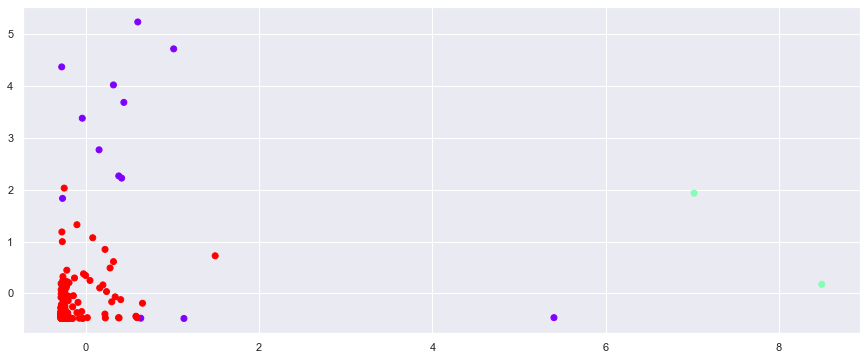

In [115]:
plt.figure(figsize=(15, 6))
X_cah = df_norm.values
plt.scatter(X_cah[:,0], X_cah[:,1], c=cluster.labels_, cmap='rainbow')

* Voyons ce que l'on observe pour les 5 clusters:

In [116]:
print(df_cah_5.groupby(df_cah_5["Groupe"]).size())

Groupe
1     2
2    68
3    85
4     2
5    11
dtype: int64


In [117]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_norm)

array([2, 0, 4, 2, 0, 4, 4, 1, 4, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2,
       2, 0, 4, 2, 4, 2, 2, 4, 4, 0, 4, 3, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4,
       2, 2, 0, 2, 4, 4, 2, 3, 2, 2, 4, 4, 0, 4, 2, 2, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 1, 0, 2, 2, 4, 4, 4, 4, 4, 0, 2, 4, 2, 2, 4, 4, 2,
       4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 2, 2, 4, 2, 0, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 0, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2], dtype=int64)

* Représentation graphique des 5 clusters avec la Cah:

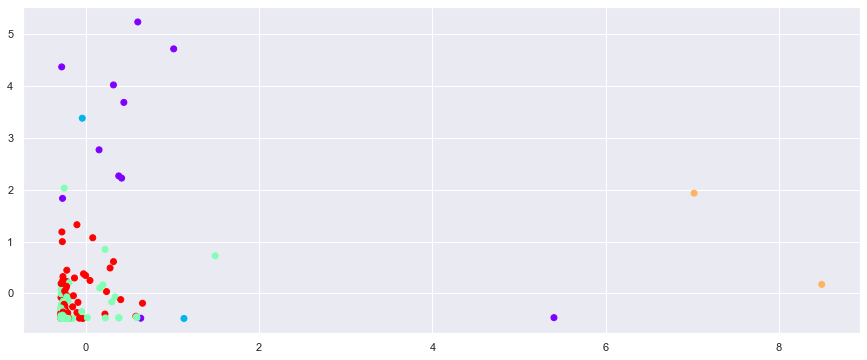

In [118]:
plt.figure(figsize=(15, 6))
plt.scatter(X_cah[:,0], X_cah[:,1], c=cluster.labels_, cmap='rainbow')

* Observons à l'aide de la matrice de corrélation si notre choix est justifié:

In [119]:
test_corr = df_cah_5.groupby('Groupe').mean()

In [120]:
test_corr = test_corr.drop([test_corr.index[0]])
test_corr

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
Groupe,,,,,,,,,,
2,-0.165220,-0.130414,-0.153601,-0.178443,0.698963,-0.110011,-0.175843,-0.209837,-0.105575,0.729054
3,-0.166499,-0.309205,-0.072615,-0.172529,-0.662551,-0.193967,-0.171105,-0.098439,-0.210272,-0.614123
4,0.543428,1.446434,8.534966,0.844872,0.143073,-0.233701,0.716809,4.161736,0.608626,-0.672915
5,0.798494,2.740986,-0.010832,0.829903,0.618204,2.033614,0.823437,0.323976,0.691911,0.338535


Nous avons supprimer le premier groupe car celui ci ne nous interesse pas, en effet nous avons deja estimé que ces deux pays n'etaient pas du tout dépendant de l'importation. 

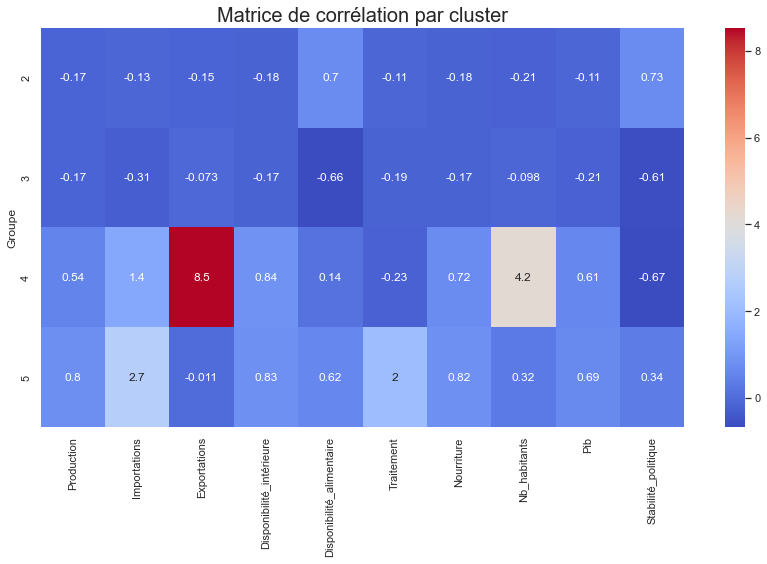

In [249]:
plt.figure(figsize=(12,8))
sns.heatmap(test_corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation par cluster', fontsize=20)
plt.tight_layout()
plt.show()

On voit bien que les deux derniers groupes se différencient des autres. Nous avons privilégié le dernier car il a un taux d'importation plus grand et un indice de stabilité politique positif. Donc le choix que nous avons effectué est ici justifié.

Voici donc les pays séléctionnés:
    
    Émirats arabes unis
    Chine - RAS de Hong-Kong
    Pays-Bas
    Allemagne
    Japon 
    Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
    France

Cette selection a été faite sur une liste de pays ayant un indice de stabilité politique positif. Mais un pays ayant une stabilité politique négative peut etre bien plus interréssant que d'autres sur le plan commercial. La decision final de la liste des pays les plus interréssants peut etre modifié selon les critères que l'on s'imposera.

### K-MEANS

*Nous allons effectuer un partionnement à l'aide de la méthode KMeans.*

* Importation des bibliothèques:

In [122]:
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn import cluster, metrics

Nous allons essayer de trouver quel serait le nombre de clusters optimales pour la suite de l'analyse.

* Calcul du coéfficient de silhouette pour chaque clusters:

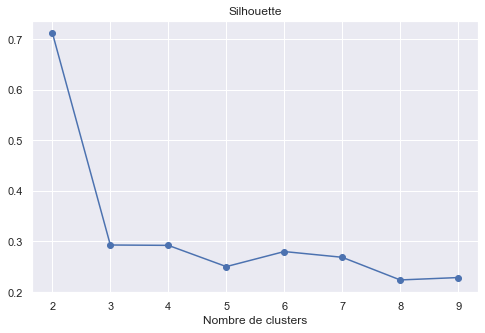

In [123]:
plt.figure(figsize=(8,5))
silhouettes = []
for num_clusters in range (2, 10):
    cls = cluster.KMeans(n_clusters=num_clusters,
                         n_init=1, init='random')
    cls.fit(df_norm)
    silh = metrics.silhouette_score(df_norm, cls.labels_)
    silhouettes.append(silh)
plt.title("Silhouette")
plt.xlabel("Nombre de clusters")
plt.plot(range(2, 10), silhouettes, marker='o')

Le coefficient de silhouette decroit avec le nombre de clusters et ce graphique nous indique qu'il faudrait privilégier 2 ou 3 clusters, qui correspondent aux valeurs pour lesquelles le coéfficient de silhouette est le plus élevé.

* La méthode Elbow:

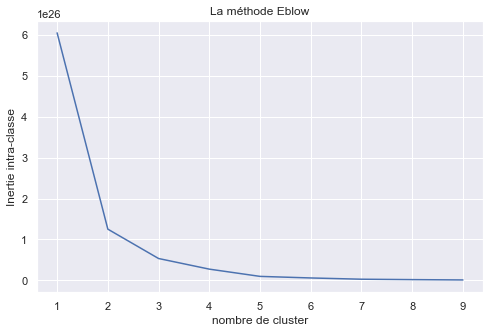

In [124]:
#Détermination de la valeur optimale de K
tab=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_cah)
    tab.append(kmeans.inertia_)
plt.figure(figsize = (8, 5))
plt.plot(range(1,10),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()

On observe sur le graphique que la variance ne se réduit plus significativement à partir de 2 clusters. En effet, la “chute” de la courbe de variance  (distortion) entre 2 et 3 clusters est significativement plus grande que les autres.

Nous allons comparer les résultats pour voir quel nombre de clusters sera le plus optimal.

In [125]:
#Clustering K-Means en 2 clusters
cls2 = cluster.KMeans(n_clusters=2, random_state=0)
cls2.fit(df_norm)
pd.Series(cls2.labels_).value_counts()

0    166
1      2
dtype: int64

In [126]:
#Clustering K-Means en 3 clusters
cls3 = cluster.KMeans(n_clusters=3, random_state=0)
cls3.fit(df_norm)
pd.Series(cls3.labels_).value_counts()

1    154
0     12
2      2
dtype: int64

In [127]:
#Clustering K-Means en 4 clusters
cls4 = cluster.KMeans(n_clusters=4, random_state=0)
cls4.fit(df_norm)
pd.Series(cls4.labels_).value_counts()

0    78
2    76
3    12
1     2
dtype: int64

In [128]:
#Clustering K-Means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5,random_state=0)
cls5.fit(df_norm)
pd.Series(cls5.labels_).value_counts()

4    77
0    76
2    12
3     2
1     1
dtype: int64

In [129]:
#Clustering K-Means en 6 clusters
cls6 = cluster.KMeans(n_clusters=6,random_state=0)
cls6.fit(df_norm)
pd.Series(cls6.labels_).value_counts()

1    79
0    74
2    10
4     2
3     2
5     1
dtype: int64

On remarque qu'à partir du partitionnement en 3 clusters certains groupes restent identiques et à partir de 6 clusters le groupe de 12 pays en perd 2.

Nous allons donc continuer l'analyse avec 2, 3 et 5 clusters. Pour éviter de faire plusieurs analyses identiques (entre 4 et 5 clusters il n'y a pratiquement aucunes différences), nous choisirons donc de faire l'analyse en 5 plutot que 4 clusters.

* Mise en place des groupes de pays par clusters:

In [130]:
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans2 = cls2.labels_
clusters_kmeans3 = cls3.labels_
clusters_kmeans5 = cls5.labels_

In [131]:
#Identification des 02 groupes obtenus
groupes_kmeans2 = clusters_kmeans2
#Index trié des groupes
idg = np.argsort(groupes_kmeans2)
#Affichage des pays selon leurs groupes
df_kmeans2 = pd.DataFrame(df_norm.index[idg], groupes_kmeans2[idg]).reset_index()
df_kmeans2 = df_kmeans2.rename(columns={'index':'Groupe'})

#Identification des 03 groupes obtenus
groupes_kmeans3 = clusters_kmeans3
#Index trié des groupes
idg = np.argsort(groupes_kmeans3)
#Affichage des pays selon leurs groupes
df_kmeans3 = pd.DataFrame(df_norm.index[idg], groupes_kmeans3[idg]).reset_index()
df_kmeans3 = df_kmeans3.rename(columns={'index':'Groupe'})

#Identification des 5 groupes obtenus
groupes_kmeans5 = clusters_kmeans5
#Index trié des groupes
idg = np.argsort(groupes_kmeans5)
#Affichage des pays selon leurs groupes
df_kmeans5 = pd.DataFrame(df_norm.index[idg], groupes_kmeans5[idg]).reset_index()
df_kmeans5 = df_kmeans5.rename(columns={'index':'Groupe'})

* Création des listes de pays pour 2 clusters:

In [132]:
df_groupes_kmeans2 = pd.merge(df_norm, df_kmeans2, on='Pays')
df_groupe0_Kmeans2 = df_groupes_kmeans2[df_groupes_kmeans2['Groupe'] == 0]
df_groupe1_Kmeans2 = df_groupes_kmeans2[df_groupes_kmeans2['Groupe'] == 1]

In [133]:
print(df_groupe0_Kmeans2['Pays'].unique())


['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Angola'
 'Antigua-et-Barbuda' 'Arabie saoudite' 'Argentine' 'Arménie' 'Australie'
 'Autriche' 'Azerbaïdjan' 'Bahamas' 'Bangladesh' 'Barbade' 'Bélarus'
 'Belgique' 'Belize' 'Bénin' 'Bolivie (État plurinational de)'
 'Bosnie-Herzégovine' 'Botswana' 'Brésil' 'Bulgarie' 'Burkina Faso'
 'Cabo Verde' 'Cambodge' 'Cameroun' 'Canada' 'Chili'
 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao'
 'Chine, Taiwan Province de' 'Chypre' 'Colombie' 'Congo' 'Costa Rica'
 "Côte d'Ivoire" 'Croatie' 'Cuba' 'Danemark' 'Dominique' 'Égypte'
 'El Salvador' 'Émirats arabes unis' 'Équateur' 'Espagne' 'Estonie'
 'Eswatini' 'Éthiopie' 'Fédération de Russie' 'Fidji' 'Finlande' 'France'
 'Gabon' 'Gambie' 'Géorgie' 'Ghana' 'Grèce' 'Grenade' 'Guatemala' 'Guinée'
 'Guinée-Bissau' 'Guyana' 'Haïti' 'Honduras' 'Hongrie' 'Îles Salomon'
 'Inde' 'Indonésie' "Iran (République islamique d')" 'Iraq' 'Irlande'
 'Islande' 'Israël' 'Italie' 'Jamaïque' 'Japon' 'Jordani

In [134]:
print(df_groupe1_Kmeans2['Pays'].unique())

['Chine, continentale' "États-Unis d'Amérique"]


* Analyse des groupes pour 2 clusters:

In [135]:
df_groupes_kmeans2.groupby('Groupe').mean()

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
Groupe,,,,,,,,,,
0,-0.093476,-0.012692,0.002010,-0.096267,-0.010247,-0.012443,-0.096445,-0.064753,-0.097735,-0.001486
1,7.758541,1.053402,-0.166818,7.990192,0.850466,1.032807,8.004946,5.374514,8.111975,0.123364


On ne peut réaliser d'analyse en deux clusters, en effet on peut voir qu'il n'y a aucun groupe repondant aux attentes.

* Création des listes de pays pour 3 clusters:

In [136]:
df_groupes_kmeans3 = pd.merge(df_norm, df_kmeans3, on='Pays')
df_groupe0_Kmeans3 = df_groupes_kmeans3[df_groupes_kmeans3['Groupe'] == 0]
df_groupe1_Kmeans3 = df_groupes_kmeans3[df_groupes_kmeans3['Groupe'] == 1]
df_groupe2_Kmeans3 = df_groupes_kmeans3[df_groupes_kmeans3['Groupe'] == 2]

In [137]:
print(df_groupe0_Kmeans3['Pays'].unique())

['Allemagne' 'Arabie saoudite' 'Brésil' 'Chine - RAS de Hong-Kong'
 'Fédération de Russie' 'France' 'Inde' 'Indonésie' 'Japon' 'Mexique'
 'Pays-Bas' "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [138]:
print(df_groupe1_Kmeans3['Pays'].unique())

['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Angola'
 'Antigua-et-Barbuda' 'Argentine' 'Arménie' 'Australie' 'Autriche'
 'Azerbaïdjan' 'Bahamas' 'Bangladesh' 'Barbade' 'Bélarus' 'Belgique'
 'Belize' 'Bénin' 'Bolivie (État plurinational de)' 'Bosnie-Herzégovine'
 'Botswana' 'Bulgarie' 'Burkina Faso' 'Cabo Verde' 'Cambodge' 'Cameroun'
 'Canada' 'Chili' 'Chine - RAS de Macao' 'Chine, Taiwan Province de'
 'Chypre' 'Colombie' 'Congo' 'Costa Rica' "Côte d'Ivoire" 'Croatie' 'Cuba'
 'Danemark' 'Dominique' 'Égypte' 'El Salvador' 'Émirats arabes unis'
 'Équateur' 'Espagne' 'Estonie' 'Eswatini' 'Éthiopie' 'Fidji' 'Finlande'
 'Gabon' 'Gambie' 'Géorgie' 'Ghana' 'Grèce' 'Grenade' 'Guatemala' 'Guinée'
 'Guinée-Bissau' 'Guyana' 'Haïti' 'Honduras' 'Hongrie' 'Îles Salomon'
 "Iran (République islamique d')" 'Iraq' 'Irlande' 'Islande' 'Israël'
 'Italie' 'Jamaïque' 'Jordanie' 'Kazakhstan' 'Kenya' 'Kirghizistan'
 'Kiribati' 'Koweït' 'Lesotho' 'Lettonie' 'Liban' 'Libéria' 'Lituanie'
 'Luxembourg' 'Ma

In [139]:
print(df_groupe2_Kmeans3['Pays'].unique())

['Chine, continentale' "États-Unis d'Amérique"]


* Analyse des groupes pour 3 clusters:

In [140]:
df_groupes_kmeans3.groupby('Groupe').mean()

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
Groupe,,,,,,,,,,
0,0.937941,2.472686,1.426466,1.005008,0.445153,1.990807,0.980385,1.056832,0.793610,0.103229
1,-0.173847,-0.206357,-0.108987,-0.182081,-0.045732,-0.168541,-0.180354,-0.152149,-0.167190,-0.009646
2,7.758541,1.053402,-0.166818,7.990192,0.850466,1.032807,8.004946,5.374514,8.111975,0.123364


Pour les memes critères que pour le cah on choisira ici le groupe 0 qui semble etre le plus proche de nos attentes.

En comparaison avec le groupe selectionné dans la cah, on remarque qu'il y a pratiquement les meme pays. Les seules différences sont:  

    Les pays absents: l'Afrique du Sud, les Émirats arabes unis
    Les nouveaux pays: l'Arabie saoudite, la Fédération de Russie


Voici donc les pays que l'on gagne:

In [141]:
df_groupes_kmeans3.loc[(df_groupes_kmeans3['Pays']=='Arabie saoudite') | (df_groupes_kmeans3['Pays']=='Fédération de Russie')]

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique,Groupe
7,Arabie saoudite,-0.043781,3.376838,7.758750,0.337213,1.440538,-0.233701,0.359616,-0.068170,0.091635,-0.574067,0
53,Fédération de Russie,1.491102,0.724538,-0.166818,1.760757,0.659662,1.519926,1.794925,0.660342,0.556162,-0.639966,0


Et voici les pays que l'on perd:

In [142]:
df_groupes_kmeans3.loc[(df_groupes_kmeans3['Pays']=='Afrique du Sud') | (df_groupes_kmeans3['Pays']=='Émirats arabes unis')]

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique,Groupe
1,Afrique du Sud,0.377630,2.264583,-0.166818,0.648741,0.956748,-0.233701,0.639768,0.086752,-0.070765,-0.244572,1
46,Émirats arabes unis,-0.271528,1.831446,-0.166818,-0.129396,1.447476,-0.233701,-0.118042,-0.221183,-0.068128,0.743913,1


Les pays gagnés ne repondent pas aux critères de selection donc aucun avantage de ce coté. Par contre sur les pays perdus, nous passons à cotés d'un très fort potentiel client qui se trouve aux Émirats arabes unis.  

* Test de corrélation Kmeans:

In [143]:
df_groupes_kmeans3.groupby('Groupe').mean()

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
Groupe,,,,,,,,,,
0,0.937941,2.472686,1.426466,1.005008,0.445153,1.990807,0.980385,1.056832,0.793610,0.103229
1,-0.173847,-0.206357,-0.108987,-0.182081,-0.045732,-0.168541,-0.180354,-0.152149,-0.167190,-0.009646
2,7.758541,1.053402,-0.166818,7.990192,0.850466,1.032807,8.004946,5.374514,8.111975,0.123364


Pour le test nous supprimons le groupe qui contient deux pays ne correspondant pas aux critères et pouvant perturbés l'analyse.

In [144]:
test_corr_kmeans = df_groupes_kmeans3.groupby('Groupe').mean()

In [145]:
test_corr_kmeans = test_corr_kmeans.drop([test_corr_kmeans.index[2]])
test_corr_kmeans

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
Groupe,,,,,,,,,,
0,0.937941,2.472686,1.426466,1.005008,0.445153,1.990807,0.980385,1.056832,0.79361,0.103229
1,-0.173847,-0.206357,-0.108987,-0.182081,-0.045732,-0.168541,-0.180354,-0.152149,-0.16719,-0.009646


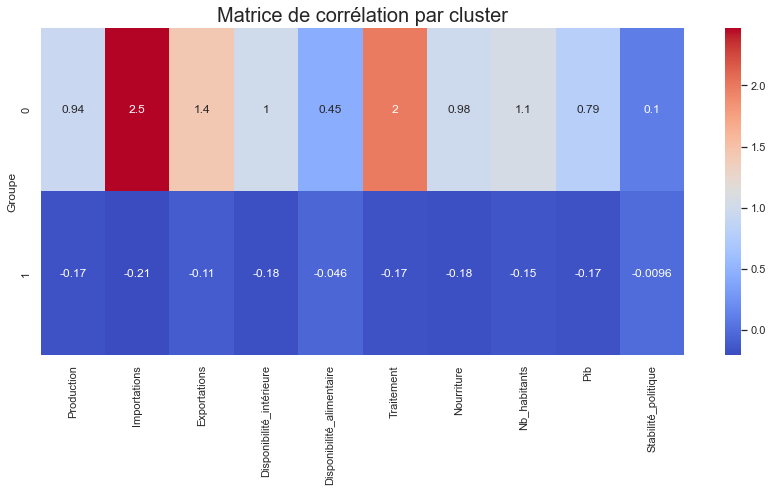

In [146]:
plt.figure(figsize=(12,7))
sns.heatmap(test_corr_kmeans, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation par cluster', fontsize=20)
plt.tight_layout()
plt.show()

Le choix que nous avons effectué sur le groupe 0 est ici justifié, en effet il est loin devant sur tous les critères.

* Création des listes de pays pour 5 clusters:

In [147]:
df_groupes_kmeans5 = pd.merge(df_norm, df_kmeans5, on='Pays')
df_groupe0_Kmeans5 = df_groupes_kmeans5[df_groupes_kmeans5['Groupe'] == 0]
df_groupe1_Kmeans5 = df_groupes_kmeans5[df_groupes_kmeans5['Groupe'] == 1]
df_groupe2_Kmeans5 = df_groupes_kmeans5[df_groupes_kmeans5['Groupe'] == 2]
df_groupe3_Kmeans5 = df_groupes_kmeans5[df_groupes_kmeans5['Groupe'] == 3]
df_groupe4_Kmeans5 = df_groupes_kmeans5[df_groupes_kmeans5['Groupe'] == 4]

In [148]:
print(df_groupe0_Kmeans5['Pays'].unique())

['Albanie' 'Antigua-et-Barbuda' 'Argentine' 'Australie' 'Autriche'
 'Bahamas' 'Barbade' 'Bélarus' 'Belgique' 'Belize'
 'Bolivie (État plurinational de)' 'Botswana' 'Bulgarie' 'Cabo Verde'
 'Canada' 'Chili' 'Chine - RAS de Macao' 'Chine, Taiwan Province de'
 'Chypre' 'Costa Rica' 'Croatie' 'Cuba' 'Danemark' 'Dominique'
 'Émirats arabes unis' 'Espagne' 'Estonie' 'Fidji' 'Finlande' 'Gabon'
 'Grenade' 'Guyana' 'Hongrie' 'Irlande' 'Islande' 'Israël' 'Italie'
 'Jamaïque' 'Kazakhstan' 'Kirghizistan' 'Kiribati' 'Koweït' 'Lettonie'
 'Lituanie' 'Luxembourg' 'Malaisie' 'Malte' 'Maurice' 'Mongolie' 'Namibie'
 'Nicaragua' 'Norvège' 'Nouvelle-Calédonie' 'Nouvelle-Zélande' 'Oman'
 'Panama' 'Pologne' 'Polynésie française' 'Portugal' 'République de Corée'
 'République dominicaine' 'Roumanie' 'Sainte-Lucie' 'Saint-Kitts-et-Nevis'
 'Saint-Vincent-et-les Grenadines' 'Samoa' 'Slovaquie' 'Slovénie' 'Suède'
 'Suisse' 'Suriname' 'Tchéquie' 'Trinité-et-Tobago' 'Uruguay' 'Vanuatu'
 'Viet Nam']


In [149]:
print(df_groupe1_Kmeans5['Pays'].unique())

['Inde']


In [150]:
print(df_groupe2_Kmeans5['Pays'].unique())

['Afrique du Sud' 'Allemagne' 'Arabie saoudite' 'Brésil'
 'Chine - RAS de Hong-Kong' 'Fédération de Russie' 'France' 'Indonésie'
 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [151]:
print(df_groupe3_Kmeans5['Pays'].unique())

['Chine, continentale' "États-Unis d'Amérique"]


In [152]:
print(df_groupe4_Kmeans5['Pays'].unique())

['Afghanistan' 'Algérie' 'Angola' 'Arménie' 'Azerbaïdjan' 'Bangladesh'
 'Bénin' 'Bosnie-Herzégovine' 'Burkina Faso' 'Cambodge' 'Cameroun'
 'Colombie' 'Congo' "Côte d'Ivoire" 'Égypte' 'El Salvador' 'Équateur'
 'Eswatini' 'Éthiopie' 'Gambie' 'Géorgie' 'Ghana' 'Grèce' 'Guatemala'
 'Guinée' 'Guinée-Bissau' 'Haïti' 'Honduras' 'Îles Salomon'
 "Iran (République islamique d')" 'Iraq' 'Jordanie' 'Kenya' 'Lesotho'
 'Liban' 'Libéria' 'Macédoine du Nord' 'Madagascar' 'Malawi' 'Mali'
 'Maroc' 'Mauritanie' 'Monténégro' 'Mozambique' 'Myanmar' 'Népal' 'Niger'
 'Nigéria' 'Ouganda' 'Pakistan' 'Paraguay' 'Pérou' 'Philippines'
 'République centrafricaine' 'République de Moldova'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Rwanda' 'Sao Tomé-et-Principe' 'Sénégal'
 'Serbie' 'Sierra Leone' 'Soudan' 'Sri Lanka' 'Tadjikistan' 'Tchad'
 'Thaïlande' 'Timor-Leste' 'Togo' 'Tunisie' 'Turkménistan' 'Turquie'
 'Ukraine' 'Venezuela (République bolivarienne du)' 'Yémen' 'Zambie'
 'Zimba

* Analyse des groupes pour 5 clusters:

In [153]:
df_groupes_kmeans5.groupby('Groupe').mean()

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
Groupe,,,,,,,,,,
0,-0.176969,-0.155528,-0.154992,-0.191554,0.583332,-0.120894,-0.188522,-0.218850,-0.119343,0.767036
1,1.130637,-0.483970,9.311181,1.352532,-1.154391,-0.233701,1.074002,8.391641,1.125616,-0.771764
2,0.875191,2.701732,0.636633,0.946358,0.621081,1.990807,0.944199,0.364758,0.693912,0.147161
3,7.758541,1.053402,-0.166818,7.990192,0.850466,1.032807,8.004946,5.374514,8.111975,0.123364
4,-0.177927,-0.288617,-0.062828,-0.183520,-0.679646,-0.214722,-0.182943,-0.089418,-0.215668,-0.773190


Pour les memes critères que pour le cah on choisira ici le groupe 2 qui semble etre le plus proche de nos attentes.

En comparaison avec les 3 clusters on a ici l'Afrique du Sud qui s'est ajouté à la liste. Pour des raisons de critères politiques nous avons deja retiré ce pays donc les 3 clusters sont suffisants et plus précis dans notre choix.

* Représentation graphique des 3 clusters avec Kmeans:

In [154]:
X_kmeans=df_norm.values
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X_kmeans)

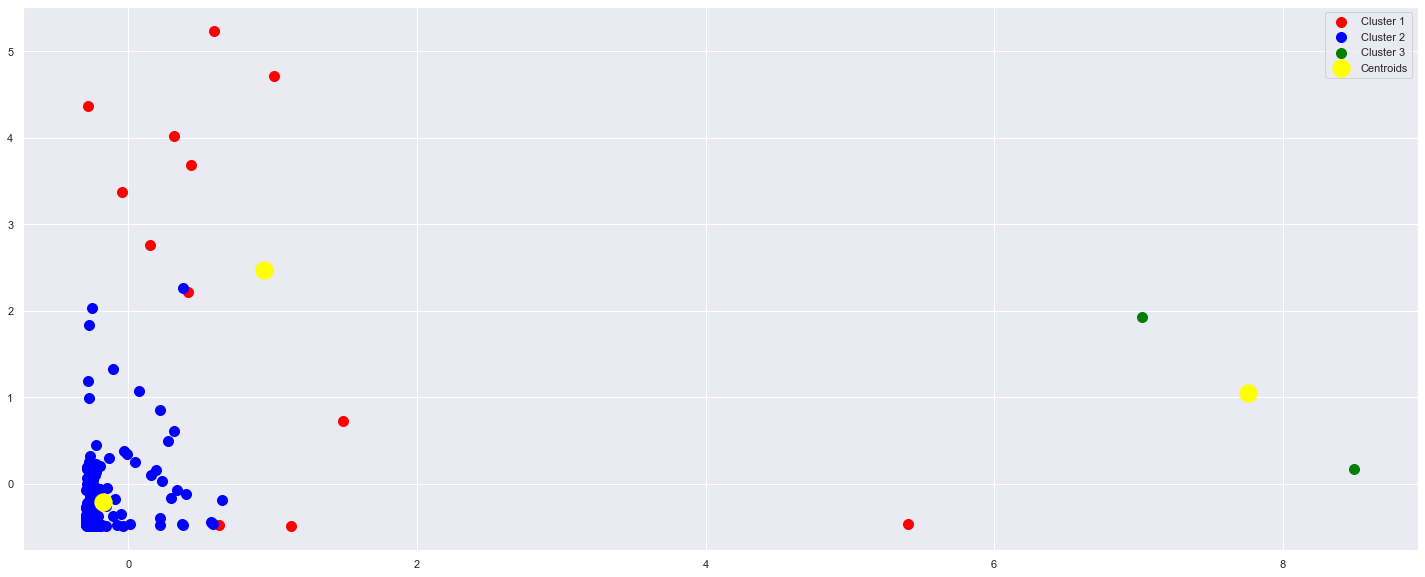

In [155]:
plt.figure(figsize = (25, 10))
#Visualisation des clusters
plt.scatter(X_kmeans[y_kmeans==0, 0], X_kmeans[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_kmeans[y_kmeans==1, 0], X_kmeans[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_kmeans[y_kmeans==2, 0], X_kmeans[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#Visualisation des centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.legend()
plt.show()

On remarque ici que les centroides sont bien identifiés à chaque clusters et qu'il ne sont pas trop proches l'un de l'autre.

* Représentation graphique des 5 clusters avec Kmeans:

In [156]:
X_kmeans=df_norm.values
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X_kmeans)

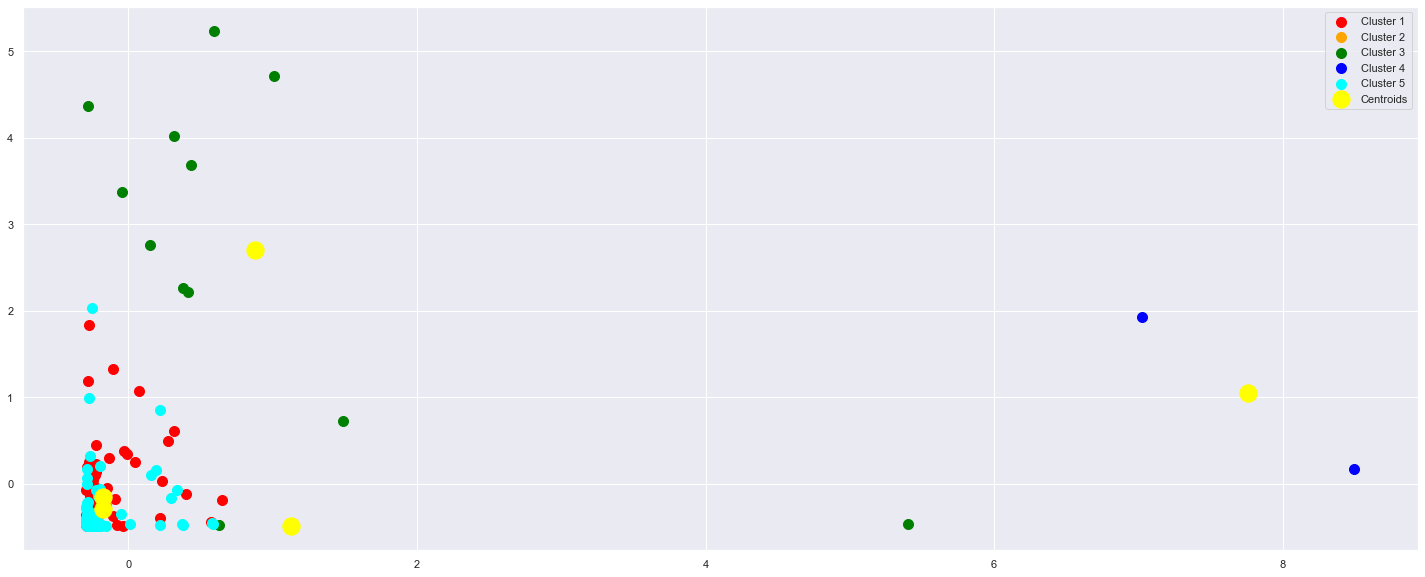

In [157]:
plt.figure(figsize = (25, 10))
#Visualisation des clusters
plt.scatter(X_kmeans[y_kmeans==0, 0], X_kmeans[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_kmeans[y_kmeans==1, 0], X_kmeans[y_kmeans==1, 1], s=100, c='orange', label ='Cluster 2')
plt.scatter(X_kmeans[y_kmeans==2, 0], X_kmeans[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_kmeans[y_kmeans==3, 0], X_kmeans[y_kmeans==3, 1], s=100, c='blue', label ='Cluster 4')
plt.scatter(X_kmeans[y_kmeans==4, 0], X_kmeans[y_kmeans==4, 1], s=100, c='cyan', label ='Cluster 5')
#Visualisation des centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.legend()
plt.show()

Sur cette représentation graphique on peut voir que les centroides ne sont pas facilement identifiables et certains sont très proches l'un de l'autre. Donc cela peut s'expliquer par le fait que deux groupes soient peut etre un peu trop proches. En gardant alors 3 clusters nous serons plus précis dans notre selection.

### Analyse sans les 2 plus gros outliers:

Nous avons pu constater durant l'analyse que deux pays forment à eux seuls un cluster et que ces pays ne corréspondent pas à nos critères de selection. En effet de part leur indépendance très forte à l'importation, nous ne selectionnerons pas ces pays. Nous allons donc refaire l'analyse en supprimant ces pays outliers. Cela nous permettra ensuite lors de l'ACP d'avoir une meilleure visibilité des groupes.

* Suppression des deux pays:

In [158]:
test_acp=df_norm.drop(["Chine, continentale","États-Unis d'Amérique"])
test_acp

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique
Pays,,,,,,,,,,
Afghanistan,-0.279547,-0.328896,-0.166818,-0.291318,-1.197913,-0.233701,-0.284732,-0.047467,-0.261767,-3.012330
Afrique du Sud,0.377630,2.264583,-0.166818,0.648741,0.956748,-0.233701,0.639768,0.086752,-0.070765,-0.244572
Albanie,-0.285561,-0.280769,-0.166818,-0.295880,-0.262502,-0.233701,-0.288467,-0.263969,-0.264791,0.480317
Algérie,-0.180509,-0.473275,-0.166818,-0.190972,-0.891997,-0.233701,-0.187146,-0.014465,-0.182019,-0.947494
Allemagne,0.316283,4.018524,-0.166818,0.475872,-0.066337,5.189551,0.440860,0.252949,1.673979,0.710964
...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),-0.050197,-0.350285,-0.085111,-0.031787,-0.015246,-0.233701,-0.032128,-0.092136,-0.137154,-1.309939
Viet Nam,0.077309,1.072118,-0.166818,0.232761,-0.516697,-0.233701,0.234015,0.330332,-0.123492,0.381469
Yémen,-0.223412,-0.066874,-0.166818,-0.205112,-0.756384,-0.233701,-0.199752,-0.102294,-0.257502,-3.166094


### Classification ascendante hiérarchique sans les 2 outliers:

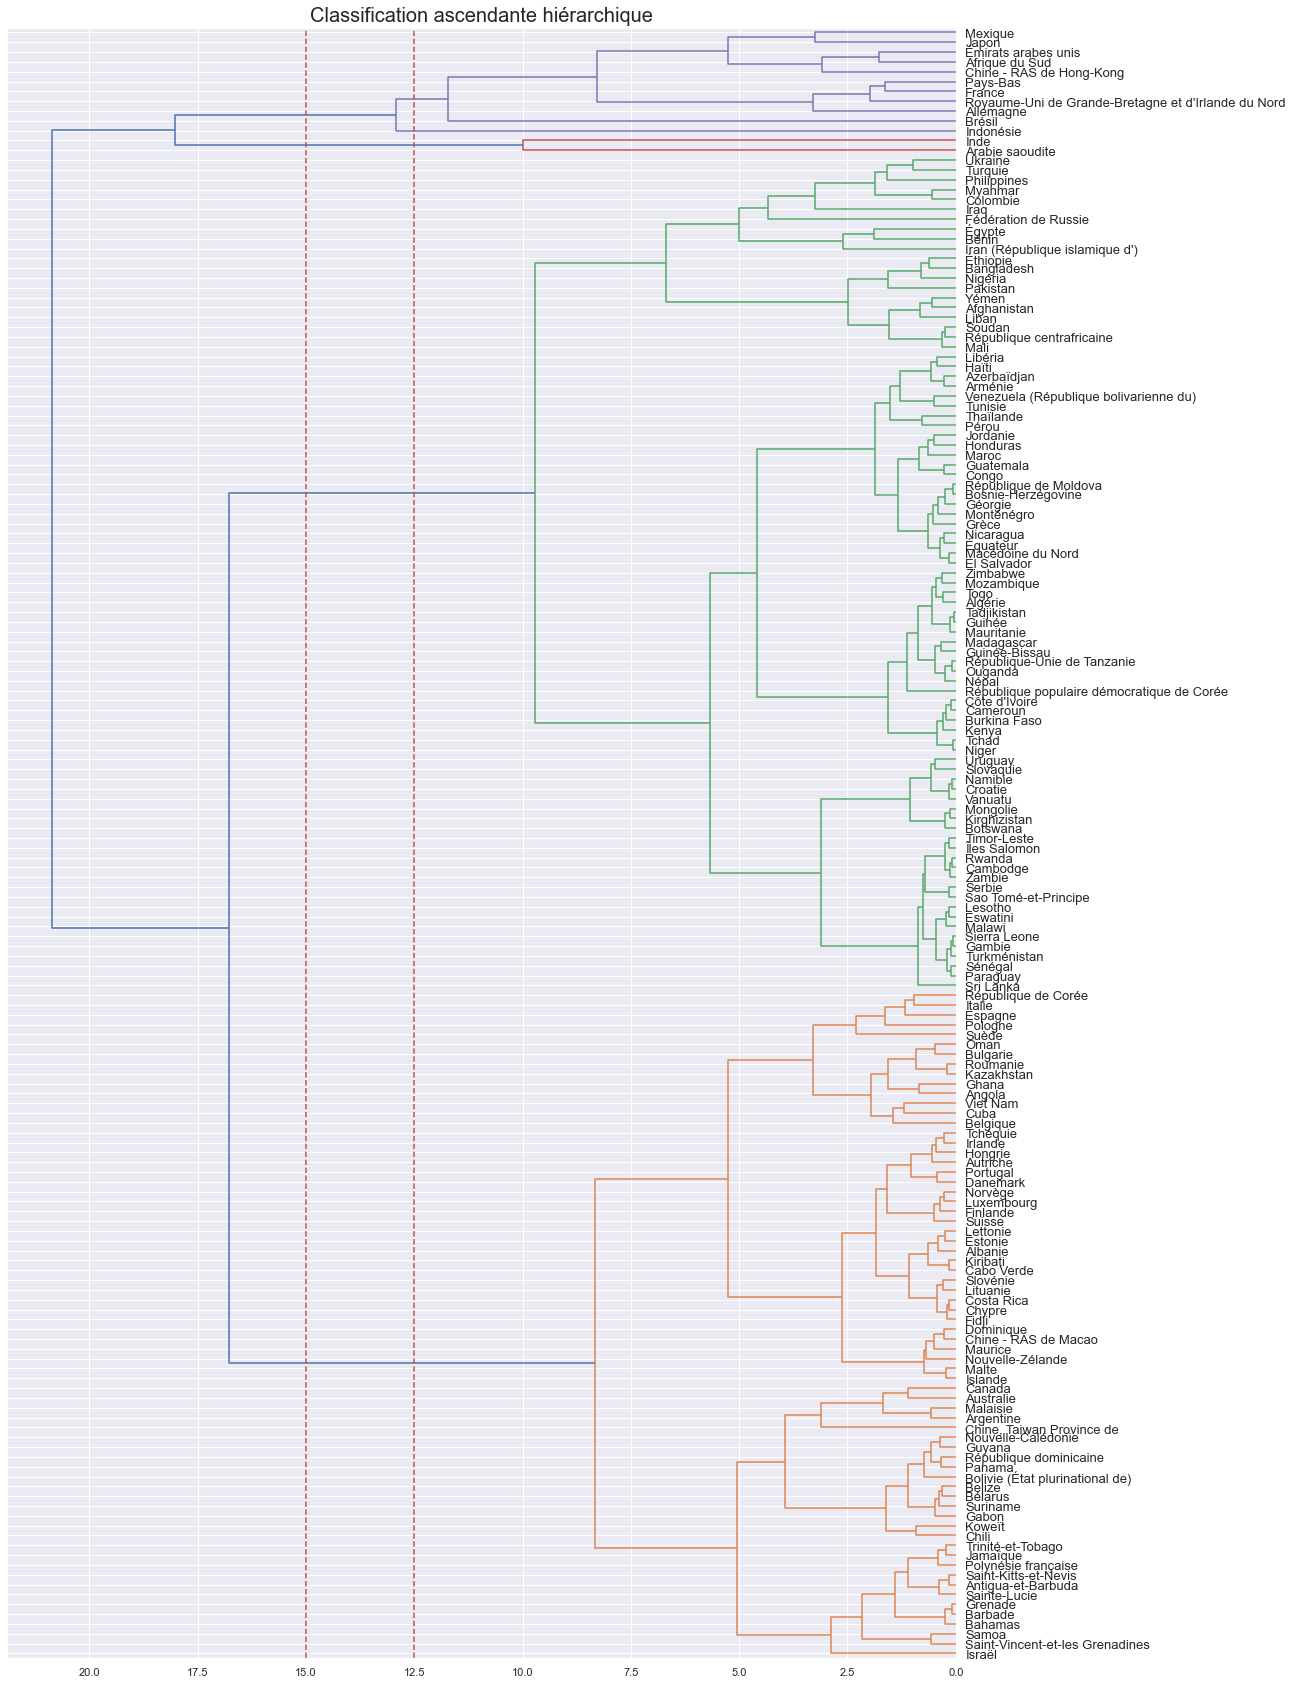

In [159]:
#générer la matrice des liens 
Z = linkage(test_acp, method='ward', metric='euclidean') 

# génération et affichage du dendrogramme
                   
plt.figure(figsize=(17,30))
plt.title("Classification ascendante hiérarchique",fontsize = 20) 
dendrogram(Z, labels=test_acp.index, leaf_rotation=0, leaf_font_size =13,orientation = 'left')
plt.axvline(x=15, color='r', linestyle='--')
plt.axvline(x=12.5, color='r', linestyle='--')
plt.show()

* Pays par groupes pour un partitionnement en 4 clusters:

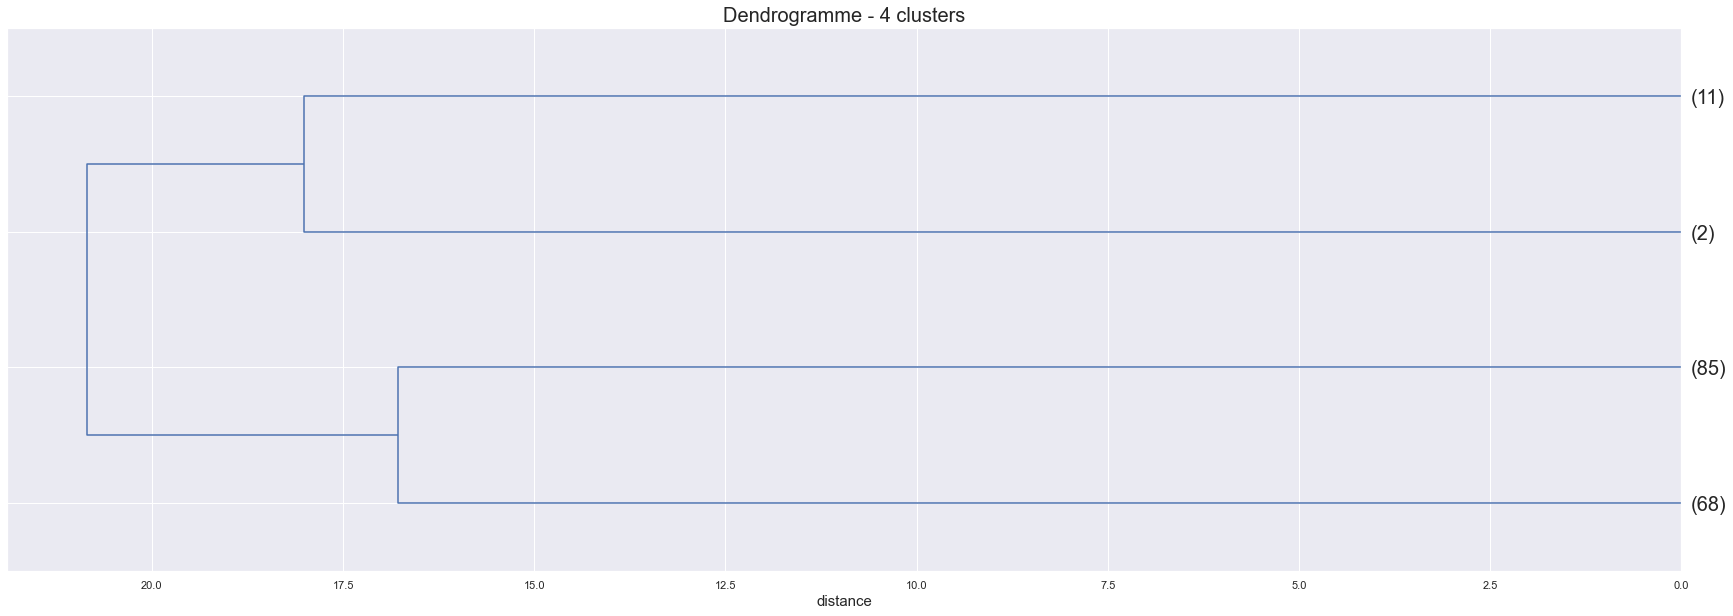

In [160]:
fig = plt.figure(figsize=(30,10))
plt.title('Dendrogramme - 4 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, p=4, truncate_mode='lastp', leaf_font_size=20, orientation='left')
plt.show()

* Pays par groupes pour un partitionnement en 5 clusters:

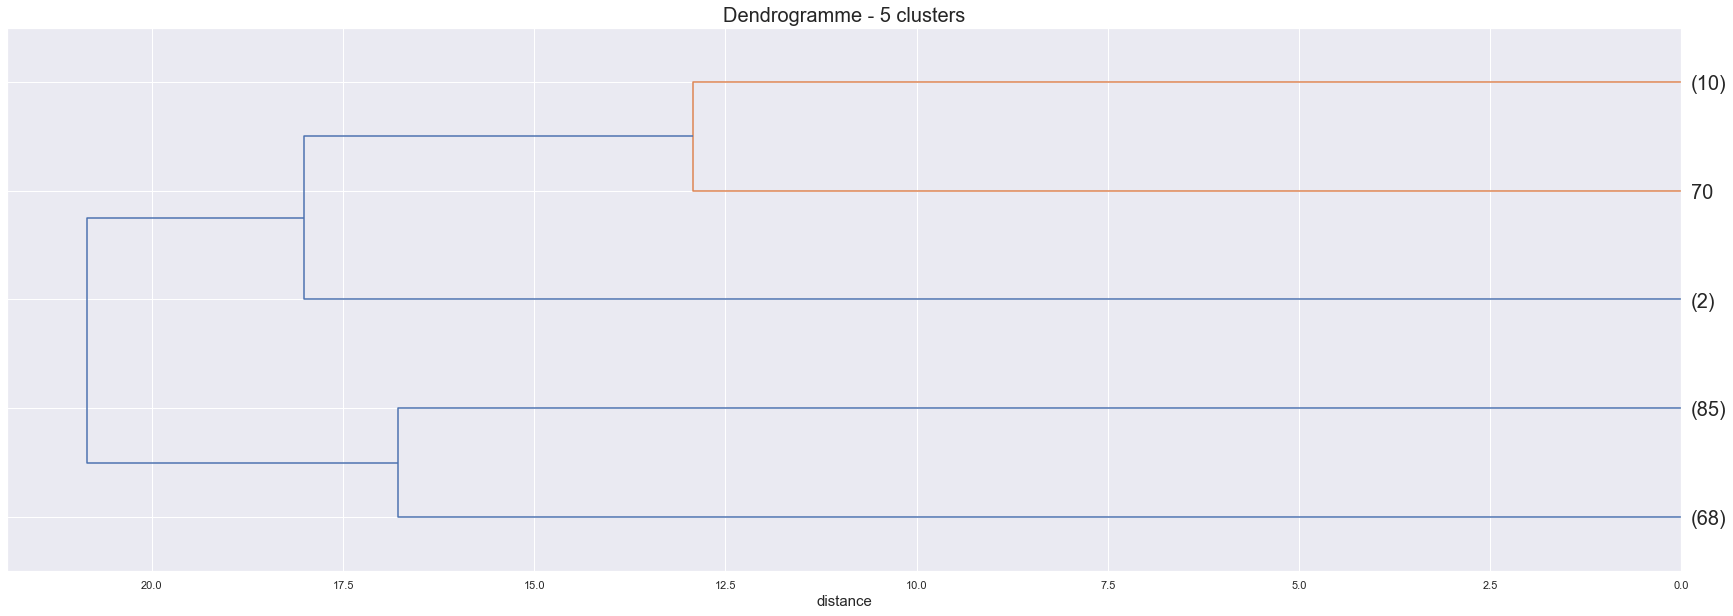

In [161]:
fig = plt.figure(figsize=(30,10))
plt.title('Dendrogramme - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, p=5, truncate_mode='lastp', leaf_font_size=20, orientation='left')
plt.show()

In [162]:
#Identification des 4 groupes obtenus
cah_4groupes = fcluster(Z, 4, criterion='maxclust')
#Index trié des groupes
idg = np.argsort(cah_4groupes)
#Affichage des pays selon leurs groupes
df_cah_4groupes = pd.DataFrame(test_acp.index[idg], cah_4groupes[idg]).reset_index()
df_cah_4groupes = df_cah_4groupes.rename(columns={'index':'Groupe'})
df_cah_4 = pd.merge(test_acp, df_cah_4groupes, on='Pays')
df_cah_4.head()

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique,Groupe
0,Afghanistan,-0.279547,-0.328896,-0.166818,-0.291318,-1.197913,-0.233701,-0.284732,-0.047467,-0.261767,-3.012330,2
1,Afrique du Sud,0.377630,2.264583,-0.166818,0.648741,0.956748,-0.233701,0.639768,0.086752,-0.070765,-0.244572,4
2,Albanie,-0.285561,-0.280769,-0.166818,-0.295880,-0.262502,-0.233701,-0.288467,-0.263969,-0.264791,0.480317,1
3,Algérie,-0.180509,-0.473275,-0.166818,-0.190972,-0.891997,-0.233701,-0.187146,-0.014465,-0.182019,-0.947494,2
4,Allemagne,0.316283,4.018524,-0.166818,0.475872,-0.066337,5.189551,0.440860,0.252949,1.673979,0.710964,4


In [163]:
#Identification des 5 groupes obtenus
cah_5groupes = fcluster(Z, 5, criterion='maxclust')
#Index trié des groupes
idg = np.argsort(cah_5groupes)
#Affichage des pays selon leurs groupes
df_cah_5groupes = pd.DataFrame(test_acp.index[idg], cah_5groupes[idg]).reset_index()
df_cah_5groupes = df_cah_5groupes.rename(columns={'index':'Groupe'})
df_cah_5 = pd.merge(test_acp, df_cah_5groupes, on='Pays')
df_cah_5.head()

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique,Groupe
0,Afghanistan,-0.279547,-0.328896,-0.166818,-0.291318,-1.197913,-0.233701,-0.284732,-0.047467,-0.261767,-3.012330,2
1,Afrique du Sud,0.377630,2.264583,-0.166818,0.648741,0.956748,-0.233701,0.639768,0.086752,-0.070765,-0.244572,4
2,Albanie,-0.285561,-0.280769,-0.166818,-0.295880,-0.262502,-0.233701,-0.288467,-0.263969,-0.264791,0.480317,1
3,Algérie,-0.180509,-0.473275,-0.166818,-0.190972,-0.891997,-0.233701,-0.187146,-0.014465,-0.182019,-0.947494,2
4,Allemagne,0.316283,4.018524,-0.166818,0.475872,-0.066337,5.189551,0.440860,0.252949,1.673979,0.710964,4


* Selection des 4 groupes correspondant au 4 clusters:

In [164]:
df_cah4_groupe1 = df_cah_4[df_cah_4['Groupe'] == 1]
df_cah4_groupe2 = df_cah_4[df_cah_4['Groupe'] == 2]
df_cah4_groupe3 = df_cah_4[df_cah_4['Groupe'] == 3]
df_cah4_groupe4 = df_cah_4[df_cah_4['Groupe'] == 4]

In [165]:
print(df_cah4_groupe1['Pays'].unique())

['Albanie' 'Angola' 'Antigua-et-Barbuda' 'Argentine' 'Australie'
 'Autriche' 'Bahamas' 'Barbade' 'Bélarus' 'Belgique' 'Belize'
 'Bolivie (État plurinational de)' 'Bulgarie' 'Cabo Verde' 'Canada'
 'Chili' 'Chine - RAS de Macao' 'Chine, Taiwan Province de' 'Chypre'
 'Costa Rica' 'Cuba' 'Danemark' 'Dominique' 'Espagne' 'Estonie' 'Fidji'
 'Finlande' 'Gabon' 'Ghana' 'Grenade' 'Guyana' 'Hongrie' 'Irlande'
 'Islande' 'Israël' 'Italie' 'Jamaïque' 'Kazakhstan' 'Kiribati' 'Koweït'
 'Lettonie' 'Lituanie' 'Luxembourg' 'Malaisie' 'Malte' 'Maurice' 'Norvège'
 'Nouvelle-Calédonie' 'Nouvelle-Zélande' 'Oman' 'Panama' 'Pologne'
 'Polynésie française' 'Portugal' 'République de Corée'
 'République dominicaine' 'Roumanie' 'Sainte-Lucie' 'Saint-Kitts-et-Nevis'
 'Saint-Vincent-et-les Grenadines' 'Samoa' 'Slovénie' 'Suède' 'Suisse'
 'Suriname' 'Tchéquie' 'Trinité-et-Tobago' 'Viet Nam']


In [166]:
print(df_cah4_groupe2['Pays'].unique())

['Afghanistan' 'Algérie' 'Arménie' 'Azerbaïdjan' 'Bangladesh' 'Bénin'
 'Bosnie-Herzégovine' 'Botswana' 'Burkina Faso' 'Cambodge' 'Cameroun'
 'Colombie' 'Congo' "Côte d'Ivoire" 'Croatie' 'Égypte' 'El Salvador'
 'Équateur' 'Eswatini' 'Éthiopie' 'Fédération de Russie' 'Gambie'
 'Géorgie' 'Grèce' 'Guatemala' 'Guinée' 'Guinée-Bissau' 'Haïti' 'Honduras'
 'Îles Salomon' "Iran (République islamique d')" 'Iraq' 'Jordanie' 'Kenya'
 'Kirghizistan' 'Lesotho' 'Liban' 'Libéria' 'Macédoine du Nord'
 'Madagascar' 'Malawi' 'Mali' 'Maroc' 'Mauritanie' 'Mongolie' 'Monténégro'
 'Mozambique' 'Myanmar' 'Namibie' 'Népal' 'Nicaragua' 'Niger' 'Nigéria'
 'Ouganda' 'Pakistan' 'Paraguay' 'Pérou' 'Philippines'
 'République centrafricaine' 'République de Moldova'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Rwanda' 'Sao Tomé-et-Principe' 'Sénégal'
 'Serbie' 'Sierra Leone' 'Slovaquie' 'Soudan' 'Sri Lanka' 'Tadjikistan'
 'Tchad' 'Thaïlande' 'Timor-Leste' 'Togo' 'Tunisie' 'Turkménistan

In [167]:
print(df_cah4_groupe3['Pays'].unique())

['Arabie saoudite' 'Inde']


In [168]:
print(df_cah4_groupe4['Pays'].unique())

['Afrique du Sud' 'Allemagne' 'Brésil' 'Chine - RAS de Hong-Kong'
 'Émirats arabes unis' 'France' 'Indonésie' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [169]:
df_test_ouliers = df_cah_4.groupby('Groupe').mean()
df_test_ouliers['Tdi'] = df_test_ouliers['Importations'] / (df_test_ouliers['Production']+df_test_ouliers['Importations']-df_test_ouliers['Exportations'])*100
df_test_ouliers

,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique,Tdi
Groupe,,,,,,,,,,,
1,-0.165220,-0.130414,-0.153601,-0.178443,0.698963,-0.110011,-0.175843,-0.209837,-0.105575,0.729054,91.819641
2,-0.166499,-0.309205,-0.072615,-0.172529,-0.662551,-0.193967,-0.171105,-0.098439,-0.210272,-0.614123,76.708805
3,0.543428,1.446434,8.534966,0.844872,0.143073,-0.233701,0.716809,4.161736,0.608626,-0.672915,-22.099488
4,0.798494,2.740986,-0.010832,0.829903,0.618204,2.033614,0.823437,0.323976,0.691911,0.338535,77.204075


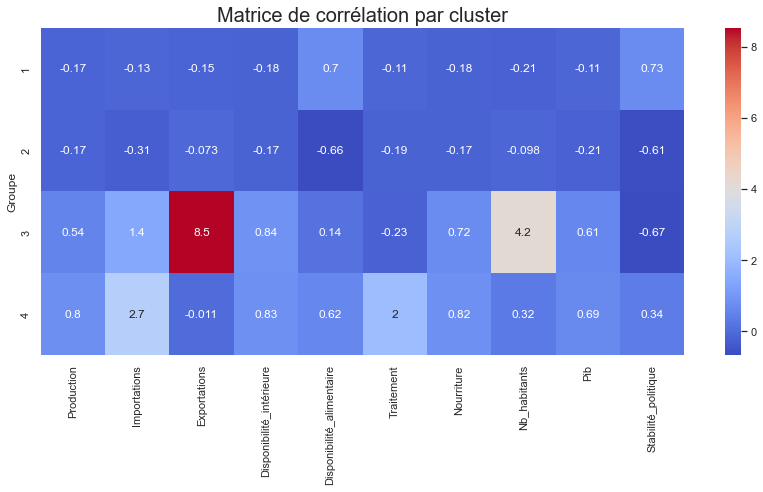

In [170]:
plt.figure(figsize=(12,7))
sns.heatmap(df_cah_4.groupby('Groupe').mean(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation par cluster', fontsize=20)
plt.tight_layout()
plt.show()

Le groupe le plus intéressant serait le 4, donc pas de changement sur les pays deja selectionnés.

* Selection des 5 groupes correspondant au 5 clusters:

In [171]:
df_cah5_groupe1 = df_cah_5[df_cah_5['Groupe'] == 1]
df_cah5_groupe2 = df_cah_5[df_cah_5['Groupe'] == 2]
df_cah5_groupe3 = df_cah_5[df_cah_5['Groupe'] == 3]
df_cah5_groupe4 = df_cah_5[df_cah_5['Groupe'] == 4]
df_cah5_groupe5 = df_cah_5[df_cah_5['Groupe'] == 5]

In [172]:
print(df_cah5_groupe1['Pays'].unique())

['Albanie' 'Angola' 'Antigua-et-Barbuda' 'Argentine' 'Australie'
 'Autriche' 'Bahamas' 'Barbade' 'Bélarus' 'Belgique' 'Belize'
 'Bolivie (État plurinational de)' 'Bulgarie' 'Cabo Verde' 'Canada'
 'Chili' 'Chine - RAS de Macao' 'Chine, Taiwan Province de' 'Chypre'
 'Costa Rica' 'Cuba' 'Danemark' 'Dominique' 'Espagne' 'Estonie' 'Fidji'
 'Finlande' 'Gabon' 'Ghana' 'Grenade' 'Guyana' 'Hongrie' 'Irlande'
 'Islande' 'Israël' 'Italie' 'Jamaïque' 'Kazakhstan' 'Kiribati' 'Koweït'
 'Lettonie' 'Lituanie' 'Luxembourg' 'Malaisie' 'Malte' 'Maurice' 'Norvège'
 'Nouvelle-Calédonie' 'Nouvelle-Zélande' 'Oman' 'Panama' 'Pologne'
 'Polynésie française' 'Portugal' 'République de Corée'
 'République dominicaine' 'Roumanie' 'Sainte-Lucie' 'Saint-Kitts-et-Nevis'
 'Saint-Vincent-et-les Grenadines' 'Samoa' 'Slovénie' 'Suède' 'Suisse'
 'Suriname' 'Tchéquie' 'Trinité-et-Tobago' 'Viet Nam']


In [173]:
print(df_cah5_groupe2['Pays'].unique())

['Afghanistan' 'Algérie' 'Arménie' 'Azerbaïdjan' 'Bangladesh' 'Bénin'
 'Bosnie-Herzégovine' 'Botswana' 'Burkina Faso' 'Cambodge' 'Cameroun'
 'Colombie' 'Congo' "Côte d'Ivoire" 'Croatie' 'Égypte' 'El Salvador'
 'Équateur' 'Eswatini' 'Éthiopie' 'Fédération de Russie' 'Gambie'
 'Géorgie' 'Grèce' 'Guatemala' 'Guinée' 'Guinée-Bissau' 'Haïti' 'Honduras'
 'Îles Salomon' "Iran (République islamique d')" 'Iraq' 'Jordanie' 'Kenya'
 'Kirghizistan' 'Lesotho' 'Liban' 'Libéria' 'Macédoine du Nord'
 'Madagascar' 'Malawi' 'Mali' 'Maroc' 'Mauritanie' 'Mongolie' 'Monténégro'
 'Mozambique' 'Myanmar' 'Namibie' 'Népal' 'Nicaragua' 'Niger' 'Nigéria'
 'Ouganda' 'Pakistan' 'Paraguay' 'Pérou' 'Philippines'
 'République centrafricaine' 'République de Moldova'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Rwanda' 'Sao Tomé-et-Principe' 'Sénégal'
 'Serbie' 'Sierra Leone' 'Slovaquie' 'Soudan' 'Sri Lanka' 'Tadjikistan'
 'Tchad' 'Thaïlande' 'Timor-Leste' 'Togo' 'Tunisie' 'Turkménistan

In [174]:
print(df_cah5_groupe3['Pays'].unique())

['Arabie saoudite' 'Inde']


In [175]:
print(df_cah5_groupe4['Pays'].unique())

['Afrique du Sud' 'Allemagne' 'Brésil' 'Chine - RAS de Hong-Kong'
 'Émirats arabes unis' 'France' 'Japon' 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [176]:
print(df_cah5_groupe5['Pays'].unique())

['Indonésie']


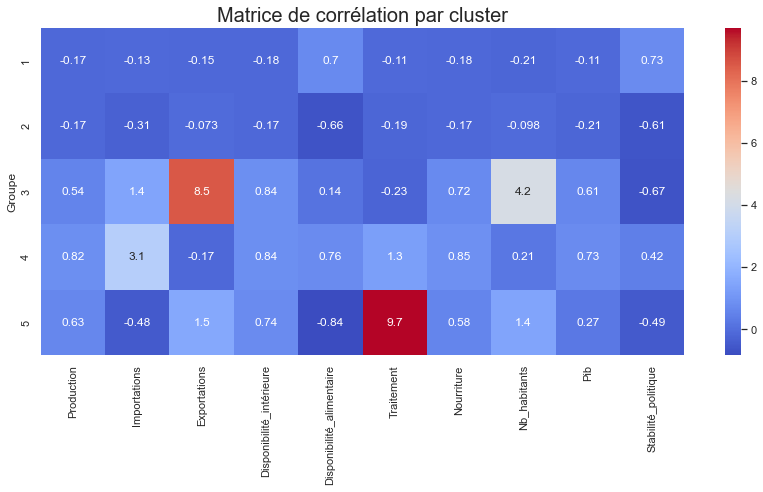

In [261]:
plt.figure(figsize=(12,7))
sns.heatmap(df_cah_5.groupby('Groupe').mean(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation par cluster', fontsize=20)
plt.tight_layout() 
plt.show()

Le groupe le plus intéressant serait le 4, mais on perd ici l'indonésie.

In [178]:
df_cah_5.loc[(df_cah_5['Pays']=='Indonésie')]

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique,Groupe
70,Indonésie,0.63184,-0.478622,1.549026,0.742245,-0.840905,9.703516,0.578601,1.432216,0.266162,-0.486201,5


C'est un pays qui exporte plus qu'il importe et son indice de stabilité politique est négatif. Donc le partitionnement en 5 clusters est ici plus précis.

* Représentation graphique des 5 clusters:

In [179]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(test_acp)

array([1, 0, 3, 1, 0, 3, 3, 2, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       1, 0, 3, 1, 3, 1, 1, 3, 3, 0, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1,
       1, 0, 1, 3, 3, 1, 1, 1, 3, 3, 0, 3, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1,
       1, 3, 1, 2, 4, 1, 1, 3, 3, 3, 3, 3, 0, 1, 3, 1, 1, 3, 3, 1, 3, 1,
       1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 1, 3, 1, 0, 1, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 0,
       1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1], dtype=int64)

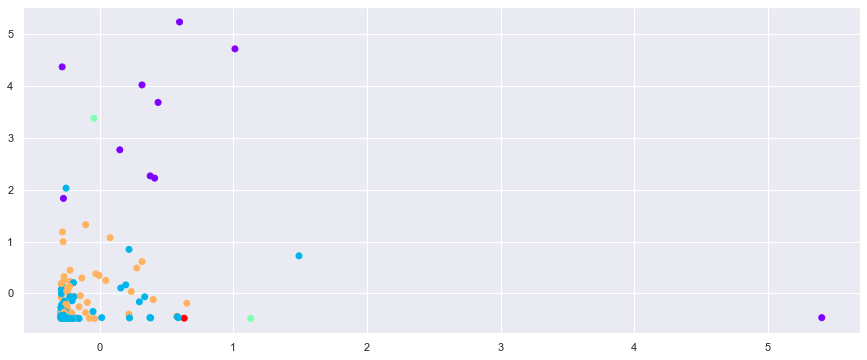

In [180]:
plt.figure(figsize=(15, 6))
X_cah = test_acp.values
plt.scatter(X_cah[:,0], X_cah[:,1], c=cluster.labels_, cmap='rainbow')

### K-MEANS sans les 2 outliers:

In [181]:
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn import cluster, metrics

* Calcul du coéfficient de silhouette pour chaque clusters:

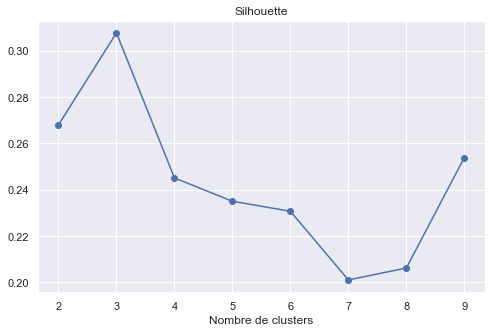

In [250]:
plt.figure(figsize=(8,5))
silhouettes = []
for num_clusters in range (2, 10):
    cls = cluster.KMeans(n_clusters=num_clusters,
                         n_init=1, init='random')
    cls.fit(test_acp)
    silh = metrics.silhouette_score(test_acp, cls.labels_)
    silhouettes.append(silh)
plt.title("Silhouette")
plt.xlabel("Nombre de clusters")
plt.plot(range(2, 10), silhouettes, marker='o')

On obtient un meilleur score ici qui est de 3.

* La méthode Elbow:

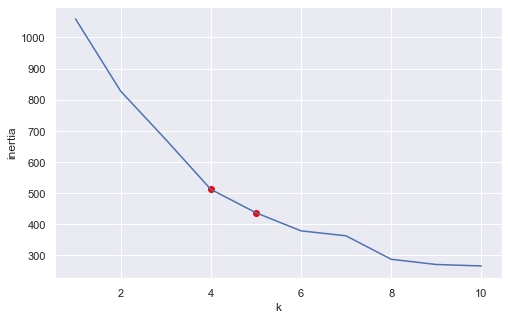

In [251]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 20).fit(test_acp)
    inertia = inertia + [kmeans.inertia_]
inertia = pd.DataFrame({"k": range(1, 11), "inertia": inertia})
plt.figure(figsize = (8, 5))
sns.lineplot(data = inertia, x = "k", y = "inertia")
plt.scatter(4, inertia.query('k == 4')["inertia"], c = "red")
plt.scatter(5, inertia.query('k == 5')["inertia"], c = "red")
plt.show()

* Voyons alors quel nombre de clusters serait le plus optimal entre 3, 4 et 5 clusters:

In [184]:
#Clustering K-Means en 3 clusters
cls3 = cluster.KMeans(n_clusters=3, random_state=0)
cls3.fit(test_acp)
pd.Series(cls3.labels_).value_counts()

1    78
0    76
2    12
dtype: int64

In [185]:
#Clustering K-Means en 4 clusters
cls4 = cluster.KMeans(n_clusters=4, random_state=0)
cls4.fit(test_acp)
pd.Series(cls4.labels_).value_counts()

0    78
3    77
1     9
2     2
dtype: int64

In [186]:
#Clustering K-Means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5, random_state=0)
cls5.fit(test_acp)
pd.Series(cls5.labels_).value_counts()

3    77
1    76
0    11
2     1
4     1
dtype: int64

* Mise en place des groupes de pays par clusters:

In [187]:
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans3 = cls3.labels_
clusters_kmeans4 = cls4.labels_
clusters_kmeans5 = cls5.labels_

In [188]:
#Identification des 3 groupes obtenus
groupes_kmeans3 = clusters_kmeans3
#Index trié des groupes
idg = np.argsort(groupes_kmeans3)
#Affichage des pays selon leurs groupes
df_kmeans3 = pd.DataFrame(test_acp.index[idg], groupes_kmeans3[idg]).reset_index()
df_kmeans3 = df_kmeans3.rename(columns={'index':'Groupe'})

#Identification des 04 groupes obtenus
groupes_kmeans4 = clusters_kmeans4
#Index trié des groupes
idg = np.argsort(groupes_kmeans4)
#Affichage des pays selon leurs groupes
df_kmeans4 = pd.DataFrame(test_acp.index[idg], groupes_kmeans4[idg]).reset_index()
df_kmeans4 = df_kmeans4.rename(columns={'index':'Groupe'})

#Identification des 5 groupes obtenus
groupes_kmeans5 = clusters_kmeans5
#Index trié des groupes
idg = np.argsort(groupes_kmeans5)
#Affichage des pays selon leurs groupes
df_kmeans5 = pd.DataFrame(test_acp.index[idg], groupes_kmeans5[idg]).reset_index()
df_kmeans5 = df_kmeans5.rename(columns={'index':'Groupe'})

* Création des listes de pays pour 3 clusters:

In [189]:
df_groupes_kmeans3 = pd.merge(test_acp, df_kmeans3, on='Pays')
df_groupe0_Kmeans3 = df_groupes_kmeans3[df_groupes_kmeans3['Groupe'] == 0]
df_groupe1_Kmeans3 = df_groupes_kmeans3[df_groupes_kmeans3['Groupe'] == 1]
df_groupe2_Kmeans3 = df_groupes_kmeans3[df_groupes_kmeans3['Groupe'] == 2]

In [190]:
print(df_groupe0_Kmeans3['Pays'].unique())

['Afrique du Sud' 'Albanie' 'Antigua-et-Barbuda' 'Argentine' 'Australie'
 'Autriche' 'Bahamas' 'Barbade' 'Bélarus' 'Belgique' 'Belize'
 'Bolivie (État plurinational de)' 'Botswana' 'Bulgarie' 'Cabo Verde'
 'Canada' 'Chili' 'Chine - RAS de Macao' 'Chine, Taiwan Province de'
 'Chypre' 'Costa Rica' 'Croatie' 'Cuba' 'Danemark' 'Dominique'
 'Émirats arabes unis' 'Espagne' 'Estonie' 'Fidji' 'Finlande' 'Gabon'
 'Grenade' 'Guyana' 'Hongrie' 'Irlande' 'Islande' 'Israël' 'Italie'
 'Jamaïque' 'Kazakhstan' 'Kirghizistan' 'Kiribati' 'Koweït' 'Lettonie'
 'Lituanie' 'Luxembourg' 'Malaisie' 'Malte' 'Maurice' 'Namibie'
 'Nicaragua' 'Norvège' 'Nouvelle-Calédonie' 'Nouvelle-Zélande' 'Oman'
 'Panama' 'Pologne' 'Polynésie française' 'Portugal' 'République de Corée'
 'République dominicaine' 'Roumanie' 'Sainte-Lucie' 'Saint-Kitts-et-Nevis'
 'Saint-Vincent-et-les Grenadines' 'Samoa' 'Slovaquie' 'Slovénie' 'Suède'
 'Suisse' 'Suriname' 'Tchéquie' 'Trinité-et-Tobago' 'Uruguay' 'Vanuatu'
 'Viet Nam']


In [191]:
print(df_groupe1_Kmeans3['Pays'].unique())

['Afghanistan' 'Algérie' 'Angola' 'Arménie' 'Azerbaïdjan' 'Bangladesh'
 'Bénin' 'Bosnie-Herzégovine' 'Burkina Faso' 'Cambodge' 'Cameroun'
 'Colombie' 'Congo' "Côte d'Ivoire" 'Égypte' 'El Salvador' 'Équateur'
 'Eswatini' 'Éthiopie' 'Gambie' 'Géorgie' 'Ghana' 'Grèce' 'Guatemala'
 'Guinée' 'Guinée-Bissau' 'Haïti' 'Honduras' 'Îles Salomon'
 "Iran (République islamique d')" 'Iraq' 'Jordanie' 'Kenya' 'Lesotho'
 'Liban' 'Libéria' 'Macédoine du Nord' 'Madagascar' 'Malawi' 'Mali'
 'Maroc' 'Mauritanie' 'Mongolie' 'Monténégro' 'Mozambique' 'Myanmar'
 'Népal' 'Niger' 'Nigéria' 'Ouganda' 'Pakistan' 'Paraguay' 'Pérou'
 'Philippines' 'République centrafricaine' 'République de Moldova'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Rwanda' 'Sao Tomé-et-Principe' 'Sénégal'
 'Serbie' 'Sierra Leone' 'Soudan' 'Sri Lanka' 'Tadjikistan' 'Tchad'
 'Thaïlande' 'Timor-Leste' 'Togo' 'Tunisie' 'Turkménistan' 'Turquie'
 'Ukraine' 'Venezuela (République bolivarienne du)' 'Yémen' 'Zamb

In [192]:
print(df_groupe2_Kmeans3['Pays'].unique())

['Allemagne' 'Arabie saoudite' 'Brésil' 'Chine - RAS de Hong-Kong'
 'Fédération de Russie' 'France' 'Inde' 'Indonésie' 'Japon' 'Mexique'
 'Pays-Bas' "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


* Création des listes de pays pour 4 clusters:

In [193]:
df_groupes_kmeans4 = pd.merge(test_acp, df_kmeans4, on='Pays')
df_groupe0_Kmeans4 = df_groupes_kmeans4[df_groupes_kmeans4['Groupe'] == 0]
df_groupe1_Kmeans4 = df_groupes_kmeans4[df_groupes_kmeans4['Groupe'] == 1]
df_groupe2_Kmeans4 = df_groupes_kmeans4[df_groupes_kmeans4['Groupe'] == 2]
df_groupe3_Kmeans4 = df_groupes_kmeans4[df_groupes_kmeans4['Groupe'] == 3]

In [194]:
print(df_groupe0_Kmeans4['Pays'].unique())

['Afghanistan' 'Algérie' 'Angola' 'Arménie' 'Azerbaïdjan' 'Bangladesh'
 'Bénin' 'Bosnie-Herzégovine' 'Burkina Faso' 'Cambodge' 'Cameroun'
 'Colombie' 'Congo' "Côte d'Ivoire" 'Égypte' 'El Salvador' 'Équateur'
 'Eswatini' 'Éthiopie' 'Gambie' 'Géorgie' 'Ghana' 'Grèce' 'Guatemala'
 'Guinée' 'Guinée-Bissau' 'Haïti' 'Honduras' 'Îles Salomon'
 "Iran (République islamique d')" 'Iraq' 'Jordanie' 'Kenya' 'Lesotho'
 'Liban' 'Libéria' 'Macédoine du Nord' 'Madagascar' 'Malawi' 'Mali'
 'Maroc' 'Mauritanie' 'Mongolie' 'Monténégro' 'Mozambique' 'Myanmar'
 'Népal' 'Niger' 'Nigéria' 'Ouganda' 'Pakistan' 'Paraguay' 'Pérou'
 'Philippines' 'République centrafricaine' 'République de Moldova'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Rwanda' 'Sao Tomé-et-Principe' 'Sénégal'
 'Serbie' 'Sierra Leone' 'Soudan' 'Sri Lanka' 'Tadjikistan' 'Tchad'
 'Thaïlande' 'Timor-Leste' 'Togo' 'Tunisie' 'Turkménistan' 'Turquie'
 'Ukraine' 'Venezuela (République bolivarienne du)' 'Yémen' 'Zamb

In [195]:
print(df_groupe1_Kmeans4['Pays'].unique())

['Allemagne' 'Brésil' 'Fédération de Russie' 'France' 'Indonésie' 'Japon'
 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [196]:
print(df_groupe2_Kmeans4['Pays'].unique())

['Arabie saoudite' 'Inde']


In [197]:
print(df_groupe3_Kmeans4['Pays'].unique())

['Afrique du Sud' 'Albanie' 'Antigua-et-Barbuda' 'Argentine' 'Australie'
 'Autriche' 'Bahamas' 'Barbade' 'Bélarus' 'Belgique' 'Belize'
 'Bolivie (État plurinational de)' 'Botswana' 'Bulgarie' 'Cabo Verde'
 'Canada' 'Chili' 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao'
 'Chine, Taiwan Province de' 'Chypre' 'Costa Rica' 'Croatie' 'Cuba'
 'Danemark' 'Dominique' 'Émirats arabes unis' 'Espagne' 'Estonie' 'Fidji'
 'Finlande' 'Gabon' 'Grenade' 'Guyana' 'Hongrie' 'Irlande' 'Islande'
 'Israël' 'Italie' 'Jamaïque' 'Kazakhstan' 'Kirghizistan' 'Kiribati'
 'Koweït' 'Lettonie' 'Lituanie' 'Luxembourg' 'Malaisie' 'Malte' 'Maurice'
 'Namibie' 'Nicaragua' 'Norvège' 'Nouvelle-Calédonie' 'Nouvelle-Zélande'
 'Oman' 'Panama' 'Pologne' 'Polynésie française' 'Portugal'
 'République de Corée' 'République dominicaine' 'Roumanie' 'Sainte-Lucie'
 'Saint-Kitts-et-Nevis' 'Saint-Vincent-et-les Grenadines' 'Samoa'
 'Slovaquie' 'Slovénie' 'Suède' 'Suisse' 'Suriname' 'Tchéquie'
 'Trinité-et-Tobago' 'Uruguay' 'Vanua

In [262]:
df_groupes_kmeans5

,Pays,Production,Importations,Exportations,Disponibilité_intérieure,Disponibilité_alimentaire,Traitement,Nourriture,Nb_habitants,Pib,Stabilité_politique,Groupe
0,Afghanistan,-0.279547,-0.328896,-0.166818,-0.291318,-1.197913,-0.233701,-0.284732,-0.047467,-0.261767,-3.012330,3
1,Afrique du Sud,0.377630,2.264583,-0.166818,0.648741,0.956748,-0.233701,0.639768,0.086752,-0.070765,-0.244572,0
2,Albanie,-0.285561,-0.280769,-0.166818,-0.295880,-0.262502,-0.233701,-0.288467,-0.263969,-0.264791,0.480317,1
3,Algérie,-0.180509,-0.473275,-0.166818,-0.190972,-0.891997,-0.233701,-0.187146,-0.014465,-0.182019,-0.947494,3
4,Allemagne,0.316283,4.018524,-0.166818,0.475872,-0.066337,5.189551,0.440860,0.252949,1.673979,0.710964,0
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Venezuela (République bolivarienne du),-0.050197,-0.350285,-0.085111,-0.031787,-0.015246,-0.233701,-0.032128,-0.092136,-0.137154,-1.309939,3
162,Viet Nam,0.077309,1.072118,-0.166818,0.232761,-0.516697,-0.233701,0.234015,0.330332,-0.123492,0.381469,1
163,Yémen,-0.223412,-0.066874,-0.166818,-0.205112,-0.756384,-0.233701,-0.199752,-0.102294,-0.257502,-3.166094,3
164,Zambie,-0.271127,-0.419801,-0.166818,-0.289950,-1.078700,-0.233701,-0.283331,-0.173450,-0.258013,0.227705,3


* Création des listes de pays pour 5 clusters:

In [198]:
df_groupes_kmeans5 = pd.merge(test_acp, df_kmeans5, on='Pays')
df_groupe0_Kmeans5 = df_groupes_kmeans5[df_groupes_kmeans5['Groupe'] == 0]
df_groupe1_Kmeans5 = df_groupes_kmeans5[df_groupes_kmeans5['Groupe'] == 1]
df_groupe2_Kmeans5 = df_groupes_kmeans5[df_groupes_kmeans5['Groupe'] == 2]
df_groupe3_Kmeans5 = df_groupes_kmeans5[df_groupes_kmeans5['Groupe'] == 3]
df_groupe4_Kmeans5 = df_groupes_kmeans5[df_groupes_kmeans5['Groupe'] == 4]

In [199]:
print(df_groupe0_Kmeans5['Pays'].unique())

['Afrique du Sud' 'Allemagne' 'Arabie saoudite' 'Brésil'
 'Chine - RAS de Hong-Kong' 'Fédération de Russie' 'France' 'Japon'
 'Mexique' 'Pays-Bas'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]


In [200]:
print(df_groupe1_Kmeans5['Pays'].unique())

['Albanie' 'Antigua-et-Barbuda' 'Argentine' 'Australie' 'Autriche'
 'Bahamas' 'Barbade' 'Bélarus' 'Belgique' 'Belize'
 'Bolivie (État plurinational de)' 'Botswana' 'Bulgarie' 'Cabo Verde'
 'Canada' 'Chili' 'Chine - RAS de Macao' 'Chine, Taiwan Province de'
 'Chypre' 'Costa Rica' 'Croatie' 'Cuba' 'Danemark' 'Dominique'
 'Émirats arabes unis' 'Espagne' 'Estonie' 'Fidji' 'Finlande' 'Gabon'
 'Grenade' 'Guyana' 'Hongrie' 'Irlande' 'Islande' 'Israël' 'Italie'
 'Jamaïque' 'Kazakhstan' 'Kirghizistan' 'Kiribati' 'Koweït' 'Lettonie'
 'Lituanie' 'Luxembourg' 'Malaisie' 'Malte' 'Maurice' 'Mongolie' 'Namibie'
 'Nicaragua' 'Norvège' 'Nouvelle-Calédonie' 'Nouvelle-Zélande' 'Oman'
 'Panama' 'Pologne' 'Polynésie française' 'Portugal' 'République de Corée'
 'République dominicaine' 'Roumanie' 'Sainte-Lucie' 'Saint-Kitts-et-Nevis'
 'Saint-Vincent-et-les Grenadines' 'Samoa' 'Slovaquie' 'Slovénie' 'Suède'
 'Suisse' 'Suriname' 'Tchéquie' 'Trinité-et-Tobago' 'Uruguay' 'Vanuatu'
 'Viet Nam']


In [201]:
print(df_groupe2_Kmeans5['Pays'].unique())

['Inde']


In [202]:
print(df_groupe3_Kmeans5['Pays'].unique())

['Afghanistan' 'Algérie' 'Angola' 'Arménie' 'Azerbaïdjan' 'Bangladesh'
 'Bénin' 'Bosnie-Herzégovine' 'Burkina Faso' 'Cambodge' 'Cameroun'
 'Colombie' 'Congo' "Côte d'Ivoire" 'Égypte' 'El Salvador' 'Équateur'
 'Eswatini' 'Éthiopie' 'Gambie' 'Géorgie' 'Ghana' 'Grèce' 'Guatemala'
 'Guinée' 'Guinée-Bissau' 'Haïti' 'Honduras' 'Îles Salomon'
 "Iran (République islamique d')" 'Iraq' 'Jordanie' 'Kenya' 'Lesotho'
 'Liban' 'Libéria' 'Macédoine du Nord' 'Madagascar' 'Malawi' 'Mali'
 'Maroc' 'Mauritanie' 'Monténégro' 'Mozambique' 'Myanmar' 'Népal' 'Niger'
 'Nigéria' 'Ouganda' 'Pakistan' 'Paraguay' 'Pérou' 'Philippines'
 'République centrafricaine' 'République de Moldova'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Rwanda' 'Sao Tomé-et-Principe' 'Sénégal'
 'Serbie' 'Sierra Leone' 'Soudan' 'Sri Lanka' 'Tadjikistan' 'Tchad'
 'Thaïlande' 'Timor-Leste' 'Togo' 'Tunisie' 'Turkménistan' 'Turquie'
 'Ukraine' 'Venezuela (République bolivarienne du)' 'Yémen' 'Zambie'
 'Zimba

In [203]:
print(df_groupe4_Kmeans5['Pays'].unique())

['Indonésie']


* Représentation graphique des 3 clusters avec Kmeans:

In [204]:
X_kmeans=test_acp.values
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X_kmeans)

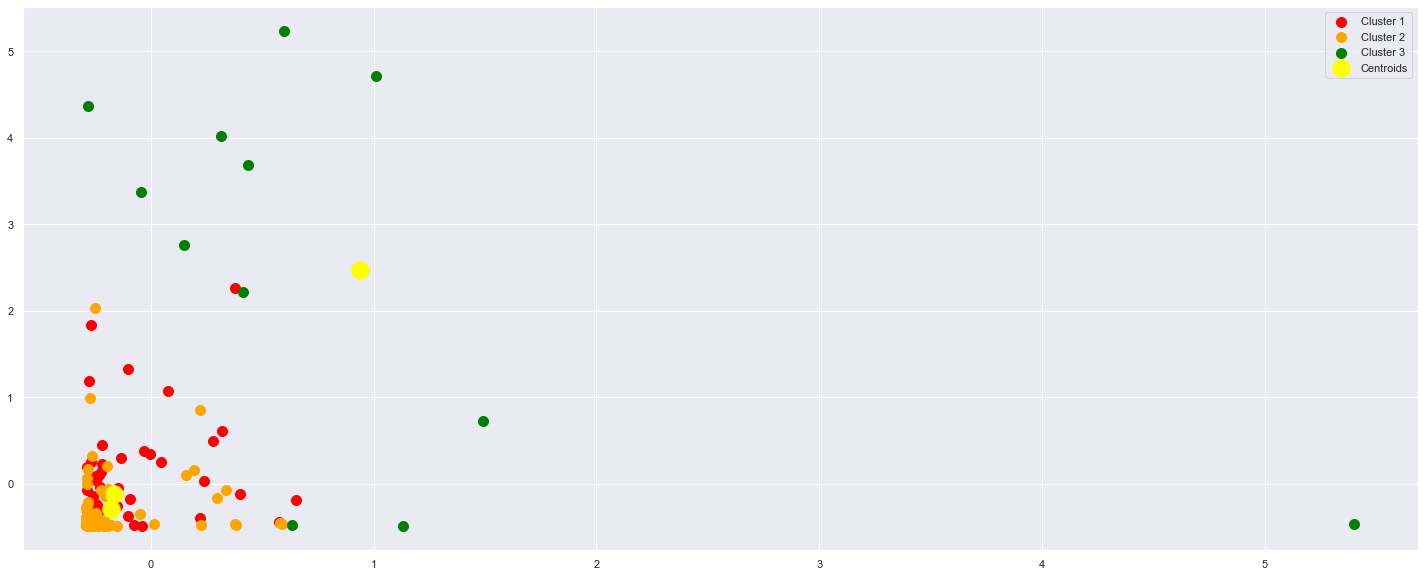

In [205]:
plt.figure(figsize = (25, 10))
#Visualisation des clusters
plt.scatter(X_kmeans[y_kmeans==0, 0], X_kmeans[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_kmeans[y_kmeans==1, 0], X_kmeans[y_kmeans==1, 1], s=100, c='orange', label ='Cluster 2')
plt.scatter(X_kmeans[y_kmeans==2, 0], X_kmeans[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#Visualisation des centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.legend()
plt.show()

In [206]:
#Clustering K-Means en 3 clusters
cls3 = cluster.KMeans(n_clusters=3, random_state=0)
cls3.fit(test_acp)
pd.Series(cls3.labels_).value_counts()

1    78
0    76
2    12
dtype: int64

Les centroides des clusters 1 et 0 sont très proches et seul le cluster 2 se différencie des autres.

* Représentation graphique des 4 clusters avec Kmeans:

In [207]:
X_kmeans=test_acp.values
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X_kmeans)

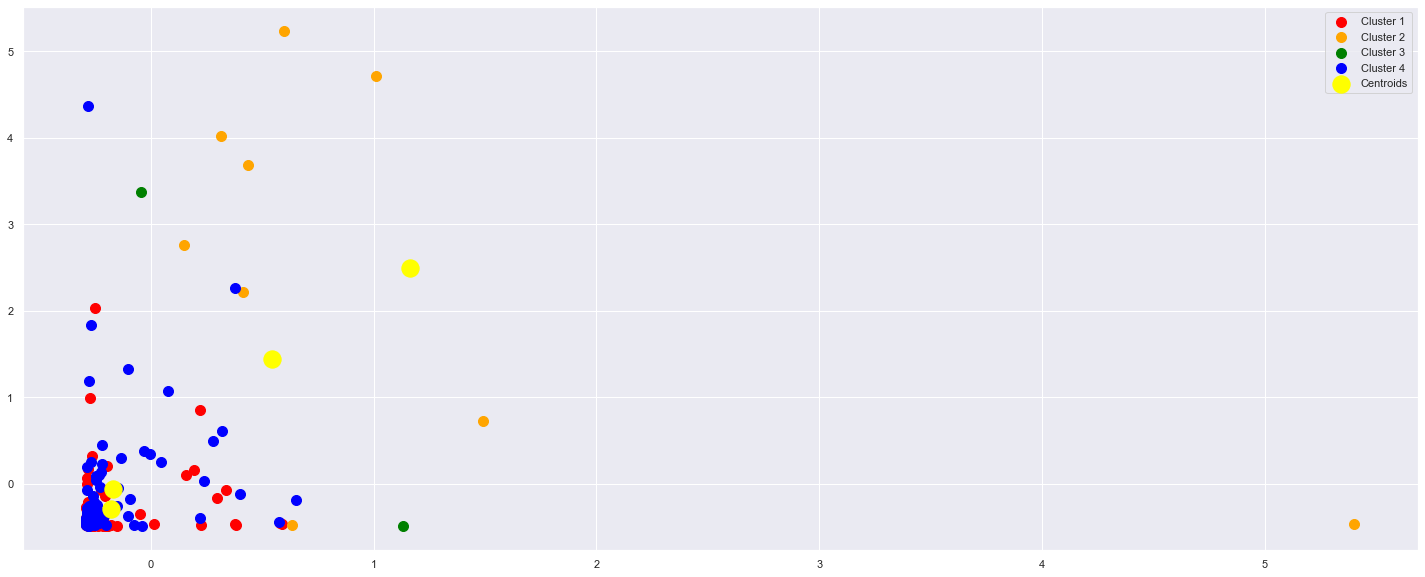

In [208]:
plt.figure(figsize = (25, 10))
#Visualisation des clusters
plt.scatter(X_kmeans[y_kmeans==0, 0], X_kmeans[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_kmeans[y_kmeans==1, 0], X_kmeans[y_kmeans==1, 1], s=100, c='orange', label ='Cluster 2')
plt.scatter(X_kmeans[y_kmeans==2, 0], X_kmeans[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_kmeans[y_kmeans==3, 0], X_kmeans[y_kmeans==3, 1], s=100, c='blue', label ='Cluster 4')
#Visualisation des centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.legend()
plt.show()

In [209]:
#Clustering K-Means en 4 clusters
cls4 = cluster.KMeans(n_clusters=4, random_state=0)
cls4.fit(test_acp)
pd.Series(cls4.labels_).value_counts()

0    78
3    77
1     9
2     2
dtype: int64

On a toujours les meme clusters qui ont leurs centroides très proches.

* Représentation graphique des 5 clusters avec Kmeans:

In [210]:
X_kmeans=test_acp.values
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X_kmeans)

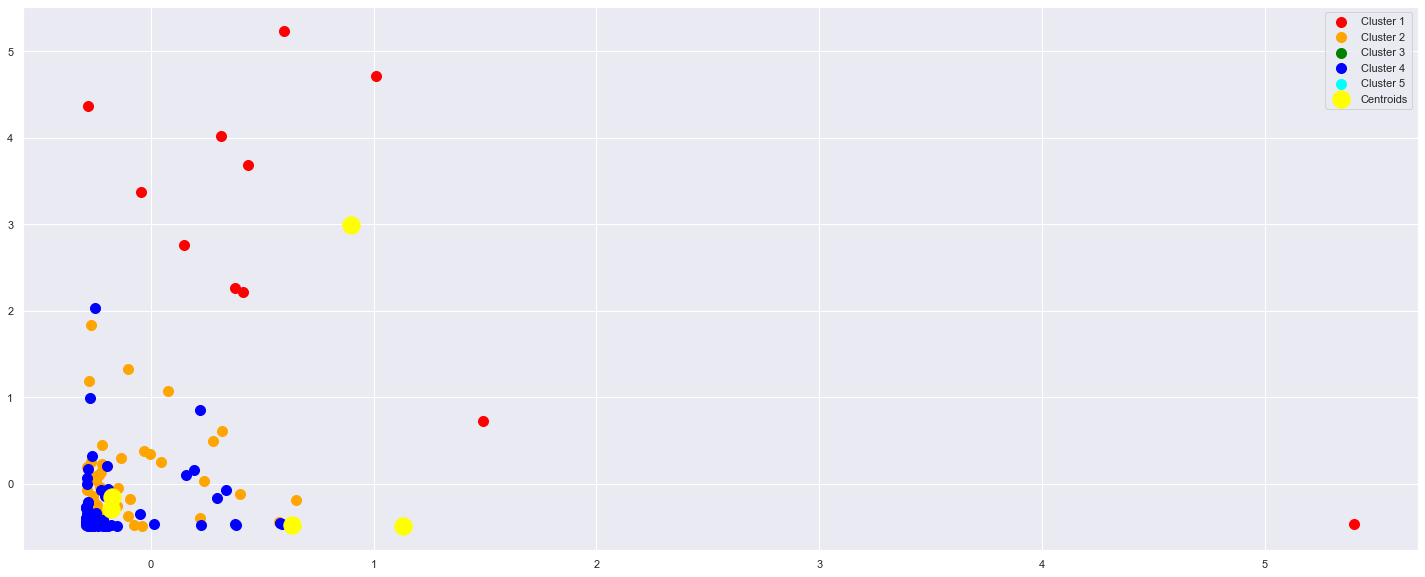

In [211]:
plt.figure(figsize = (25, 10))
#Visualisation des clusters
plt.scatter(X_kmeans[y_kmeans==0, 0], X_kmeans[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_kmeans[y_kmeans==1, 0], X_kmeans[y_kmeans==1, 1], s=100, c='orange', label ='Cluster 2')
plt.scatter(X_kmeans[y_kmeans==2, 0], X_kmeans[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_kmeans[y_kmeans==3, 0], X_kmeans[y_kmeans==3, 1], s=100, c='blue', label ='Cluster 4')
plt.scatter(X_kmeans[y_kmeans==4, 0], X_kmeans[y_kmeans==4, 1], s=100, c='cyan', label ='Cluster 5')
#Visualisation des centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.legend()
plt.show()

In [212]:
#Clustering K-Means en 5 clusters
cls5 = cluster.KMeans(n_clusters=5, random_state=0)
cls5.fit(test_acp)
pd.Series(cls5.labels_).value_counts()

3    77
1    76
0    11
2     1
4     1
dtype: int64

###  Analyse en Composantes Principales:


* Création de l'objet pca qui va contenir le résultat de l'ACP:

In [213]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# suppression des colonnes non numériques
X_pca = test_acp.reset_index(drop=True)
pca = PCA()
pca.fit(X_pca)

PCA()

* Variances expliquées:

In [214]:
print(pca.explained_variance_)

[1.76391690e+00 1.58236576e+00 1.04701114e+00 7.62285598e-01
 6.24345215e-01 4.20835555e-01 1.44517773e-01 6.98271543e-02
 5.44405336e-03 9.13649977e-04]


* Variances expliquées par dimension:

In [215]:
print(pca.explained_variance_ratio_)

[2.74690822e-01 2.46418271e-01 1.63048697e-01 1.18709026e-01
 9.72278800e-02 6.55357771e-02 2.25054286e-02 1.08740261e-02
 8.47790220e-04 1.42280662e-04]


* Résumé des variances expliquées:

In [216]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(10)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,1.763917,27.0,27.0
1,Dim2,1.582366,25.0,52.0
2,Dim3,1.047011,16.0,68.0
3,Dim4,0.762286,12.0,80.0
4,Dim5,0.624345,10.0,90.0
5,Dim6,0.420836,7.0,97.0
6,Dim7,0.144518,2.0,99.0
7,Dim8,0.069827,1.0,100.0
8,Dim9,0.005444,0.0,100.0
9,Dim10,0.000914,0.0,100.0


* Graphique des proportions de variances expliquées:

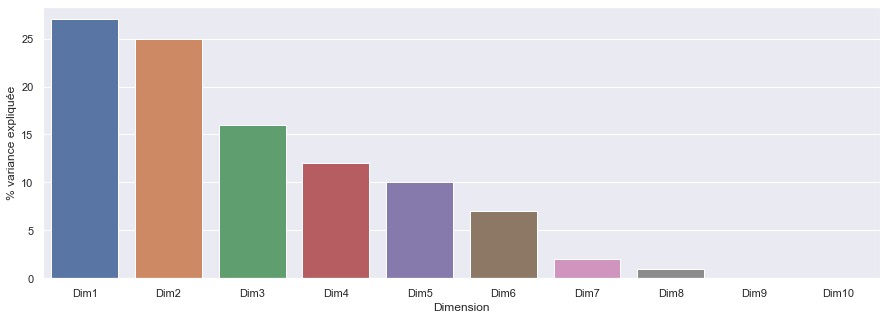

In [217]:
plt.figure(figsize = (15, 5)) # modifie la taille du graphique
sns.barplot(data = eig, x = "Dimension", y = "% variance expliquée")
plt.show() # cette ligne supprime l'affichage inutile en amont du graphique

* Affichage du graphique des éboulis des valeurs propres:

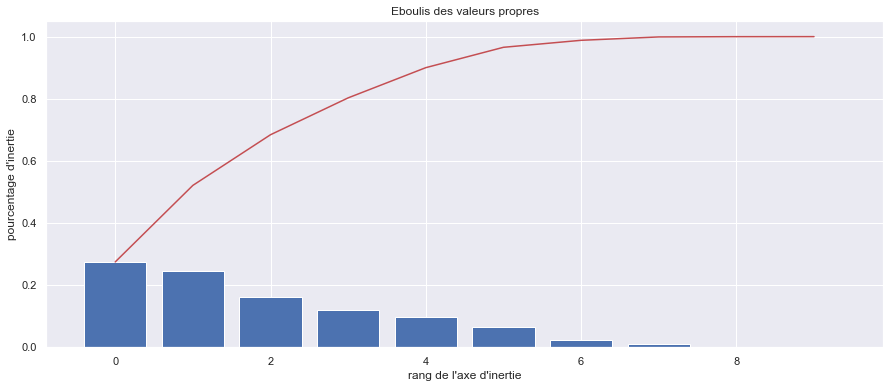

In [218]:
plt.figure(figsize = (15, 6))
y = list(pca.explained_variance_ratio_)
x = range(len(y))
ycum = np.cumsum(y)
plt.bar(x,y)
plt.plot(x,ycum,"-r")
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show()

Les 4 premiers plans factoriels permettent d'expliquer 80% de l'inertie.

In [219]:
df_pca = pca.transform(X_pca)
df_norm_pca = test_acp.reset_index()

* Transformation des données en 4 dimensions:

In [220]:
# Transformation en DataFrame pandas
PCA_df = pd.DataFrame({
    "Dim1" : df_pca[:,0], 
    "Dim2" : df_pca[:,1],
    "Dim3" : df_pca[:,2],
    "Dim4" : df_pca[:,3],
    "Pays" : df_norm_pca["Pays"]})

# Résultat (premières lignes)
PCA_df

,Dim1,Dim2,Dim3,Dim4,Pays
0,-0.686956,2.680499,-0.894078,-1.161928,Afghanistan
1,1.631837,-0.944050,-0.256196,-1.855946,Afrique du Sud
2,-0.588408,-0.186296,0.072899,0.349050,Albanie
3,-0.604842,1.215183,-0.332257,-0.182332,Algérie
4,4.784334,-1.878954,-4.449823,0.962008,Allemagne
...,...,...,...,...,...
161,-0.269595,0.916286,-0.046787,-0.699471,Venezuela (République bolivarienne du)
162,0.609172,-0.139338,-0.330591,-0.426635,Viet Nam
163,-0.449581,2.445451,-0.832464,-1.506988,Yémen
164,-0.750570,0.509983,-0.245060,0.473546,Zambie


* Affichage des données sur le premier plan factoriel:

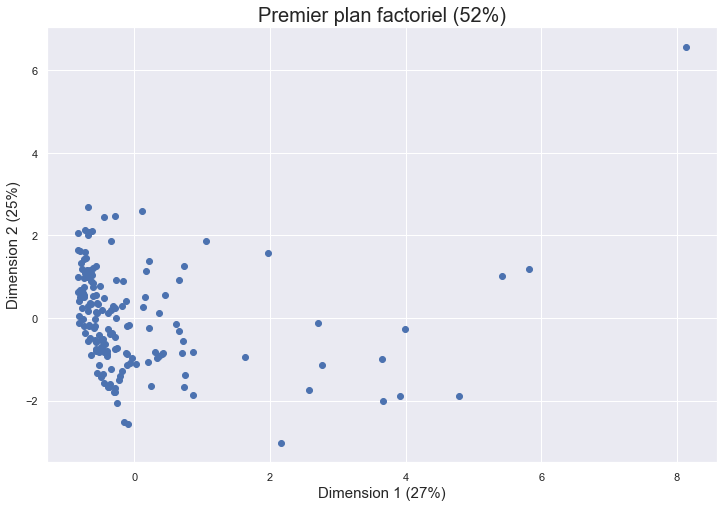

In [221]:
plt.subplots(figsize = (12,8))
x = PCA_df['Dim1']
y = PCA_df['Dim2']
plt.xlabel('Dimension 1 (27%)',fontsize = 15)
plt.ylabel("Dimension 2 (25%)",fontsize = 15) 
plt.title('Premier plan factoriel (52%)',fontsize = 20 )
plt.scatter(x, y, c='b')  
plt.show() 

* Projection des individus sur le premier plan factoriel:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


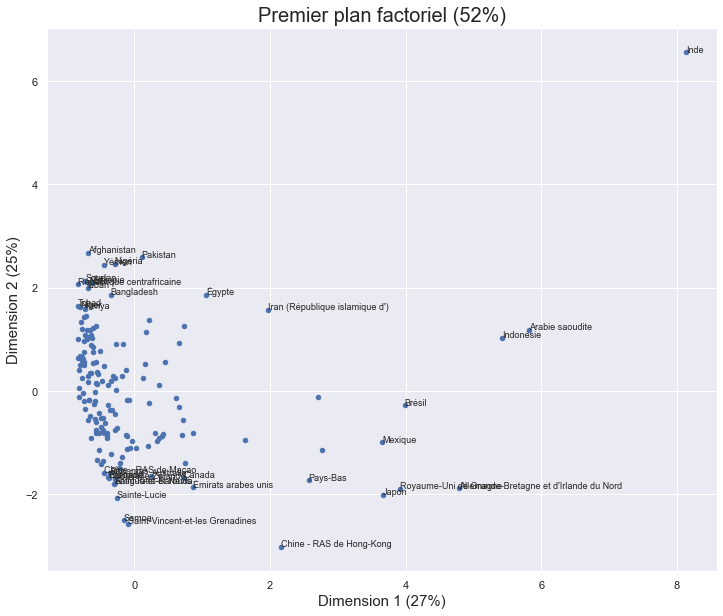

In [222]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots(figsize = (12,10))
PCA_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in PCA_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 3.5) | (abs(k[1]['Dim2']) > 1.5):
        ax.annotate(k[1]["Pays"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel('Dimension 1 (27%)',fontsize = 15)
plt.ylabel("Dimension 2 (25%)",fontsize = 15) 
plt.title('Premier plan factoriel (52%)',fontsize = 20 )
plt.show()

* Affichage des données sur le deuxieme plan factoriel:

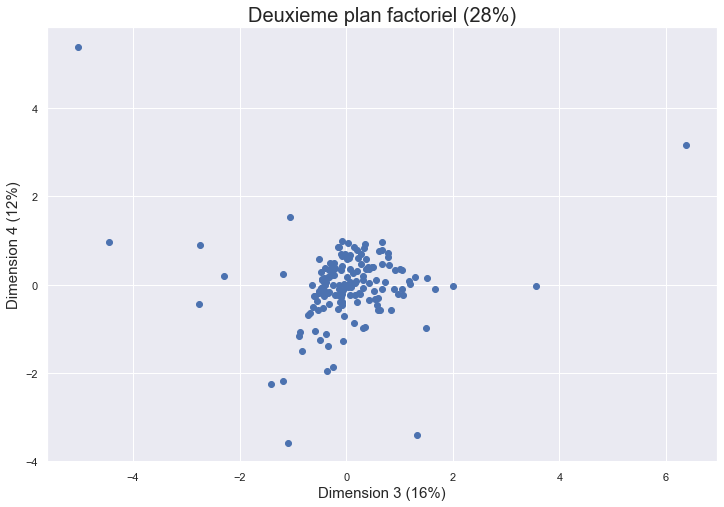

In [223]:
plt.subplots(figsize = (12,8))
x = PCA_df['Dim3']
y = PCA_df['Dim4']
plt.xlabel('Dimension 3 (16%)',fontsize = 15)
plt.ylabel("Dimension 4 (12%)",fontsize = 15) 
plt.title('Deuxieme plan factoriel (28%)',fontsize = 20 )
plt.scatter(x, y, c='b')  
plt.show() 

* Projection des individus sur le deuxième plan factoriel:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


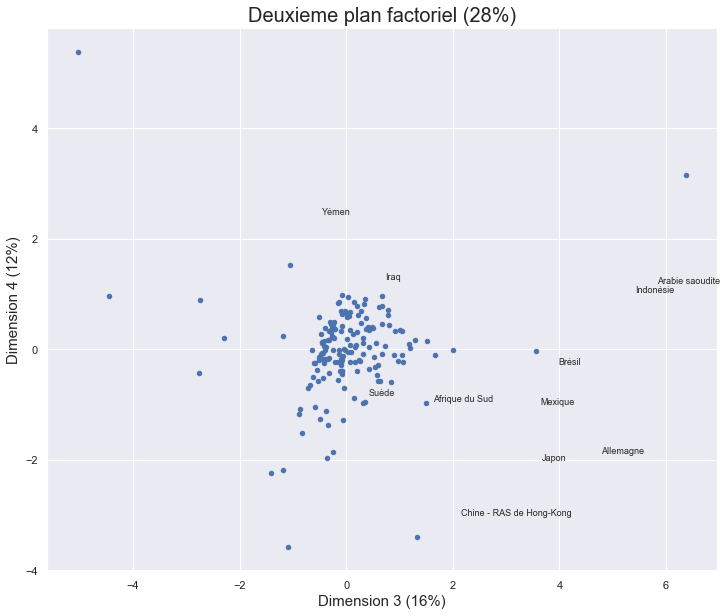

In [224]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots(figsize = (12,10))
PCA_df.plot.scatter("Dim3", "Dim4", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in PCA_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim3']) > 3.5) | (abs(k[1]['Dim4']) > 1.5):
        ax.annotate(k[1]["Pays"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel('Dimension 3 (16%)',fontsize = 15)
plt.ylabel("Dimension 4 (12%)",fontsize = 15) 
plt.title('Deuxieme plan factoriel (28%)',fontsize = 20 )
plt.show()

* Recherche de clusters avec Kmeans sur 4 dimensions:

In [225]:
PCA_df_kmeans3 = PCA_df.copy()

In [226]:
PCA_df_kmeans3.set_index('Pays',inplace = True)
X_pays= PCA_df_kmeans3.index
Pays = str(X_pays)
PCA_df_kmeans3

,Dim1,Dim2,Dim3,Dim4
Pays,,,,
Afghanistan,-0.686956,2.680499,-0.894078,-1.161928
Afrique du Sud,1.631837,-0.944050,-0.256196,-1.855946
Albanie,-0.588408,-0.186296,0.072899,0.349050
Algérie,-0.604842,1.215183,-0.332257,-0.182332
Allemagne,4.784334,-1.878954,-4.449823,0.962008
...,...,...,...,...
Venezuela (République bolivarienne du),-0.269595,0.916286,-0.046787,-0.699471
Viet Nam,0.609172,-0.139338,-0.330591,-0.426635
Yémen,-0.449581,2.445451,-0.832464,-1.506988


In [227]:
#Clustering K-Means en 3 clusters
pca_cls3 = cluster.KMeans(n_clusters=3, random_state=0)
pca_cls3.fit(PCA_df_kmeans3)
pd.Series(pca_cls3.labels_).value_counts()

1    78
2    77
0    11
dtype: int64

In [228]:
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
pca_clusters_kmeans3 = pca_cls3.labels_

In [229]:
#Identification des 03 groupes obtenus
pca_groupes_kmeans3 = pca_clusters_kmeans3
#Index trié des groupes
idg = np.argsort(pca_groupes_kmeans3)
#Affichage des pays selon leurs groupes
df_pca_kmeans3 = pd.DataFrame(PCA_df_kmeans3.index[idg], pca_groupes_kmeans3[idg]).reset_index()
df_pca_kmeans3 = df_pca_kmeans3.rename(columns={'index':'Groupe'})

In [230]:
df_pca_groupes_kmeans3 = pd.merge(PCA_df_kmeans3, df_pca_kmeans3, on='Pays')
df_pca_groupe0_Kmeans3 = df_pca_groupes_kmeans3[df_pca_groupes_kmeans3['Groupe'] == 0]
df_pca_groupe1_Kmeans3 = df_pca_groupes_kmeans3[df_pca_groupes_kmeans3['Groupe'] == 1]
df_pca_groupe2_Kmeans3 = df_pca_groupes_kmeans3[df_pca_groupes_kmeans3['Groupe'] == 2]

In [231]:
df_pca_groupe0_Kmeans3

,Pays,Dim1,Dim2,Dim3,Dim4,Groupe
4,Allemagne,4.784334,-1.878954,-4.449823,0.962008,0
7,Arabie saoudite,5.823603,1.184884,3.565800,-0.037443,0
23,Brésil,3.986237,-0.272480,1.324663,-3.396105,0
51,Fédération de Russie,2.702150,-0.117288,-0.872536,-1.075169,0
54,France,2.770607,-1.140779,-2.295753,0.206681,0
69,Inde,8.138069,6.556930,6.380299,3.166327,0
70,Indonésie,5.417804,1.028205,-5.037023,5.377219,0
78,Japon,3.660604,-2.011601,-1.417946,-2.235559,0
100,Mexique,3.648719,-0.994743,-1.089273,-3.571459,0
118,Pays-Bas,2.569642,-1.729443,-2.734829,0.898733,0


Nous observons qu'avec 4 dimensions, nous obtenons exactement le meme groupe obtenus dans les résultats précédent à l'aide de Kmeans en 3 clusters.

In [232]:
test_corr_pca_kmeans3 = df_pca_groupes_kmeans3.groupby('Groupe').mean()
test_corr_pca_kmeans3

,Dim1,Dim2,Dim3,Dim4
Groupe,,,,
0,4.310319,-0.115513,-0.853602,-0.011918
1,-0.456597,0.935325,-0.242220,-0.178325
2,-0.153233,-0.930970,0.367309,0.182343


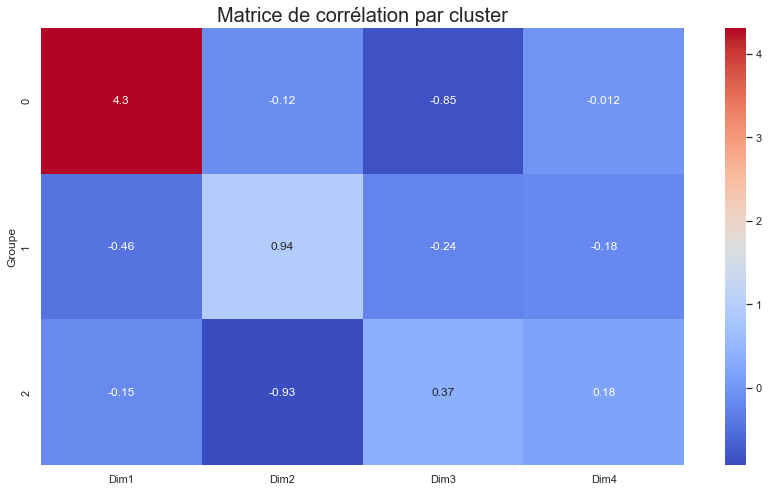

In [233]:
plt.figure(figsize=(12,7))
sns.heatmap(test_corr_pca_kmeans3, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation par cluster', fontsize=20)
plt.tight_layout()
plt.show()

On a bien confirmation de notre choix sur le groupe 0.

* Affichage des clusters sur le premier plan factoriel:

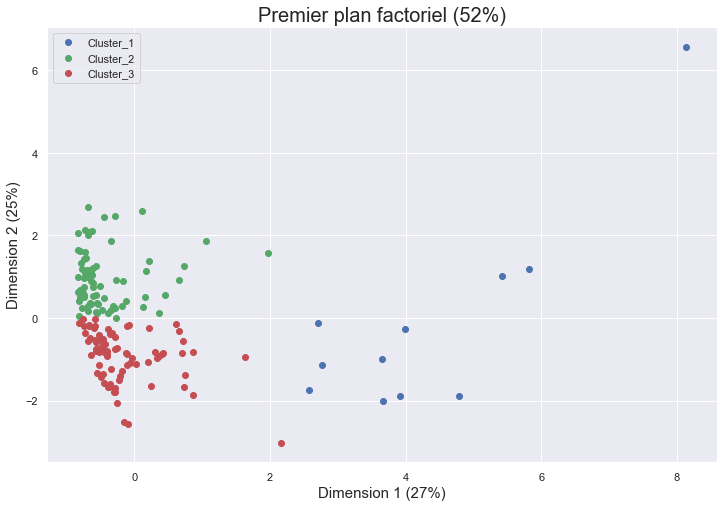

In [253]:
plt.subplots(figsize = (12,8))
x = df_pca_groupe0_Kmeans3['Dim1']
y = df_pca_groupe0_Kmeans3['Dim2']
plt.scatter(x,y, c='b',label='Cluster_1')
x1 = df_pca_groupe1_Kmeans3['Dim1']
y1 = df_pca_groupe1_Kmeans3['Dim2']
plt.scatter(x1,y1, c='g',label='Cluster_2')
x2 = df_pca_groupe2_Kmeans3['Dim1']
y2 = df_pca_groupe2_Kmeans3['Dim2']
plt.scatter(x2,y2, c='r',label='Cluster_3')
plt.xlabel('Dimension 1 (27%)',fontsize = 15)
plt.ylabel("Dimension 2 (25%)",fontsize = 15) 
plt.title('Premier plan factoriel (52%)',fontsize = 20 )
plt.legend()
plt.show() 

* Affichage des clusters sur le deuxieme plan factoriel:

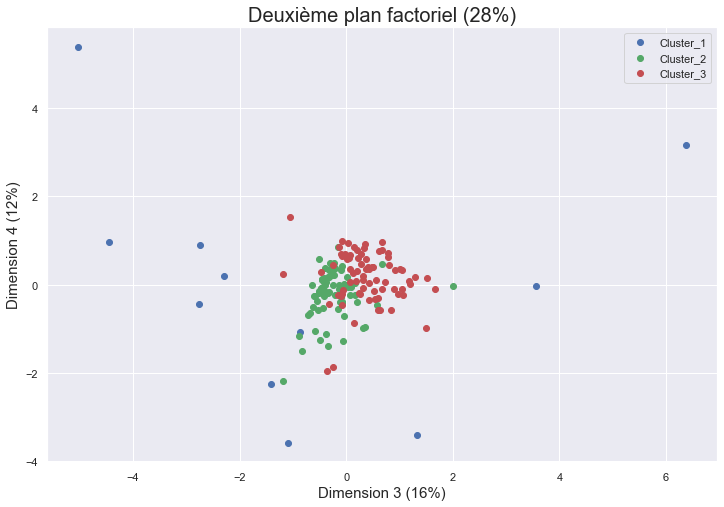

In [236]:
plt.subplots(figsize = (12,8))
x = df_pca_groupe0_Kmeans3['Dim3']
y = df_pca_groupe0_Kmeans3['Dim4']
plt.scatter(x,y, c='b',label='Cluster_1')
x1 = df_pca_groupe1_Kmeans3['Dim3']
y1 = df_pca_groupe1_Kmeans3['Dim4']
plt.scatter(x1,y1, c='g',label='Cluster_2')
x2 = df_pca_groupe2_Kmeans3['Dim3']
y2 = df_pca_groupe2_Kmeans3['Dim4']
plt.scatter(x2,y2, c='r',label='Cluster_3')
plt.xlabel('Dimension 3 (16%)',fontsize = 15)
plt.ylabel("Dimension 4 (12%)",fontsize = 15) 
plt.title('Deuxième plan factoriel (28%)',fontsize = 20 )
plt.legend()
plt.show() 

* Cercle de correlation

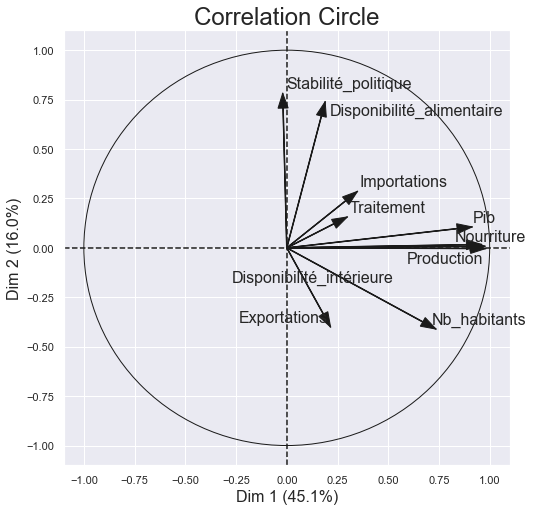

In [237]:
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.preprocessing import StandardScaler

X = df_cah.values
attribute_names = df_cah.columns


X_norm = StandardScaler().fit_transform(X) # Normalizing the feature columns is recommended (X - mean) / std

fig, correlation_matrix = plot_pca_correlation_graph(
    X_norm, 
    attribute_names,
    dimensions=(1, 2),
    figure_axis_size=8
)

* Interprétation:

Les variables les moins bien représentées sont celles qui sont le plus proche de l'origine et les plus proches de la circonférence seront les mieux représentées.

axe 1:
    
    forte corrélation entre pib, nourriture, production et nombre d'habitants
    importation et traitement mal représentés
    
axe 2:
    
    corrélation entre stabilité politique et disponibilité alimentaire 

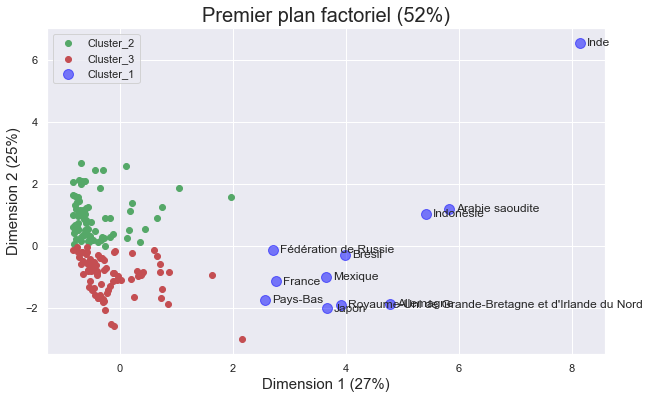

In [238]:
x = df_pca_groupe0_Kmeans3['Dim1']
y = df_pca_groupe0_Kmeans3['Dim2']
# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(10, 6))


x1 = df_pca_groupe1_Kmeans3['Dim1']
y1 = df_pca_groupe1_Kmeans3['Dim2']
plt.scatter(x1,y1, c='g',label='Cluster_2')
x2 = df_pca_groupe2_Kmeans3['Dim1']
y2 = df_pca_groupe2_Kmeans3['Dim2']
plt.scatter(x2,y2, c='r',label='Cluster_3')

labels = df_pca_groupe0_Kmeans3['Pays']

# Plot the scatter points
ax.scatter(x, y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1,label='Cluster_1')  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
plt.xlabel('Dimension 1 (27%)',fontsize = 15)
plt.ylabel("Dimension 2 (25%)",fontsize = 15) 
plt.title('Premier plan factoriel (52%)',fontsize = 20 )
plt.legend()
# Show the plot
plt.show()

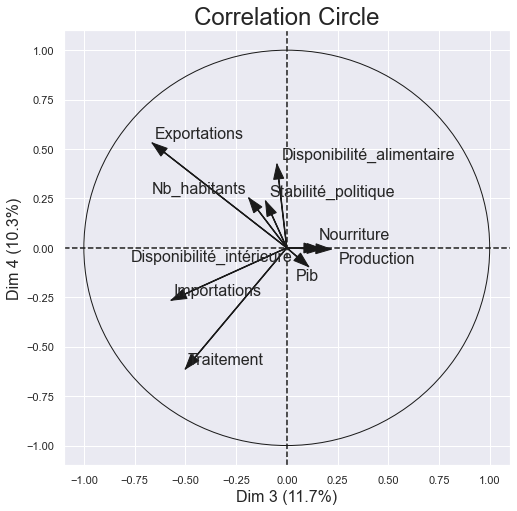

In [239]:
fig, correlation_matrix = plot_pca_correlation_graph(
    X_norm, 
    attribute_names,
    dimensions=(3, 4),
    figure_axis_size=8
)

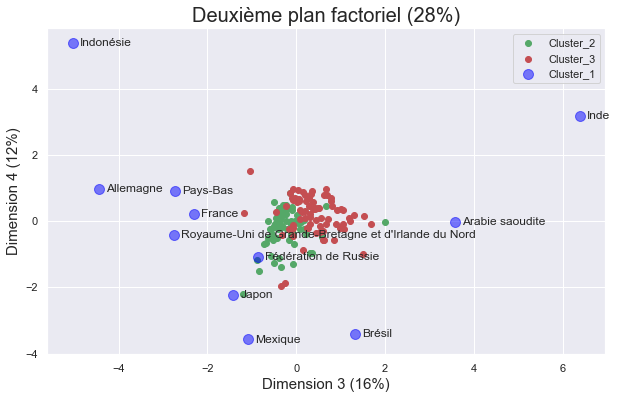

In [240]:
x = df_pca_groupe0_Kmeans3['Dim3']
y = df_pca_groupe0_Kmeans3['Dim4']
# Create the figure and axes objects
fig, ax = plt.subplots(1, figsize=(10, 6))


x1 = df_pca_groupe1_Kmeans3['Dim3']
y1 = df_pca_groupe1_Kmeans3['Dim4']
plt.scatter(x1,y1, c='g',label='Cluster_2')
x2 = df_pca_groupe2_Kmeans3['Dim3']
y2 = df_pca_groupe2_Kmeans3['Dim4']
plt.scatter(x2,y2, c='r',label='Cluster_3')

labels = df_pca_groupe0_Kmeans3['Pays']

# Plot the scatter points
ax.scatter(x, y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1,label='Cluster_1')  # Size of edge around the dots

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
plt.xlabel('Dimension 3 (16%)',fontsize = 15)
plt.ylabel("Dimension 4 (12%)",fontsize = 15) 
plt.title('Deuxième plan factoriel (28%)',fontsize = 20 )
plt.legend()
# Show the plot
plt.show()